# Machine Learning in Finance - Final Project

## Stocks Prediction using Technical Indicators and  Machine Learning Techniques
### By - Dhruv Morzaria - djm697@nyu.edu

# Goal of the project:
> Analyze 10 stocks from DJIA stocks for the period from July 2008 to Jult 2018.

> Use Logistic Regression, Support Vector Machines & Random Forests to predict whether the next day returns of the stocks, 5-day moving average returns & 5-day volatility change will be positive or negative.

> Implement trading strategy based on the classifiers trained and calculate cumulative returns and measure the performance of the strategy.

The Dow Jones is a large index traded on the New York stock exchange. It is a price-weighted index of 30 component
companies. All companies in the index are large publicly traded companies, leaders in each of their own sectors. The index covers a diverse set of sectors featuring companies.

### Data Import and Preparation

In [1]:
# Importing Libraries - Setting Up Data
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import talib as ta
import matplotlib.pyplot as plt

from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
# tickers = [Apple, Google, MAcDonal's, Nike, Exon Mobil, Visa Inc, 3M, Walt Disney, Boeing, American Express]

tickers = ['AAPL', 'GOOG', 'MCD' , 'NKE','XOM' , 'V','MMM','DIS','BA','AXP']
dataframes = []
for x in tickers:
    vars()[x] = pd.read_csv('Data/' + x + '.csv',index_col='Date',na_values=0,keep_default_na=True)
    vars()[x]['Volume'] = np.double(vars()[x]['Volume'])
AAPL.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-25  183.399994  184.919998  180.729996  182.169998  180.902145   
2018-06-26  182.990005  186.529999  182.539993  184.429993  183.146408   
2018-06-27  185.229996  187.279999  184.029999  184.160004  182.878296   
2018-06-28  184.100006  186.210007  183.800003  185.500000  184.208969   
2018-06-29  186.289993  187.190002  182.910004  185.110001  183.821686   

                Volume  
Date                    
2018-06-25  31663100.0  
2018-06-26  24569200.0  
2018-06-27  25285300.0  
2018-06-28  17365200.0  
2018-06-29  22737700.0

## Feature Space Genreation or Feature Engineering

We use TA-Lib Library which has more than technical indicators. These indicators can be used to generate a feature space.


In [3]:

for x in tickers:
    vars()[x]["Open_Change"] = vars()[x]["Open"].pct_change()
    vars()[x]["High_Change"] = vars()[x]["High"].pct_change()
    vars()[x]["Volume_Change"] = vars()[x]["Volume"].pct_change()
    vars()[x]["Low_Change"] = vars()[x]["Low"].pct_change()
    
    
    
    
    # Overalp Studies Indicator
    upperband, middleband, lowerband = ta.BBANDS(vars()[x]['Close'].values, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    vars()[x]['BBWidth'] = (upperband - lowerband)/middleband
    vars()[x]['EMA'] = ta.EMA(vars()[x]['Close'].values, timeperiod=30)
    vars()[x]['DEMA'] = ta.DEMA(vars()[x]['Close'].values, timeperiod=30)
    vars()[x]['HT_TRENDLINE'] = ta.HT_TRENDLINE(vars()[x]['Close'].values)
    vars()[x]['KAMA'] = ta.KAMA(vars()[x]['Close'].values, timeperiod=30)
    vars()[x]['MA'] = ta.MA(vars()[x]['Close'].values, timeperiod=30, matype=0)
    #mama, fama = ta.MAMA(vars()[x]['Close'].values, fastlimit=0, slowlimit=0)
    #vars()[x]['MAVP'] = ta.MAVP(vars()[x]['Close'].values, periods,minperiod=2, maxperiod=30, matype=0)
    vars()[x]['MIDPOINT'] = ta.MIDPOINT(vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['MIDPRICE'] = ta.MIDPRICE(vars()[x]['High'].values, vars()[x]['Low'].values, timeperiod=14)
    vars()[x]['SAR'] = ta.SAR(vars()[x]['High'].values, vars()[x]['Low'].values, acceleration=0, maximum=0)
    vars()[x]['SAREXT'] = ta.SAREXT(vars()[x]['High'].values, vars()[x]['Low'].values, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
    vars()[x]["sma3"] = ta.SMA(vars()[x]['Close'].values, timeperiod=3)
    vars()[x]["sma5"] = ta.SMA(vars()[x]['Close'].values, timeperiod=5)
    vars()[x]["sma10"] = ta.SMA(vars()[x]['Close'].values, timeperiod=10)
    vars()[x]["sma20"] = ta.SMA(vars()[x]['Close'].values, timeperiod=20)
    vars()[x]['SMA'] = ta.SMA(vars()[x]['Close'].values, timeperiod=30)
    vars()[x]['T3'] = ta.T3(vars()[x]['Close'].values, timeperiod=5, vfactor=0)
    vars()[x]['TEMA'] = ta.TEMA(vars()[x]['Close'].values, timeperiod=30)
    vars()[x]['RIMA'] = ta.TRIMA(vars()[x]['Close'].values, timeperiod=30)
    vars()[x]['WMA'] = ta.WMA(vars()[x]['Close'].values, timeperiod=30)
    
    # Momentum Indicators
    vars()[x]['ADXR'] = ta.ADXR(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['APO'] = ta.APO(vars()[x]['Close'].values, fastperiod=12, slowperiod=26, matype=0)
    vars()[x]['AROONOSC'] = ta.AROONOSC(vars()[x]['High'].values, vars()[x]['Low'].values, timeperiod=14)
    vars()[x]['BOP'] = ta.BOP(vars()[x]['Open'].values, vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values)
    vars()[x]["CCI_3"] = ta.CCI(vars()[x]['High'].values , vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=3)
    vars()[x]["CCI_5"] = ta.CCI(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=5)
    vars()[x]["CCI_7"] = ta.CCI(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=7)
    vars()[x]["CCI_10"] = ta.CCI(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=10)
    vars()[x]['CCI'] = ta.CCI(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['DX'] = ta.DX(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=14)
    #macd, macdsignal, macdhist = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    vars()[x]['MFI'] = ta.MFI(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, vars()[x]['Volume'].values, timeperiod=14)
    vars()[x]['MINUS_DI'] = ta.MINUS_DI(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['MINUS_DM'] = ta.MINUS_DM(vars()[x]['High'].values, vars()[x]['Low'].values, timeperiod=14)
    vars()[x]["MOM1"] = ta.MOM(vars()[x]['Close'].values, timeperiod=1)
    vars()[x]["MOM3"] = ta.MOM(vars()[x]['Close'].values, timeperiod=3)
    vars()[x]["MOM5"] = ta.MOM(vars()[x]['Close'].values, timeperiod=5)
    vars()[x]["MOM7"] = ta.MOM(vars()[x]['Close'].values, timeperiod=7)
    vars()[x]["MOM10"] = ta.MOM(vars()[x]['Close'].values, timeperiod=10)
    vars()[x]['PLUS_DI'] = ta.PLUS_DI(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['PLUS_DM'] = ta.PLUS_DM(vars()[x]['High'].values, vars()[x]['Low'].values, timeperiod=14)
    vars()[x]['PPO'] = ta.PPO(vars()[x]['Close'].values, fastperiod=12, slowperiod=26, matype=0)
    
    vars()[x]['ROC'] = ta.ROC(vars()[x]['Close'].values, timeperiod=10)
    
    
    # Returns
    vars()[x]["ROCP_1"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=1)
    vars()[x]["ROCP_2"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=2)
    vars()[x]["ROCP_3"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=3)
    vars()[x]["ROCP_4"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=4)
    vars()[x]["ROCP_5"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=5)
    vars()[x]["ROCP_6"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=6)
    vars()[x]["ROCP_7"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=7)
    vars()[x]["ROCP_8"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=8)
    vars()[x]["ROCP_9"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=9)
    vars()[x]["ROCP_10"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=10)
    vars()[x]["ROCP_11"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=11)
    vars()[x]["ROCP_12"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=12)
    vars()[x]["ROCP_13"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=13)
    vars()[x]["ROCP_14"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=14)
    vars()[x]["ROCP_15"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=15)
    vars()[x]["ROCP_16"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=16)
    vars()[x]["ROCP_17"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=17)
    vars()[x]["ROCP_18"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=18)
    vars()[x]["ROCP_19"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=19)
    vars()[x]["ROCP_20"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=20)
    vars()[x]["ROCP_30"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=30)
    vars()[x]["ROCP_40"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=40)
    vars()[x]["ROCP_50"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=50)
    vars()[x]["ROCP_60"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=60)
    vars()[x]["ROCP_70"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=70)
    vars()[x]["ROCP_80"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=80)
    vars()[x]["ROCP_90"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=90)
    vars()[x]["ROCP_100"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=100)
    vars()[x]["ROCP_130"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=130)
    vars()[x]["ROCP_160"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=160)
    vars()[x]["ROCP_190"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=190)
    vars()[x]["ROCP_220"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=220)
    vars()[x]["ROCP_250"] = ta.ROCP(vars()[x]['Close'].values, timeperiod=250)
    
    
    vars()[x]['ROCR'] = ta.ROCR(vars()[x]['Close'].values, timeperiod=10)
    vars()[x]['ROCR100'] = ta.ROCR100(vars()[x]['Close'].values, timeperiod=10)
    vars()[x]["RSI_5"] = ta.RSI(vars()[x]['Close'].values, timeperiod=5)
    vars()[x]["RSI_10"] = ta.RSI(vars()[x]['Close'].values, timeperiod=10)
    vars()[x]["RSI_14"] = ta.RSI(vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['TRIX'] = ta.TRIX(vars()[x]['Close'].values, timeperiod=30)
    vars()[x]['ULTOSC'] = ta.ULTOSC(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    vars()[x]['WILLR'] = ta.WILLR(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=14)
    
    
    
    # Volatility
    vars()[x]["Vol_5"] = vars()[x]['ROCP_1'].rolling(5).std()
    vars()[x]["Vol_10"] = vars()[x]['ROCP_1'].rolling(10).std()
    vars()[x]["Vol_15"] = vars()[x]['ROCP_1'].rolling(15).std()
    vars()[x]["Vol_20"] = vars()[x]['ROCP_1'].rolling(20).std()
    vars()[x]["Vol_25"] = vars()[x]['ROCP_1'].rolling(25).std()
    vars()[x]["Vol_50"] = vars()[x]['ROCP_1'].rolling(50).std()
    vars()[x]["Vol_75"] = vars()[x]['ROCP_1'].rolling(75).std()
    vars()[x]["Vol_100"] = vars()[x]['ROCP_1'].rolling(100).std()
    vars()[x]["Vol_150"] = vars()[x]['ROCP_1'].rolling(150).std()
    vars()[x]["Vol_200"] = vars()[x]['ROCP_1'].rolling(200).std()
    vars()[x]["Vol_250"] = vars()[x]['ROCP_1'].rolling(250).std()
    vars()[x]["Vol_HL"] = np.log(vars()[x]['High']/vars()[x]['Low'])**2
    vars()[x]['Vol_MV'] = vars()[x]['Volume']/vars()[x]['Volume'].rolling(5).mean()
    
    
    #Volume Indicators
    vars()[x]['AD'] = ta.AD(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, vars()[x]['Volume'].values)
    vars()[x]['ADOSC'] = ta.ADOSC(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, vars()[x]['Volume'].values, fastperiod=3, slowperiod=10)
    vars()[x]['OBV'] = ta.OBV(vars()[x]['Close'].values, vars()[x]['Volume'].values)
    
    
    #Volatility Indicators
    vars()[x]['ATR'] = ta.ATR(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['NATR'] = ta.NATR(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['TRANGE'] = ta.TRANGE(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values)
    
    
    #Price Transform Indicators
    vars()[x]['AVGPRICE'] = ta.AVGPRICE(vars()[x]['Open'].values, vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values)
    vars()[x]['MEDPRICE'] = ta.MEDPRICE(vars()[x]['High'].values, vars()[x]['Low'].values)
    vars()[x]['TYPPRICE'] = ta.TYPPRICE(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values)
    vars()[x]['WCLPRICE'] = ta.WCLPRICE(vars()[x]['High'].values, vars()[x]['Low'].values, vars()[x]['Close'].values)
    
    
    #Cycle Indicators
    vars()[x]['HT_DCPERIOD'] = ta.HT_DCPERIOD(vars()[x]['Close'].values)
    vars()[x]['HT_DCPHASE'] = ta.HT_DCPHASE(vars()[x]['Close'].values)
    vars()[x]['HT_TRENDMODE'] = ta.HT_TRENDMODE(vars()[x]['Close'].values)
    
    #Statistic Functions
    vars()[x]['VAR'] = ta.VAR(vars()[x]['Close'].values, timeperiod=5, nbdev=1)
    vars()[x]['TSF'] = ta.TSF(vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['STDDEV'] = ta.STDDEV(vars()[x]['Close'].values, timeperiod=5, nbdev=1)
    vars()[x]['LINEARREG_SLOPE'] = ta.LINEARREG_SLOPE(vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['LINEARREG_INTERCEPT'] = ta.LINEARREG_INTERCEPT(vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['LINEARREG_ANGLE'] = ta.LINEARREG_ANGLE(vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['LINEARREG'] = ta.LINEARREG(vars()[x]['Close'].values, timeperiod=14)
    vars()[x]['CORREL'] = ta.CORREL(vars()[x]['High'].values,vars()[x]['Low'].values, timeperiod=30)
    vars()[x]['BETA'] = ta.BETA(vars()[x]['High'].values, vars()[x]['Low'].values, timeperiod=5)
        
    
#display(HTML(AAPL.to_html()))
AXP

Open        High         Low       Close   Adj Close  \
Date                                                                     
2008-07-01   37.950001   40.139999   37.770000   40.020000   33.467922   
2008-07-02   40.110001   40.900002   39.500000   39.619999   33.133415   
2008-07-03   39.970001   40.889999   39.619999   40.240002   33.651917   
2008-07-07   40.480000   41.450001   38.400002   39.590000   33.108322   
2008-07-08   39.610001   41.799999   39.029999   41.549999   34.747440   
2008-07-09   41.590000   41.590000   38.669998   39.009998   32.765228   
2008-07-10   39.080002   39.680000   38.060001   39.040001   32.790428   
2008-07-11   38.509998   40.400002   37.340000   39.209999   32.933216   
2008-07-14   39.770000   40.000000   37.400002   37.509998   31.505354   
2008-07-15   36.750000   38.880001   35.549999   37.020000   31.093792   
2008-07-16   37.529999   39.669998   36.970001   39.669998   33.319565   
2008-07-17   40.439999   42.250000   39.360001   41.790001   35.100208   
2008-07-18   41.970001   42.349998   40.500000   42.189999   35.436184   
2008-07-21   42.310001   42.500000   40.529999   40.900002   34.352688   
2008-07-22   36.380001   38.549999   36.000000   37.990002   31.908506   
2008-07-23   38.349998   39.799999   37.290001   39.340000   33.042400   
2008-07-24   39.540001   39.660000   36.099998   36.410000   30.581430   
2008-07-25   36.730000   38.090000   36.200001   36.619999   30.757826   
2008-07-28   36.509998   37.040001   35.150002   35.369999   29.707918   
2008-07-29   35.650002   37.560001   35.099998   37.520000   31.513741   
2008-07-30   37.950001   38.400002   36.619999   37.540001   31.530561   
2008-07-31   37.049999   38.000000   36.700001   37.119999   31.177790   
2008-08-01   37.180000   37.430000   36.000000   37.189999   31.236567   
2008-08-04   37.090000   37.299999   36.130001   36.849998   30.951002   
2008-08-05   37.299999   38.810001   36.990002   38.720001   32.521667   
2008-08-06   38.389999   38.480000   37.500000   37.990002   31.908506   
2008-08-07   37.490002   38.270000   35.930000   36.400002   30.573030   
2008-08-08   36.330002   38.310001   36.060001   37.810001   31.757330   
2008-08-11   37.759998   40.169998   37.500000   39.169998   32.899609   
2008-08-12   38.889999   39.040001   37.680000   38.049999   31.958912   
...                ...         ...         ...         ...         ...   
2018-05-18  100.930000  101.330002  100.459999  100.989998  100.266853   
2018-05-21  101.570000  102.379997  101.349998  102.040001  101.309334   
2018-05-22  102.320000  103.239998  102.080002  102.699997  101.964607   
2018-05-23  101.820000  102.250000  100.910004  101.930000  101.200127   
2018-05-24  101.690002  102.309998  100.720001  102.010002  101.279549   
2018-05-25  101.349998  101.639999  100.470001  101.099998  100.376068   
2018-05-29   99.839996   99.839996   96.980003   97.720001   97.020271   
2018-05-30   98.849998   99.419998   97.959999   98.989998   98.281174   
2018-05-31   98.680000   99.360001   97.800003   98.300003   97.596123   
2018-06-01   99.339996   99.610001   98.220001   98.250000   97.546471   
2018-06-04   98.809998   99.510002   98.639999   99.449997   98.737885   
2018-06-05   99.120003   99.410004   98.430000   99.309998   98.598885   
2018-06-06  100.000000  101.000000   99.570000  100.970001  100.247002   
2018-06-07  101.440002  102.389999  100.889999  101.480003  100.753349   
2018-06-08  101.290001  101.300003   99.589996  101.000000  100.276787   
2018-06-11  101.180000  101.669998  100.790001  101.199997  100.475349   
2018-06-12  101.500000  101.500000  100.239998  100.730003  100.008720   
2018-06-13  100.870003  100.879997   99.959999  100.019997   99.303795   
2018-06-14  100.519997  101.099998   99.510002   99.760002   99.045662   
2018-06-15   99.220001   99.269997   97.309998   98.519997   97.814545   
2018-06-18   97.849998   98.550003   97.309998   98.470001   97.764900   
2018-06-19   97.139999

# Label Generation:


Label 1 : Sign of Change in Price of the Stock  

Label 2 : Sign of Simple Moving Avergae of the Stock 

Label 3 : Sign 5 Day Volatility of the Stock

In [4]:
for x in tickers:                 
    vars()[x]["Label1"] = np.sign(vars()[x]["Close"].diff()).shift(-1)
    vars()[x].ix[vars()[x].Label1==0, 'Label1'] = 1
    
    vars()[x]["Label2"] = np.sign(vars()[x]["sma5"].diff(5)).shift(-5)
    vars()[x].ix[vars()[x].Label2==0, 'Label2'] = 1

    vars()[x]["Label3"] = np.sign(vars()[x]["Vol_5"].diff(5)).shift(-5)
    vars()[x].ix[vars()[x].Label3==0, 'Label3'] = 1
  

In [5]:
# Dropping NANs

for x in tickers:
    vars()[x].dropna(axis = 0, inplace = True)
    
AXP

Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-06-29   23.900000   24.469999   23.610001   24.000000   20.709055   
2009-06-30   23.990000   24.330000   23.080000   23.240000   20.204796   
2009-07-01   23.490000   23.549999   22.969999   23.000000   19.996151   
2009-07-02   22.740000   22.799999   22.270000   22.270000   19.361490   
2009-07-06   22.190001   23.549999   22.160000   23.520000   20.448235   
2009-07-07   23.450001   23.549999   22.559999   22.629999   19.674469   
2009-07-08   22.530001   23.160000   22.000000   22.719999   19.752718   
2009-07-09   23.059999   23.230000   22.660000   22.799999   19.822268   
2009-07-10   22.600000   23.379999   22.600000   23.219999   20.187416   
2009-07-13   23.549999   24.540001   23.410000   24.520000   21.317636   
2009-07-14   24.400000   24.620001   24.010000   24.459999   21.265461   
2009-07-15   24.820000   27.750000   24.809999   27.219999   23.665010   
2009-07-16   26.969999   28.559999   26.660000   28.280001   24.586569   
2009-07-17   28.040001   28.320000   27.230000   28.030001   24.369221   
2009-07-20   28.280001   28.980000   28.180000   28.889999   25.116899   
2009-07-21   29.020000   29.540001   28.639999   29.379999   25.542913   
2009-07-22   28.910000   29.150000   28.520000   28.760000   25.003878   
2009-07-23   28.990000   30.000000   28.620001   29.450001   25.603758   
2009-07-24   28.600000   29.860001   28.090000   29.510000   25.655926   
2009-07-27   29.490000   29.600000   28.110001   28.379999   24.673506   
2009-07-28   28.000000   28.030001   27.100000   27.680000   24.064934   
2009-07-29   27.379999   28.110001   27.379999   27.750000   24.125786   
2009-07-30   28.270000   28.799999   27.940001   28.230000   24.543098   
2009-07-31   28.040001   28.389999   27.799999   28.330000   24.630035   
2009-08-03   28.900000   29.090000   28.350000   28.650000   24.908243   
2009-08-04   28.490000   29.040001   28.240000   28.709999   24.960405   
2009-08-05   28.850000   30.660000   28.129999   30.360001   26.394915   
2009-08-06   31.600000   32.240002   30.920000   31.309999   27.220840   
2009-08-07   32.060001   33.700001   31.980000   32.689999   28.420610   
2009-08-10   32.509998   32.970001   31.969999   32.340000   28.116323   
...                ...         ...         ...         ...         ...   
2018-05-11  101.489998  102.680000  101.269997  101.419998  100.693779   
2018-05-14  101.690002  102.150002  101.110001  101.290001  100.564713   
2018-05-15  100.820000  101.230003   99.970001  100.739998  100.018646   
2018-05-16  100.279999  101.239998  100.230003  100.589996   99.869713   
2018-05-17  100.650002  101.639999  100.300003  101.220001  100.495209   
2018-05-18  100.930000  101.330002  100.459999  100.989998  100.266853   
2018-05-21  101.570000  102.379997  101.349998  102.040001  101.309334   
2018-05-22  102.320000  103.239998  102.080002  102.699997  101.964607   
2018-05-23  101.820000  102.250000  100.910004  101.930000  101.200127   
2018-05-24  101.690002  102.309998  100.720001  102.010002  101.279549   
2018-05-25  101.349998  101.639999  100.470001  101.099998  100.376068   
2018-05-29   99.839996   99.839996   96.980003   97.720001   97.020271   
2018-05-30   98.849998   99.419998   97.959999   98.989998   98.281174   
2018-05-31   98.680000   99.360001   97.800003   98.300003   97.596123   
2018-06-01   99.339996   99.610001   98.220001   98.250000   97.546471   
2018-06-04   98.809998   99.510002   98.639999   99.449997   98.737885   
2018-06-05   99.120003   99.410004   98.430000   99.309998   98.598885   
2018-06-06  100.000000  101.000000   99.570000  100.970001  100.247002   
2018-06-07  101.440002  102.389999  100.889999  101.480003  100.753349   
2018-06-08  101.290001  101.300003   99.589996  101.000000  100.276787   
2018-06-11  101.180000  101.669998  100.790001  101.199997  100.475349   
2018-06-12  101.500000

In [6]:
returns = pd.DataFrame()
for t in tickers:
    returns[t+'_RET'] = vars()[t]["ROCP_1"]
    returns

returns =  returns.dropna()
returns.head()

AAPL_RET  GOOG_RET   MCD_RET   NKE_RET   XOM_RET     V_RET  \
Date                                                                     
2009-06-29 -0.003300 -0.002774  0.004035  0.017899  0.022158 -0.013162   
2009-06-30  0.003240 -0.006012  0.004543  0.000580 -0.009493 -0.011432   
2009-07-01  0.002808 -0.006167  0.012698  0.012360  0.009298 -0.023450   
2009-07-02 -0.019674 -0.025060 -0.013226 -0.025944 -0.029337 -0.011842   
2009-07-06 -0.010070  0.002742  0.009399  0.016647 -0.005694  0.009820   

             MMM_RET   DIS_RET    BA_RET   AXP_RET  
Date                                                
2009-06-29  0.011812  0.009816  0.018386  0.010101  
2009-06-30  0.002335 -0.013948 -0.003517 -0.031667  
2009-07-01  0.010649  0.005144 -0.006353 -0.010327  
2009-07-02 -0.008067 -0.026013 -0.033152 -0.031739  
2009-07-06  0.006971  0.010946 -0.006613  0.056129

### Exploring the Data

We will perform EDA by looking at three major componenents separately: 

a. Stock Price Time Series Analysis.

b. Exploring  the Features that we have generated.  (done below - after pre-processing of feature space)

c. Understanding the labels. This help us select Performance metrics that we can use for evaluating the performance of Models.
(done below - after generation of labels)

We will look at pair-wise plots.(for each Stock Ticker)

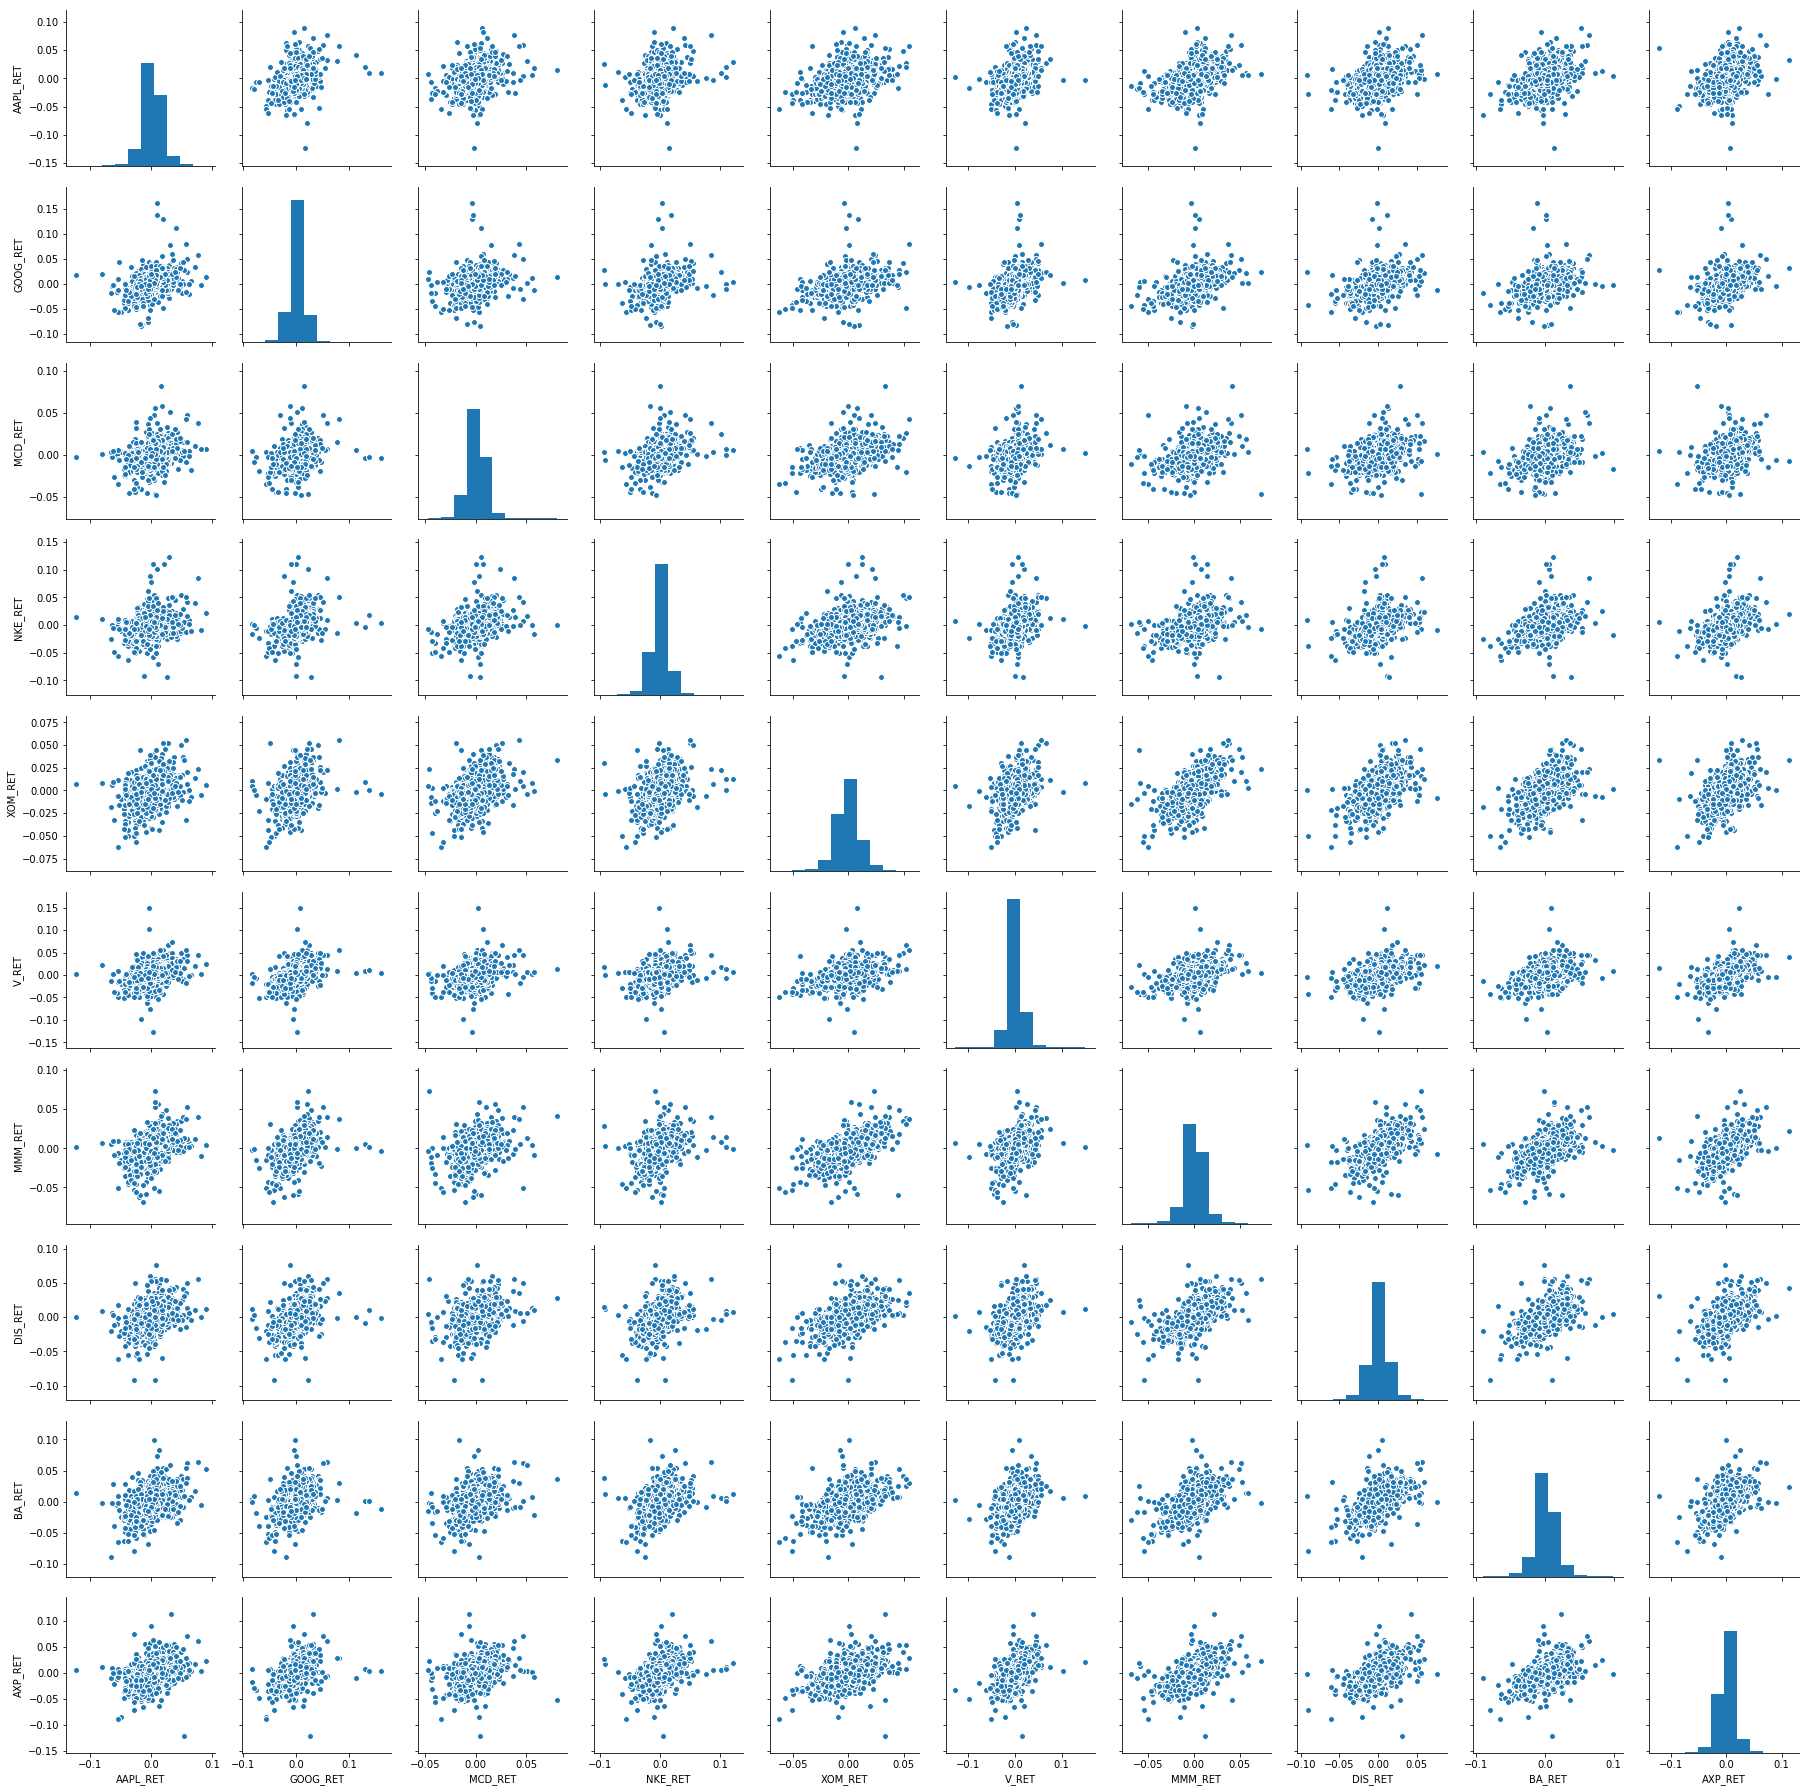

In [7]:
import seaborn as sns
sns.pairplot(returns[1:])

When we develop  a trading strategy, we will make use of Volatility i.e. Standar Deviation of the stocks. So,we can plot volatility plots for each stocks.

In [8]:
returns.std()

AAPL_RET    0.015907
GOOG_RET    0.015096
MCD_RET     0.009794
NKE_RET     0.014712
XOM_RET     0.011712
V_RET       0.014925
MMM_RET     0.011684
DIS_RET     0.013433
BA_RET      0.015326
AXP_RET     0.015433
dtype: float64

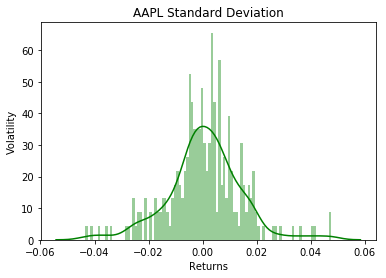

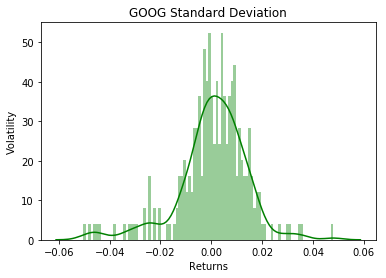

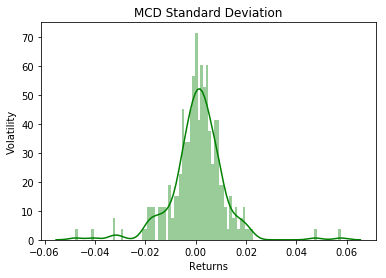

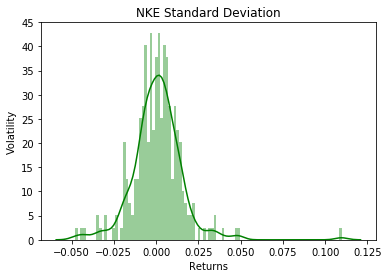

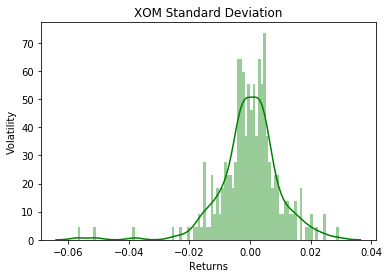

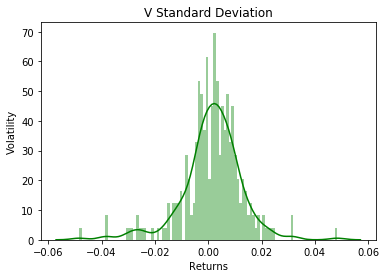

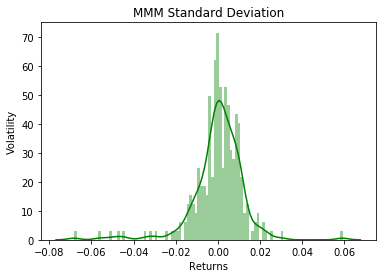

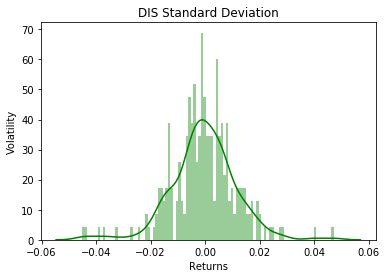

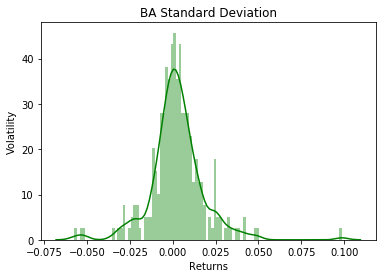

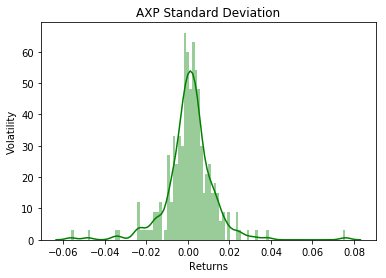

In [9]:
for t in tickers:
    plt.figure()
    plt.title(str(t)+' Standard Deviation')
    sns.distplot(returns.loc['2017-05-01':'2018-04-30'][t+'_RET'],color='green',bins=100)
    #plt.hist(returns.loc['2017-05-01':'2018-04-30'][t+'_RET'], color = 'blue', edgecolor = 'black')
    #plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
    plt.xlabel('Returns')
    plt.ylabel('Volatility')

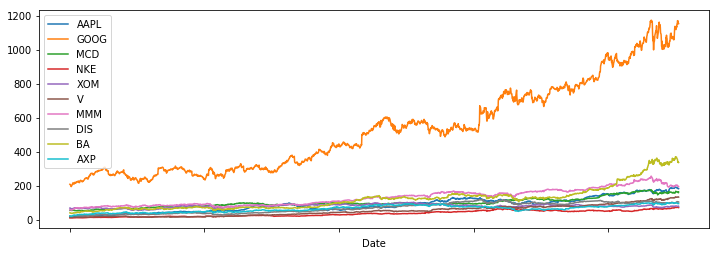

In [10]:
for tick in tickers:
    vars()[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

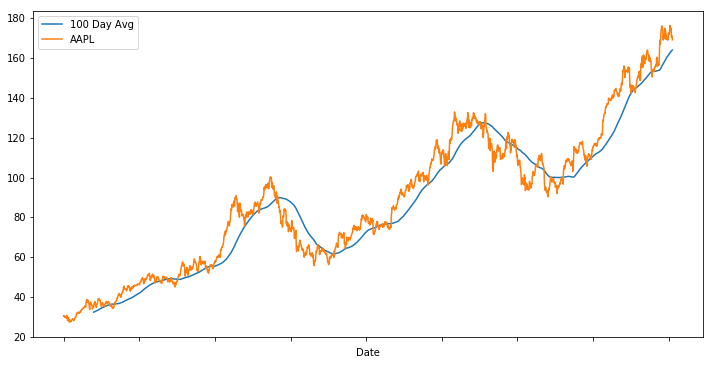

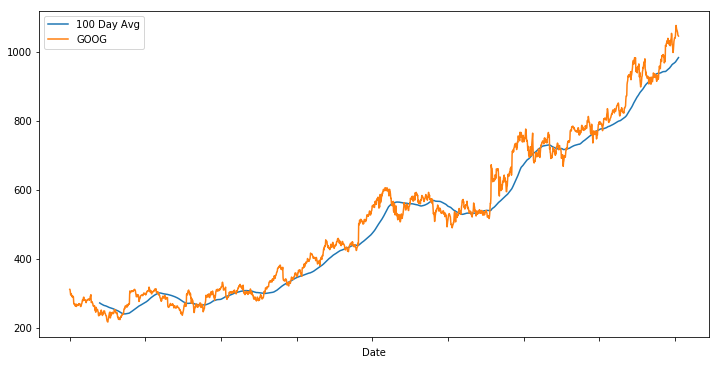

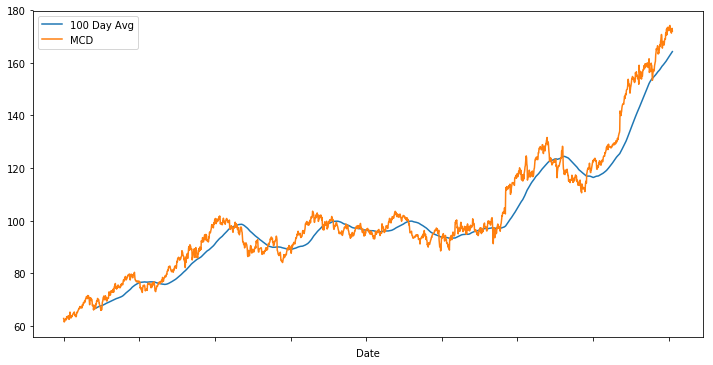

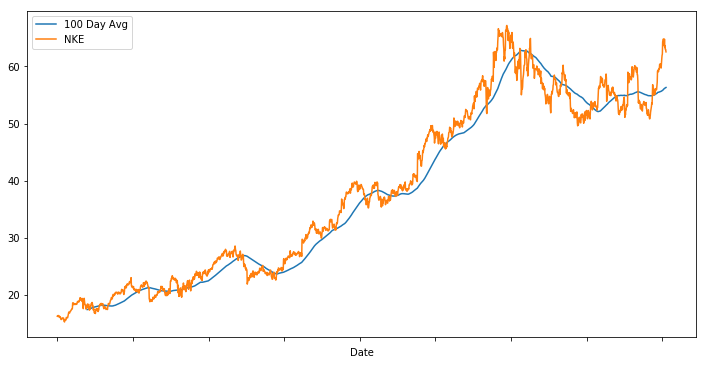

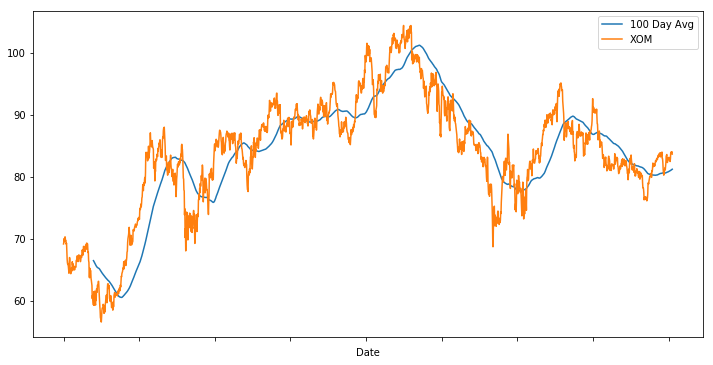

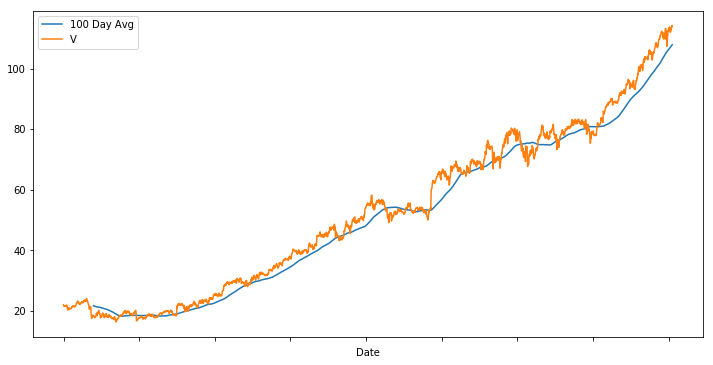

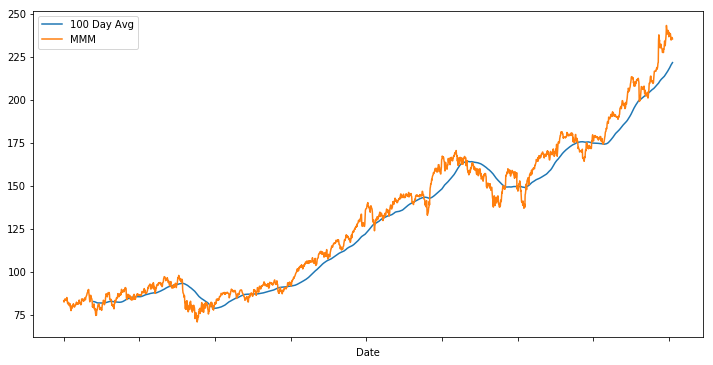

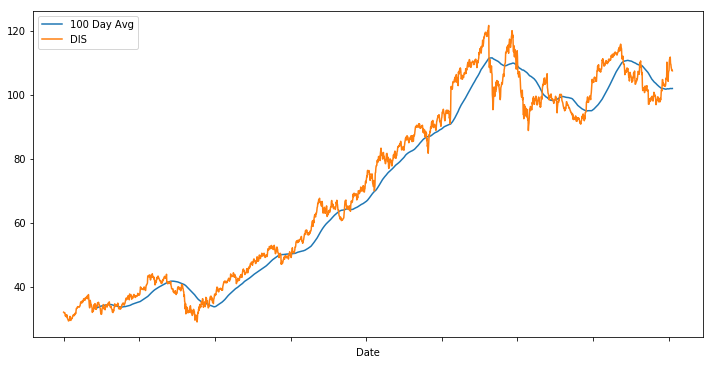

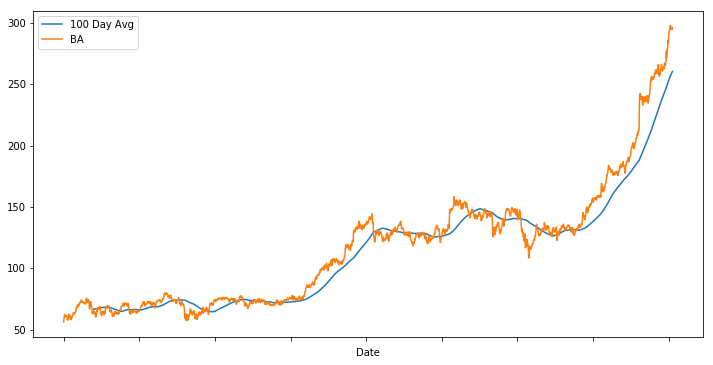

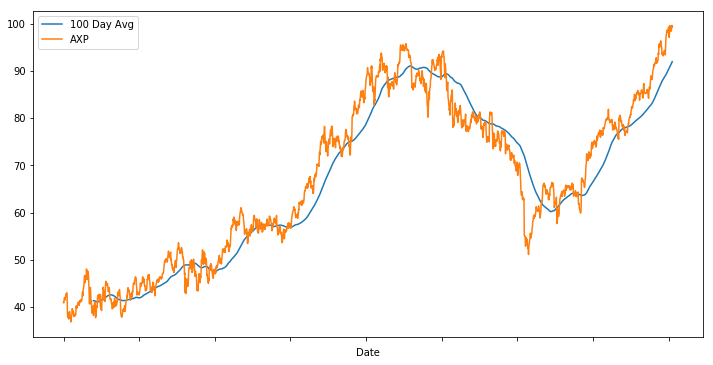

In [11]:
for t in tickers:
    plt.figure(figsize=(12,6))
    vars()[t]['Close'].loc['2010-01-01':'2018-01-01'].rolling(window=100).mean().plot(label='100 Day Avg')
    vars()[t]['Close'].loc['2010-01-01':'2018-01-01'].plot(label= t )
    plt.legend()

The below plot will show the charts for different Technical Indicator for Apple Stock.

In [12]:

import plotly.plotly as py
import plotly
import plotly.graph_objs as go 
plotly.tools.set_credentials_file(username='Dhruvjm', api_key='9GzMJTrBTGypf88PLEt2')

#import plotly.graph_objs as go
#import plotly.plotly as py

from ipywidgets import widgets
from IPython.display import display, clear_output, Image
from plotly.widgets import GraphWidget


<IPython.core.display.Javascript object>

In [13]:

trace_high = go.Scatter(x=list(AAPL.index),
                        y=list(AAPL.High),
                        name='High',
                        line=dict(color='#33CFA5'))

trace_high_avg = go.Scatter(x=list(AAPL.index),
                            y=[AAPL.High.mean()]*len(AAPL.index),
                            name='High Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))

trace_low = go.Scatter(x=list(AAPL.index),
                       y=list(AAPL.Low),
                       name='Low',
                       line=dict(color='#F06A6A'))

trace_low_avg = go.Scatter(x=list(AAPL.index),
                           y=[AAPL.Low.mean()]*len(AAPL.index),
                           name='Low Average',
                           visible=False,
                           line=dict(color='#F06A6A', dash='dash'))

trace_ema = go.Scatter(x=list(AAPL.index),
                           y=list(AAPL.EMA),
                           name='EMA',
                           visible=False,
                           line=dict(color='#F06A6A', dash='dash'))

trace_MOM5 = go.Scatter(x=list(AAPL.index),
                           y=list(AAPL.MOM5),
                           name='MOM5',
                           visible=False,
                           line=dict(color='#F06A6A'))
trace_close = go.Scatter(x=list(AAPL.index),
                           y=list(AAPL.Close),
                           name='MOM5',
                           visible=False,
                           line=dict(color='#000000'))
trace_ATR = go.Scatter(x=list(AAPL.index),
                           y=list(AAPL.ATR),
                           name='ATR',
                           visible=False,
                           line=dict(color='#000000'))

data = [trace_high, trace_high_avg, trace_low, trace_low_avg,trace_ema,trace_MOM5,trace_close,trace_ATR]

high_annotations=[dict(x='2016-03-01',
                       y=AAPL.High.mean(),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(AAPL.High.mean()),
                       ax=0, ay=-40),
                  dict(x=AAPL.High.idxmax(),
                       y=AAPL.High.max(),
                       xref='x', yref='y',
                       text='High Max:<br>'+str(AAPL.High.max()),
                       ax=0, ay=-40)]
low_annotations=[dict(x='2015-05-01',
                      y=AAPL.Low.mean(),
                      xref='x', yref='y',
                      text='Low Average:<br>'+str(AAPL.Low.mean()),
                      ax=0, ay=40),
                 dict(x=AAPL.High.idxmin(),
                      y=AAPL.Low.min(),
                      xref='x', yref='y',
                      text='Low Min:<br>'+str(AAPL.Low.min()),
                      ax=0, ay=40)]

updatemenus = list([
    dict(active=1,
         buttons=list([   
            dict(label = 'High',
                 method = 'update',
                 args = [{'visible': [True, True, False, False,False,False,True,False]},
                         {'title': 'High Chart for Apple',
                          'annotations': high_annotations}]),
            dict(label = 'Low',
                 method = 'update',
                 args = [{'visible': [False, False, True, True,False,False,True,False]},
                         {'title': 'Low Chart for Apple chart',
                          'annotations': low_annotations}]),
            dict(label = 'Both',
                 method = 'update',
                 args = [{'visible': [True, True, True, True,False,False,True,False]},
                         {'title': 'High and Low Chart for Apple Chart',
                          'annotations': high_annotations+low_annotations}]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [True, False, True, False,False,False,True,False]},
                         {'title': 'EXPLORATORY DATA ANALYSIS',
                          'annotations': []}]),
             dict(label = 'EMA',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,True,False,True,False]},
                         {'title': 'Exponential Moving Average for Apple Stock',
                          'annotations': []}]),
             dict(label = 'MOM5',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,False,True,False,False]},
                         {'title': 'Momentum Indicator for Apple Stock',
                          'annotations': []}]),
             dict(label = 'Close',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,False,False,True,False]},
                         {'title': 'Closing Price for Apple Stock',
                          'annotations': []}]),
             dict(label = 'ATR',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,False,False,False,True]},
                         {'title': 'Average True Range  for Apple Stock',
                          'annotations': []}])
             
        ]),
    )
])

layout = dict(title='Technical Charts', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_dropdown')




High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Dhruvjm/0 or inside your plot.ly account where it is named 'update_dropdown'


In [14]:
for x in tickers:  
    vars()[x].drop(['Open','High','Low','Close','Adj Close','Volume'],axis=1,inplace=True)
AAPL

Open_Change  High_Change  Volume_Change  Low_Change   BBWidth  \
Date                                                                        
2009-06-29     0.026254     0.002717       0.291844    0.012881  0.094615   
2009-06-30    -0.006134    -0.001042      -0.235004    0.001837  0.067742   
2009-07-01     0.006452     0.005981      -0.046163    0.005078  0.029841   
2009-07-02    -0.015679    -0.012650      -0.105509   -0.019155  0.028095   
2009-07-06    -0.018053    -0.026885       0.346063   -0.025324  0.045440   
2009-07-07    -0.001586     0.004964      -0.074378   -0.007853  0.077702   
2009-07-08    -0.018486    -0.011741       0.247689   -0.005622  0.072692   
2009-07-09     0.013537    -0.000362      -0.404397    0.011233  0.047559   
2009-07-10    -0.010308     0.007102       0.298084    0.002869  0.036113   
2009-07-13     0.023471     0.024250       0.085847    0.008876  0.070014   
2009-07-14     0.017844     0.005901      -0.281806    0.026394  0.072203   
2009-07-15     0.021193     0.026680       0.398389    0.022386  0.102312   
2009-07-16     0.004964     0.006939      -0.189495    0.008661  0.092650   
2009-07-17     0.022777     0.027023       0.529976    0.021021  0.097412   
2009-07-20     0.028106     0.019866       0.221492    0.015206  0.102472   
2009-07-21     0.000130    -0.010384       0.189327   -0.007555  0.064867   
2009-07-22     0.029356     0.034543      -0.000775    0.042471  0.077694   
2009-07-23    -0.007352    -0.001827      -0.397139   -0.003523  0.068108   
2009-07-24     0.002043     0.009846      -0.168134    0.006043  0.080601   
2009-07-27     0.020516     0.005500      -0.011523    0.004856  0.079771   
2009-07-28    -0.008054    -0.004848      -0.160985    0.002162  0.034993   
2009-07-29     0.000126     0.002186       0.051170    0.004124  0.022178   
2009-07-30     0.017621     0.026613       0.228824    0.020537  0.027517   
2009-07-31     0.007978     0.001700      -0.100229    0.008731  0.037328   
2009-08-03     0.013620     0.009939      -0.066969    0.012031  0.058931   
2009-08-04    -0.001695    -0.006421       0.003984   -0.004003  0.054931   
2009-08-05     0.004972     0.010992       0.069156    0.000000  0.033020   
2009-08-06    -0.001026    -0.005257      -0.192746   -0.006820  0.026720   
2009-08-07    -0.000544     0.000540       0.133887    0.010485  0.019812   
2009-08-10     0.001027     0.000000      -0.224756   -0.006917  0.014683   
...                 ...          ...            ...         ...       ...   
2018-05-11     0.009321    -0.001628      -0.063492   -0.001066  0.037231   
2018-05-14    -0.002533    -0.002789      -0.207285    0.002187  0.028120   
2018-05-15    -0.011798    -0.012979       0.140355   -0.014692  0.025707   
2018-05-16    -0.003801     0.007430      -0.190423    0.004862  0.024420   
2018-05-17     0.010372     0.002388      -0.098477    0.001935  0.017347   
2018-05-18    -0.004309    -0.005823       0.058037   -0.001234  0.017294   
2018-05-21     0.004327     0.007774       0.005635    0.004191  0.015172   
2018-05-22     0.002021    -0.002061      -0.171737   -0.000696  0.013403   
2018-05-23    -0.010776    -0.002012       0.316108   -0.005461  0.014572   
2018-05-24     0.012986     0.001804       0.158318    0.002423  0.015699   
2018-05-25    -0.002861     0.004289      -0.248472    0.007733  0.010967   
2018-05-29    -0.003347    -0.004746       0.289394   -0.004157  0.010420   
2018-05-30     0.000640    -0.003974      -0.169831   -0.000482  0.007960   
2018-05-31    -0.002664     0.001223       0.470415   -0.003426  0.012404   
2018-06-01     0.004113     0.010785      -0.147012    0.008649  0.024515   
2018-06-04     0.019416     0.016609       0.120452    0.019174  0.039572   
2018-06-05     0.007462     0.002688      -0.178945    0.005278  0.051922   
2018-06-06     0.002900     0.000722      -0.029324   -0.002287  0.053108   
2018-06-07     0.002634     0.000618       0.019758    0.002188  0.028336   
2018-06-

# The Following step will Split the data into training and Test(Validation) Sets.
We will ceate a sepearte DataFrame for each Stock (different Dataframe for Training and Testing Set.)
We have 10 years of data. We will use  July 2008 to December 2016 (8.5 years) for training and Jan 2017 to July 2018 (1.5) years for testing.

In [15]:
for x in tickers:
    
    train = x + '_train'
    test = x + '_test'
    
    
    train_features = x + '_train_features'
    test_features = x + '_test_features'

    train_labels1 = x + '_train_labels1'
    train_labels2 = x + '_train_labels2'
    train_labels3 = x + '_train_labels3'
    test_labels1 = x + '_test_labels1'
    test_labels2 = x + '_test_labels2'
    test_labels3 = x + '_test_labels3'
    
    
    vars()[train] = vars()[x][:'2017-01-02']
    vars()[test] = vars()[x]['2017-01-02':]
    
    vars()[train_features] = vars()[train][vars()[train].columns[:-3]]
    vars()[train_labels1] = vars()[train][vars()[train].columns[-3]]
    vars()[train_labels2] = vars()[train][vars()[train].columns[-2]]
    vars()[train_labels3] = vars()[train][vars()[train].columns[-1]]
   
    vars()[test_features] = vars()[test][vars()[test].columns[:-3]]
    vars()[test_labels1] = vars()[test][vars()[test].columns[-3]]
    vars()[test_labels2] = vars()[test][vars()[test].columns[-2]]
    vars()[test_labels3] = vars()[test][vars()[test].columns[-1]]
    
   
V_train_labels1.shape
#V_test_features

(1892,)

# Standardize features
We standardize the Features so that we can stack data from all the companies one below the other.

In [16]:
# Standardize features
for x in tickers:
    train_features = x + '_train_features'
    test_features = x + '_test_features'
    
    vars()[train_features] = ((vars()[train_features])-(vars()[train_features]).mean())/(vars()[train_features]).std()
    vars()[test_features] = ((vars()[test_features])-(vars()[test_features]).mean())/(vars()[test_features]).std()
#AAPL_train_features
AAPL_test_features

Open_Change  High_Change  Volume_Change  Low_Change   BBWidth  \
Date                                                                        
2017-01-03    -0.656983    -0.740439      -0.301679   -0.554212 -0.784129   
2017-01-04    -0.069564     0.019535      -0.827713    0.563557 -0.939925   
2017-01-05    -0.056436     0.142946      -0.022717   -0.064481 -0.982205   
2017-01-06     0.462199     0.830903       0.941024    0.336792 -0.470785   
2017-01-09     0.660066     0.799019      -0.007295    0.872963  0.021369   
2017-01-10     0.426672    -0.147023      -0.840056    0.131797  0.138067   
2017-01-11    -0.121644     0.278763       0.172397    0.091789 -0.043973   
2017-01-12     0.000132    -0.556587      -0.198178   -0.359332 -0.673229   
2017-01-13     0.031995     0.115691      -0.243249    0.288513 -1.084150   
2017-01-17    -0.594417     0.327550       0.657429   -0.489267 -0.957130   
2017-01-18     0.965142     0.071641      -0.942407    0.871593 -0.939680   
2017-01-19    -0.482948    -0.399812       0.049700   -0.324617 -0.936754   
2017-01-20     0.566845     0.142415       0.542107    0.128964 -0.967479   
2017-01-23    -0.386749     0.141656      -0.973127   -0.078757 -1.302633   
2017-01-24    -0.387815    -0.609448      -0.018363   -0.279238 -1.303965   
2017-01-25     0.451417     1.299260       0.850288    0.400939 -0.470607   
2017-01-26     0.687579     0.124359      -0.625391    0.745401 -0.285800   
2017-01-27     0.191568    -0.173829      -0.708398   -0.104630 -0.286390   
2017-01-30    -0.856372    -0.610106       1.059333   -0.703380 -0.497074   
2017-01-31     0.036034    -0.278720       1.420608   -0.130308 -1.144912   
2017-02-01     3.591348     6.239435       3.086485    3.998693  1.974914   
2017-02-02     0.466740    -0.825721      -1.925837    0.364946  2.668718   
2017-02-03     0.093816    -0.242503      -0.844801    0.125716  2.794952   
2017-02-06     0.383956     0.747508       0.090208    0.342597  2.276518   
2017-02-07     0.728585     0.920657       0.919844    0.826765 -0.138305   
2017-02-08     0.369820    -0.028171      -1.160857    0.352567  0.115233   
2017-02-09     0.071395     0.035816       0.437789   -0.163661 -0.035874   
2017-02-10     0.365839     0.201870      -0.893565    0.444749 -0.579497   
2017-02-13     0.253800     0.449252       0.223662    0.305964 -0.775372   
2017-02-14     0.120610     0.692457       0.970765    0.187106 -0.184431   
...                 ...          ...            ...         ...       ...   
2018-05-11     0.606989    -0.249509      -0.313095   -0.187182 -0.045259   
2018-05-14    -0.295209    -0.347800      -0.678016    0.064787 -0.383379   
2018-05-15    -1.000337    -1.211162       0.204233   -1.242593 -0.472913   
2018-05-16    -0.391715     0.517943      -0.635222    0.271976 -0.520670   
2018-05-17     0.686976     0.090736      -0.401881    0.045285 -0.783119   
2018-05-18    -0.430322    -0.604866      -0.004674   -0.200222 -0.785114   
2018-05-21     0.226898     0.547042      -0.137663    0.219958 -0.863829   
2018-05-22     0.051411    -0.286121      -0.587802   -0.158504 -0.929479   
2018-05-23    -0.922541    -0.281999       0.650263   -0.527616 -0.886094   
2018-05-24     0.885908     0.041255       0.249820    0.083011 -0.844294   
2018-05-25    -0.320134     0.251837      -0.782542    0.494347 -1.019885   
2018-05-29    -0.357140    -0.513593       0.582468   -0.426588 -1.040187   
2018-05-30    -0.053742    -0.448186      -0.582965   -0.141932 -1.131487   
2018-05-31    -0.305132    -0.007909       1.041870   -0.370032 -0.966556   
2018-06-01     0.210588     0.802117      -0.525053    0.565318 -0.517143   
2018-06-04     1.375235     1.295539       0.153724    1.380545  0.041611   
2018-06-05     0.465474     0.116212      -0.606093    0.304202  0.499879   
2018-06-06     0.118322    -0.050396      -0.226382   -0.281802  0.543900   
2018-06-07     0.098030    -0.059173      -0.101821    0.064875 -0.375358   
2018-06-

### Dimensionality Reduction
We will consider three techniques for Dimentionality reduction:

1. Principal Component Analysis
2. Use of Violin plots for visualizing the distributions and probability densities of the features. This will also help us explore the features. 
3. Correlation among the Features.

### 1. Principal Component Analysis

Text(0,0.5,'Cumulative Explained Variance Ratio')

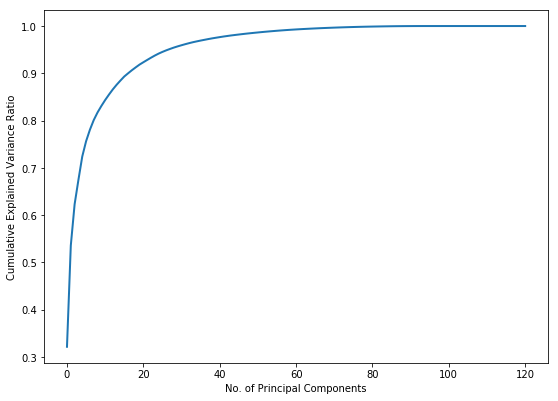

In [17]:
from sklearn.decomposition import PCA
pca1 = PCA().fit(AAPL_train_features)
plt.figure(1, figsize=(10, 7))
#plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(np.cumsum(pca1.explained_variance_ratio_), linewidth=2)
plt.axis('tight')
plt.xlabel('No. of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

#### From the the above fig., we can see that we can explain arounf 80 to 85  % of the output variance by using 20 to 30 Components.
This intuition can be verified by the step below

In [18]:
print('Explained Variance with 30 features for stocks: \n')
pca5 = []
for x in tickers:
    train_features = x + '_train_features'
    pca3 = PCA(n_components=30)
    #pca2.fit(Train_DJStocks_Features)
    projected = pca3.fit_transform(vars()[train_features])
    print(x , ' = ', (pca3.explained_variance_).sum())
    pca5.append((pca3.explained_variance_).sum())

print('\n\nAverage Explained Variance forall the stocks is : ' , np.mean(pca5))    

Explained Variance with 30 features for stocks: 

AAPL  =  115.7954433229061
GOOG  =  115.15649121983141
MCD  =  115.44689355493635
NKE  =  114.67687324380415
XOM  =  115.82225441860056
V  =  114.55100745701799
MMM  =  115.82588918947158
DIS  =  115.46466983863003
BA  =  115.57159147803225
AXP  =  115.95201691685679


Average Explained Variance forall the stocks is :  115.42631306400872


### We stack the Dataframes of stock one below another. This gives us sufficient samples to train our models.

I have standardized all the features of all the stock above. Therefore, this allows us to stack training data from all the stocks one below the other  and training can be done simultaneously.

In [19]:
featurestrain = []
trainlabels1 = []
trainlabels2 = []
trainlabels3 = []



for x in tickers:    
    train_features = x + '_train_features'
    #test_features = x + '_test_features'
    
    train_labels1 = x + '_train_labels1'
    train_labels2 = x + '_train_labels2'
    train_labels3 = x + '_train_labels3'
    
    #test_labels1 = x + '_test_labels1'
    #test_labels2 = x + '_test_labels2'
    #test_labels3 = x + '_test_labels3'
    
    
    
    featurestrain.append(vars()[train_features])
    #featurestest.append(vars()[test_features])
    
    trainlabels1.append(vars()[train_labels1])
    trainlabels2.append(vars()[train_labels2])
    trainlabels3.append(vars()[train_labels3])
    
    #telabels1.append(vars()[test_labels1])
    #telabels2.append(vars()[test_labels2])
    #telabels3.append(vars()[test_labels3])
   
Train_DJStocks_Features = pd.concat(featurestrain)
Train_DJStocks_Label1 = pd.concat(trainlabels1)
Train_DJStocks_Label2 = pd.concat(trainlabels2)
Train_DJStocks_Label3 = pd.concat(trainlabels3)

print(Train_DJStocks_Features.shape)
print(Train_DJStocks_Label1.shape)
print(Train_DJStocks_Label2.shape)
print(Train_DJStocks_Label3.shape)


(18920, 121)
(18920,)
(18920,)
(18920,)


### Dimensionality Reduction Technique 3 :
Reducing the dimension by reming the correlated Features.

In [20]:
# Correlation Matrix
Train_DJStocks_Features.corr()

Open_Change  High_Change  Volume_Change  Low_Change  \
Open_Change             1.000000     0.697964      -0.058945    0.704404   
High_Change             0.697964     1.000000       0.093237    0.696989   
Volume_Change          -0.058945     0.093237       1.000000   -0.232668   
Low_Change              0.704404     0.696989      -0.232668    1.000000   
BBWidth                 0.011371    -0.000162       0.012386    0.043047   
EMA                    -0.032610    -0.038014       0.001607   -0.034568   
DEMA                   -0.030436    -0.035965       0.001759   -0.033382   
HT_TRENDLINE           -0.034717    -0.040043       0.001987   -0.036307   
KAMA                   -0.032888    -0.038206       0.001451   -0.034663   
MA                     -0.034096    -0.039409       0.001807   -0.035560   
MIDPOINT               -0.028567    -0.033250       0.001452   -0.030704   
MIDPRICE               -0.028602    -0.033487       0.001564   -0.031030   
SAR                     0.033086     0.037050       0.000542    0.032962   
SAREXT                 -0.033086    -0.037050      -0.000542   -0.032962   
sma3                   -0.017669    -0.024406       0.001285   -0.023792   
sma5                   -0.026346    -0.032419       0.001631   -0.030831   
sma10                  -0.031612    -0.037142       0.001595   -0.034505   
sma20                  -0.033694    -0.039020       0.001762   -0.035555   
SMA                    -0.034096    -0.039409       0.001807   -0.035560   
T3                     -0.034543    -0.040084       0.001854   -0.037050   
TEMA                   -0.027693    -0.033347       0.001475   -0.031410   
RIMA                   -0.035597    -0.040787       0.001909   -0.036672   
WMA                    -0.032947    -0.038330       0.001732   -0.034998   
ADXR                   -0.004257    -0.008205      -0.004389   -0.002752   
APO                     0.027284     0.025199      -0.005659    0.013661   
AROONOSC                0.136165     0.137137       0.000845    0.112162   
BOP                    -0.009206     0.403711      -0.045608    0.365139   
CCI_3                   0.566675     0.693704      -0.056782    0.668462   
CCI_5                   0.573859     0.667993      -0.042300    0.630685   
CCI_7                   0.554930     0.624313      -0.035919    0.584846   
...                          ...          ...            ...         ...   
Vol_50                  0.028073     0.029158      -0.007998    0.034906   
Vol_75                  0.027505     0.029252      -0.009669    0.033200   
Vol_100                 0.033105     0.035001      -0.009408    0.037053   
Vol_150                 0.031473     0.034120      -0.006044    0.034399   
Vol_200                 0.030887     0.033638      -0.004914    0.032121   
Vol_250                 0.030456     0.033611      -0.004154    0.031355   
Vol_HL                 -0.127333     0.030392       0.228968   -0.348929   
Vol_MV                 -0.080888     0.042896       0.751148   -0.209304   
AD                     -0.009140    -0.010093       0.000061   -0.009802   
ADOSC                   0.243560     0.250249      -0.011151    0.221920   
OBV                     0.003992     0.005005       0.000053    0.002742   
ATR                    -0.018838    -0.023829      -0.000191   -0.008789   
NATR                   -0.032702    -0.039511       0.000621   -0.019027   
TRANGE                 -0.100012     0.068802       0.351821   -0.245786   
AVGPRICE                0.001562    -0.005359      -0.000910   -0.004714   
MEDPRICE                0.001430    -0.004527      -0.000947   -0.003717   
TYPPRICE                0.001354    -0.002580      -0.001315   -0.002118   
WCLPRICE                0.001317    -0.001606      -0.001499   -0.001319   
HT_DCPERIOD            -0.008339    -0.008198       0.005333   -0.008249   
HT_DCPHASE             -0.025374    -0.017880       0.005295   -0.024291   
HT_TRENDMODE            0.011242     0.005956      -0.015710    0.017

In [21]:
# Dropping Correlated features from the stacked Dataframe

deletion = []
print(Train_DJStocks_Features.shape)
col_corr = set()
def correlation(dataset, threshold):
     # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    deletion.append(colname)
                    del dataset[colname] # deleting the column from the dataset
    #print(col_corr)

correlation(Train_DJStocks_Features,0.95)
print('Reduced Dimensions of Feature Space: ' , Train_DJStocks_Features.shape)
print('\nFeatures that are deleted beacuse of strong correlation with other features:\n' , col_corr)

(18920, 121)
Reduced Dimensions of Feature Space:  (18920, 86)

Features that are deleted beacuse of strong correlation with other features:
 {'TYPPRICE', 'ROCP_17', 'sma5', 'ROCR100', 'LINEARREG_INTERCEPT', 'RSI_14', 'ROCP_13', 'ROCP_16', 'ROCP_18', 'AVGPRICE', 'sma3', 'LINEARREG', 'sma20', 'WMA', 'ROCP_15', 'WCLPRICE', 'ROCP_20', 'KAMA', 'T3', 'ROCP_19', 'TSF', 'SMA', 'ROCR', 'MIDPRICE', 'ROCP_14', 'HT_TRENDLINE', 'MIDPOINT', 'TEMA', 'LINEARREG_ANGLE', 'DEMA', 'ROCP_10', 'MEDPRICE', 'sma10', 'RIMA', 'MA'}


In [22]:
# Dropping all the perfectly correlated features from all individual Stock DataFrames

for x in tickers:
    a = x + '_train_features'
    b = x + '_test_features'
    vars()[a] = vars()[a].drop(col_corr,axis=1)
    vars()[b] = vars()[b].drop(col_corr,axis=1)
print(AAPL_train_features.shape)
print(AAPL_test_features.shape)

(1892, 86)
(371, 86)


In [23]:
Train_DJStocks_Features.sort_index(ascending=True, inplace=True)
Train_DJStocks_Label1.sort_index(ascending=True, inplace=True)
Train_DJStocks_Label2.sort_index(ascending=True, inplace=True)
Train_DJStocks_Label3.sort_index(ascending=True, inplace=True)
Train_DJStocks_Features.shape


(18920, 86)

### Exploratory Data Analysis for Features and Labels :


#### Violin plot: Label 1

> Violin plots are great way to identify features for selection as they can show the data dynamics for all labels separately

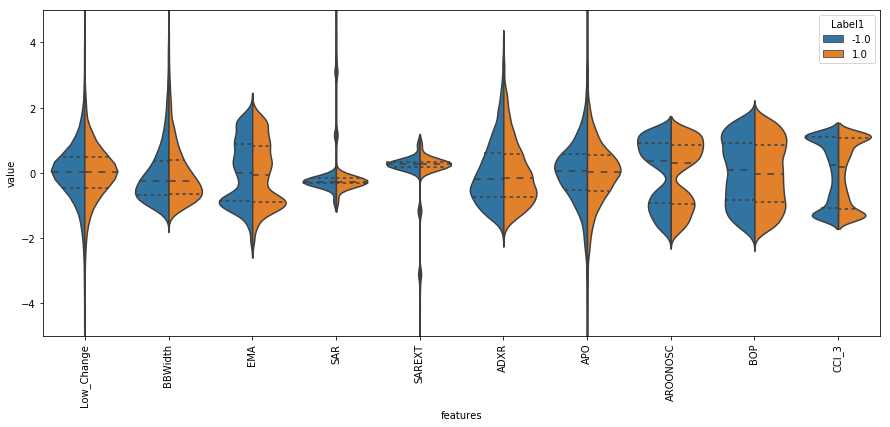

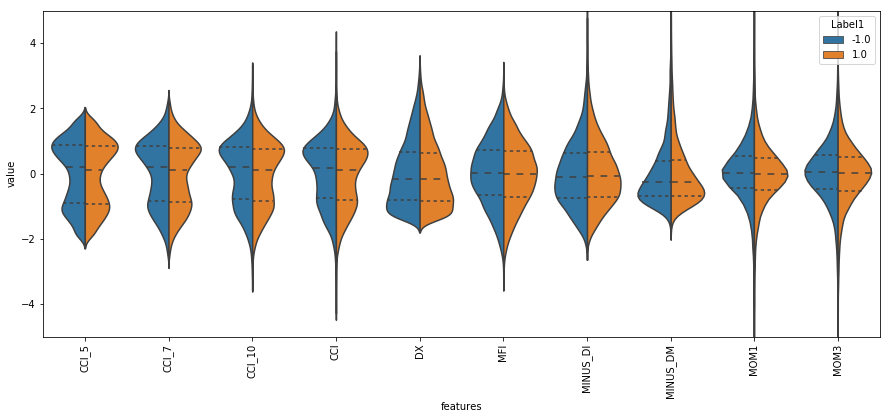

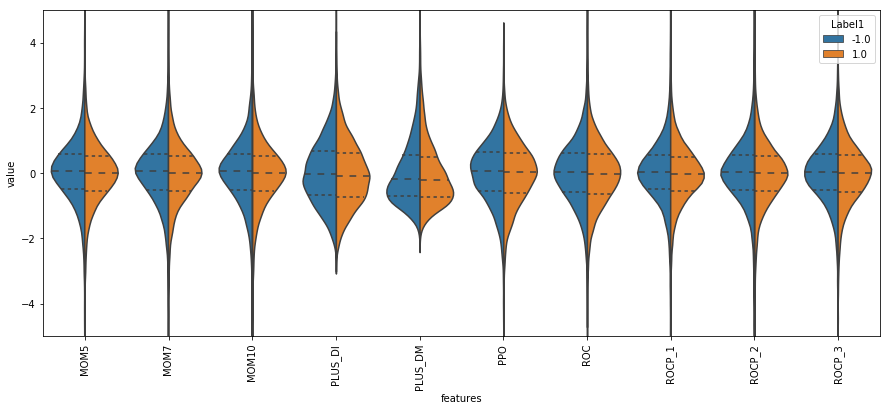

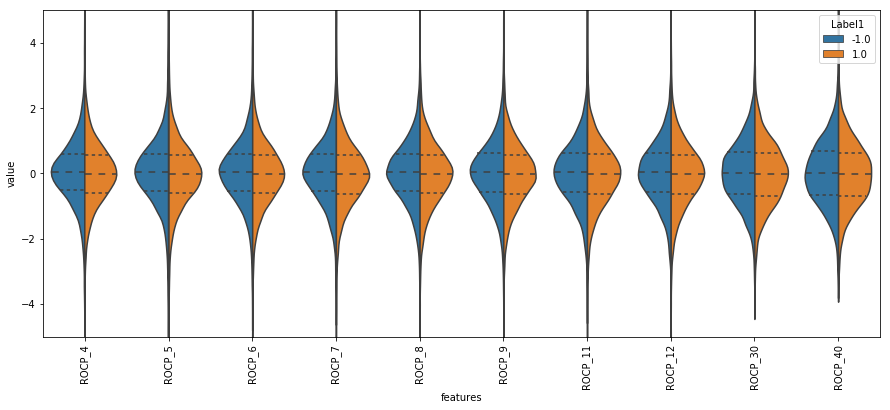

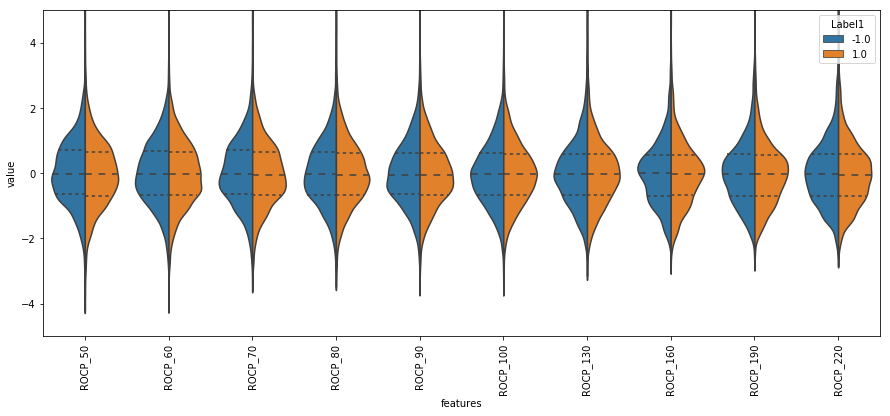

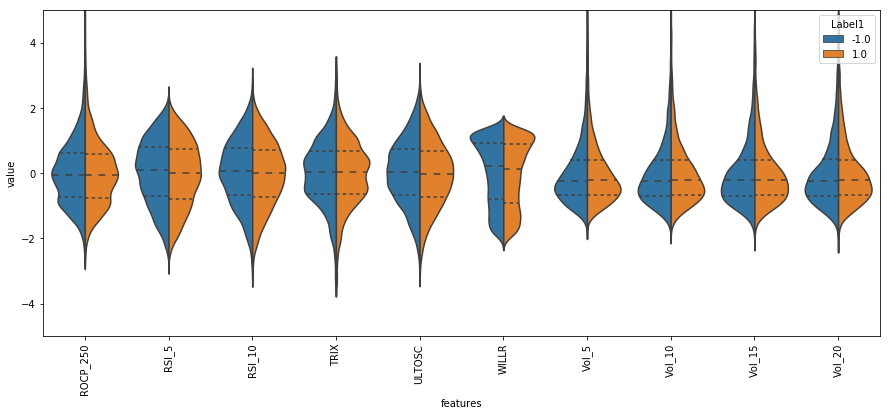

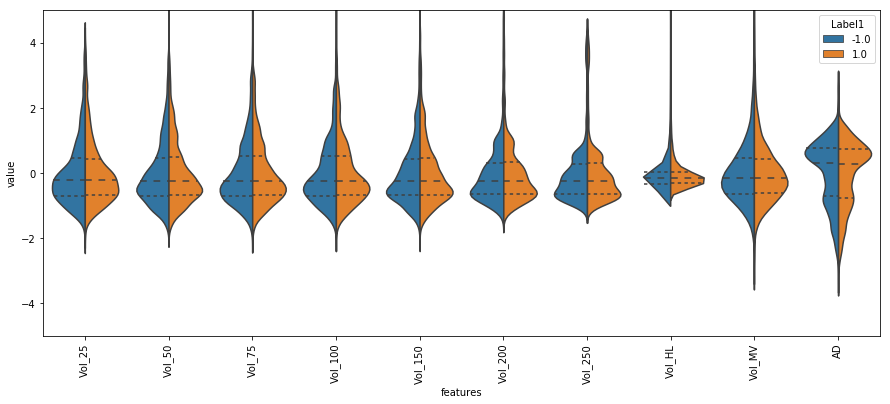

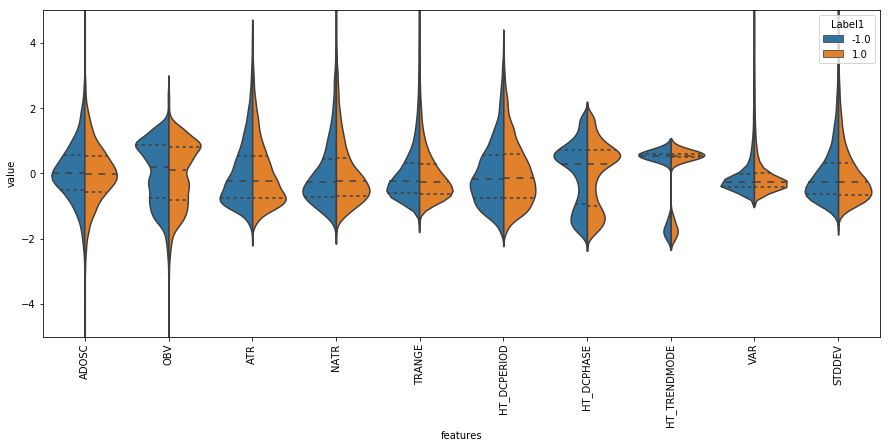

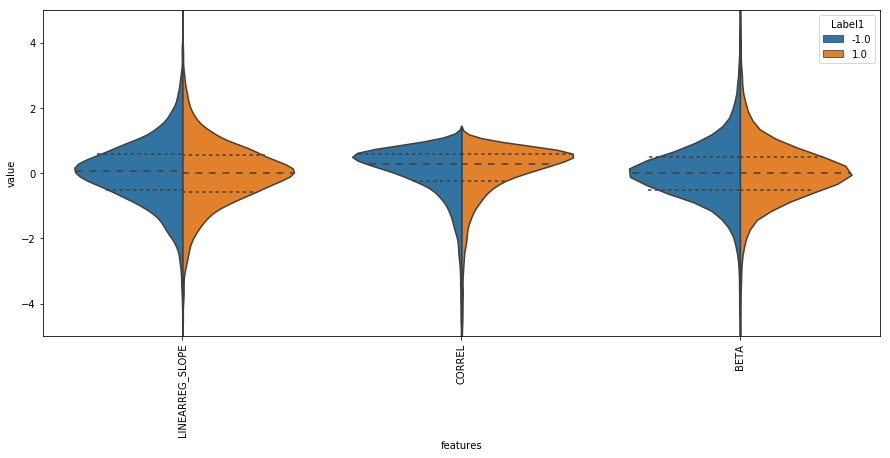

In [24]:
for i in range (3,86,10):
    data = pd.concat([Train_DJStocks_Label1,Train_DJStocks_Features.iloc[:,i:i+10]],axis=1)
    data = pd.melt(data,id_vars="Label1",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(15,6))
    sns.violinplot(x="features", y="value", hue="Label1", data=data,split=True, inner="quart")
    plt.ylim(-5,5)
    plt.xticks(rotation=90)

#### Violin plot: Label 2

> Violin plots are great way to identify features for selection as they can show the data dynamics for all labels separately

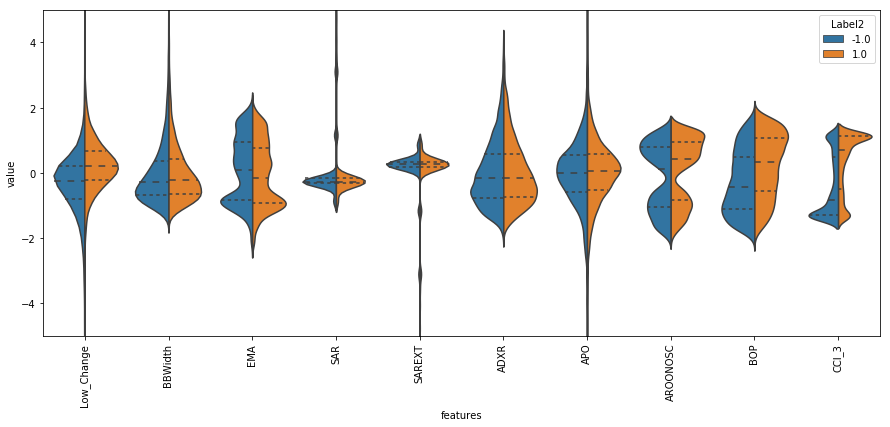

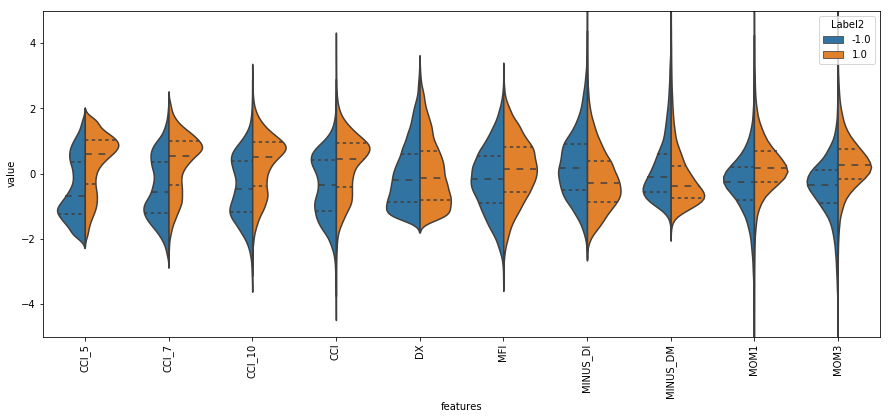

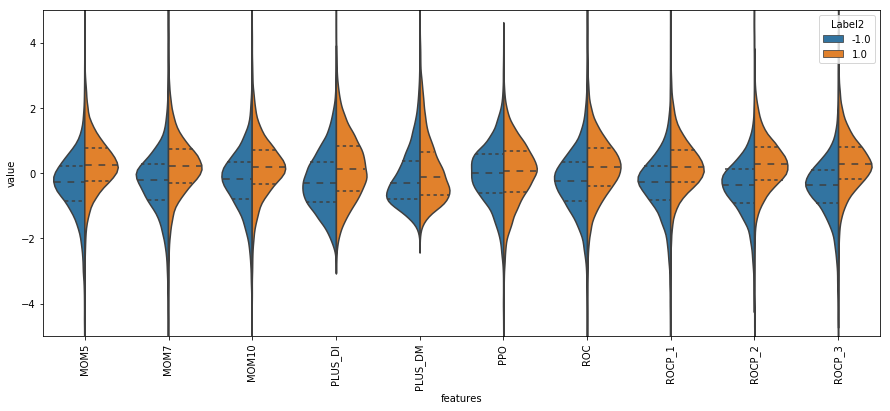

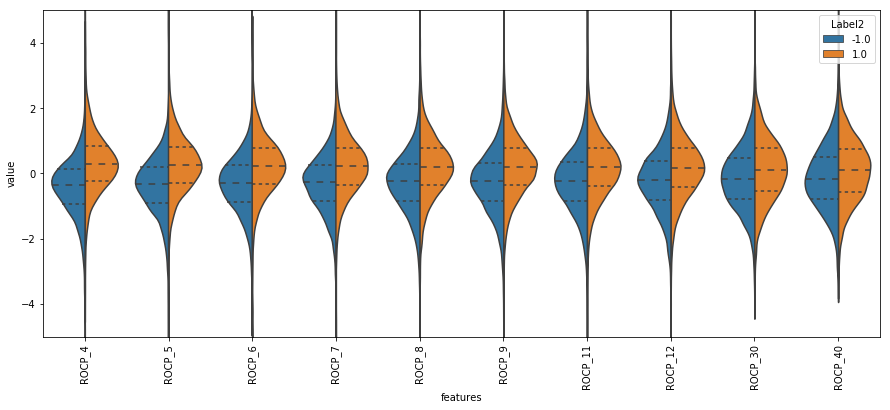

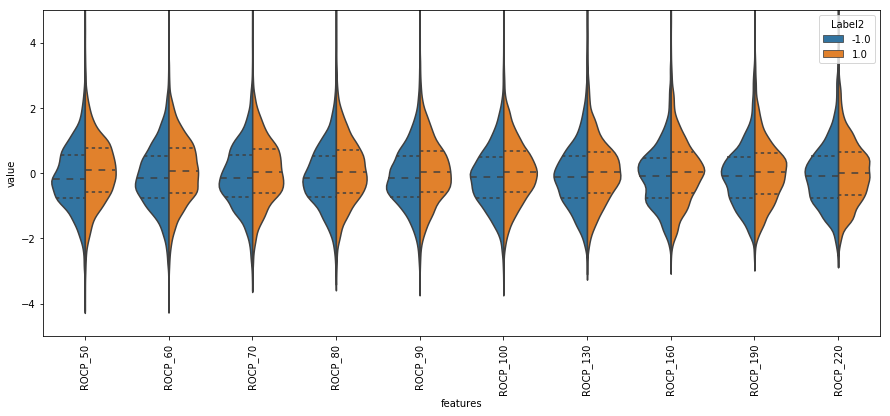

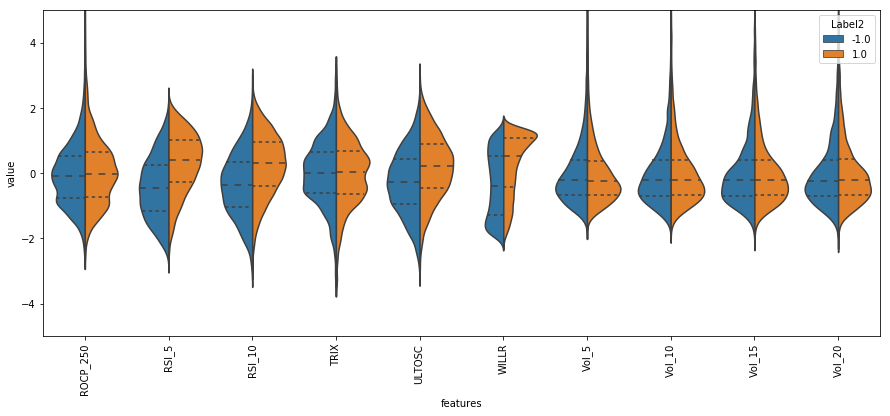

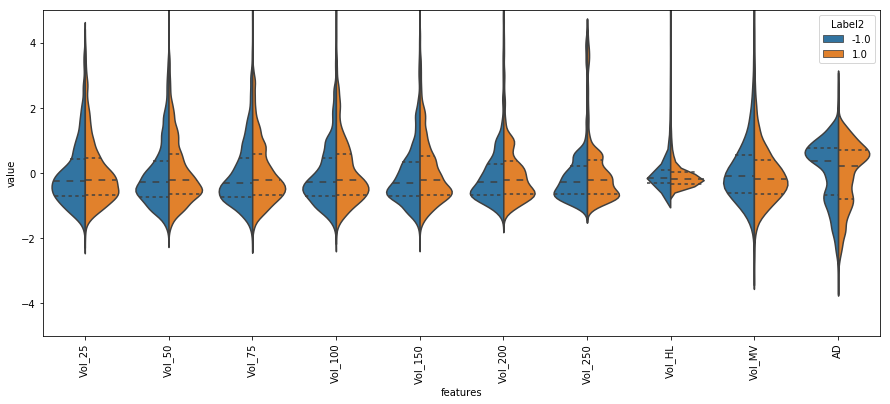

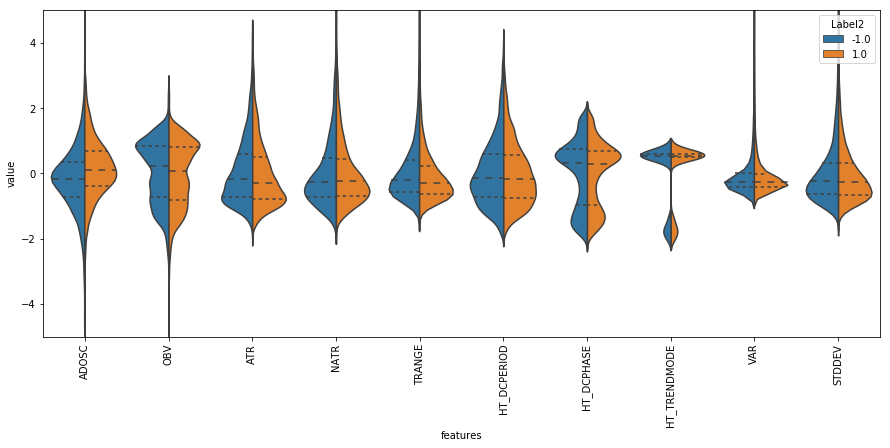

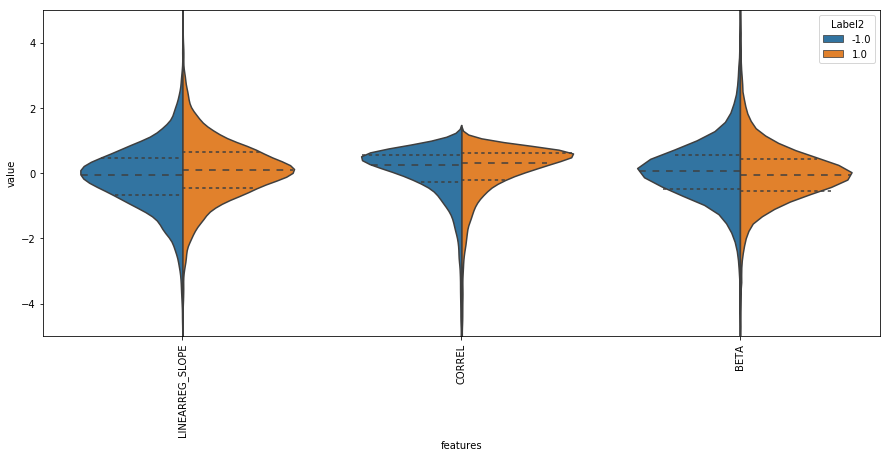

In [25]:
for i in range (3,86,10):
    data = pd.concat([Train_DJStocks_Label2,Train_DJStocks_Features.iloc[:,i:i+10]],axis=1)
    data = pd.melt(data,id_vars="Label2",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(15,6))
    sns.violinplot(x="features", y="value", hue="Label2", data=data,split=True, inner="quart")
    plt.ylim(-5,5)
    plt.xticks(rotation=90)

#### Violin plot: Label 3

> Violin plots are great way to identify features for selection as they can show the data dynamics for all labels separately

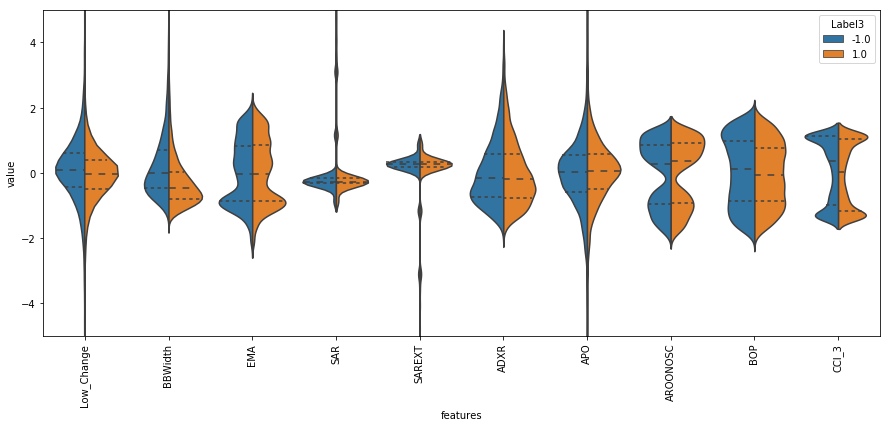

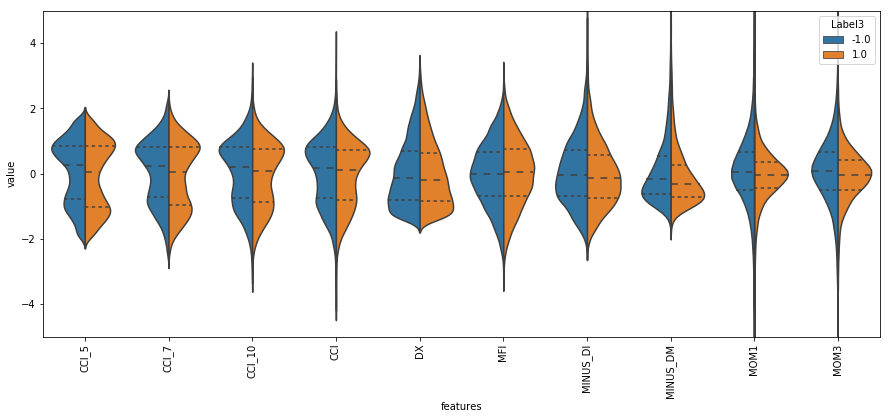

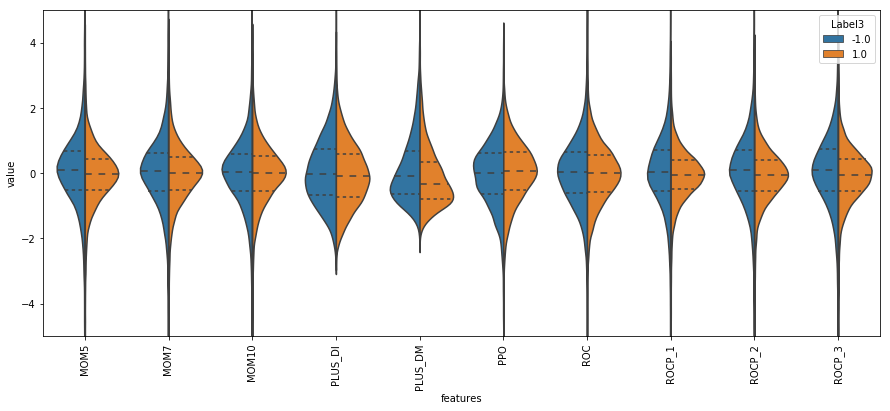

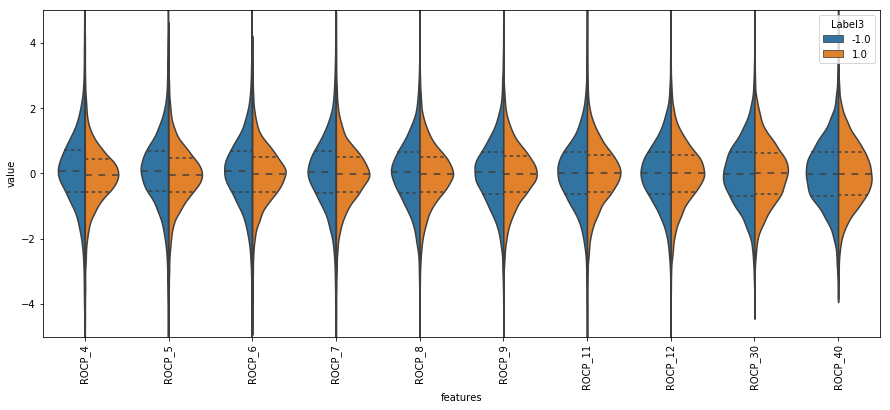

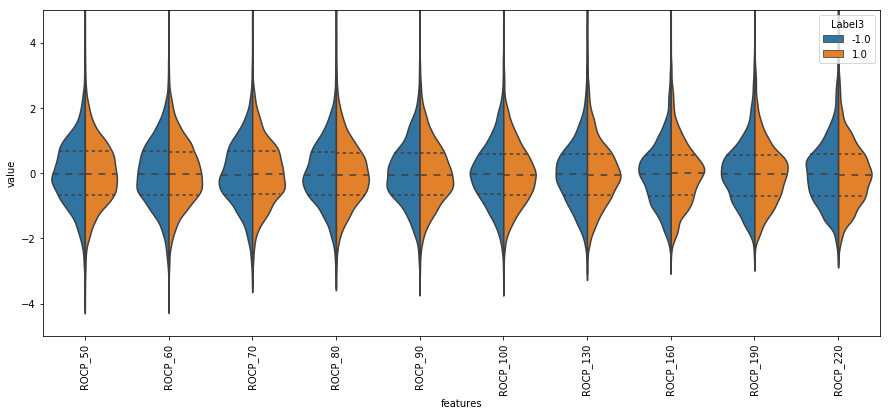

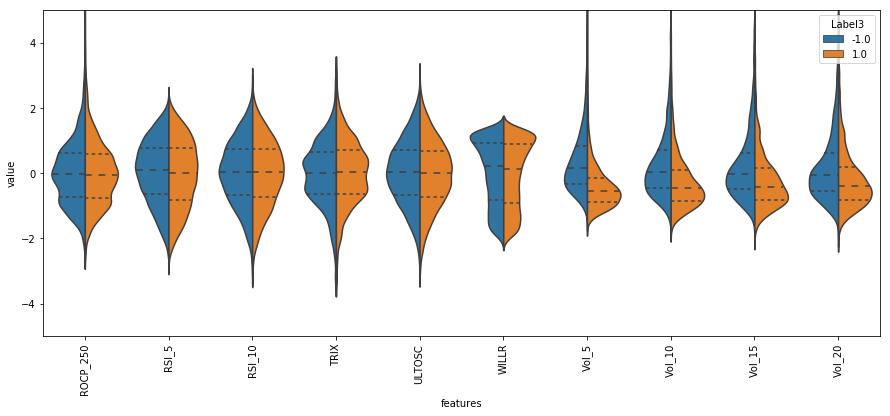

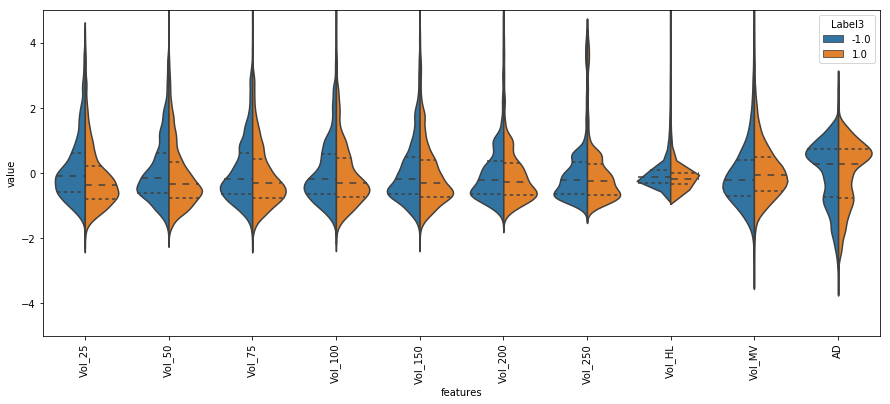

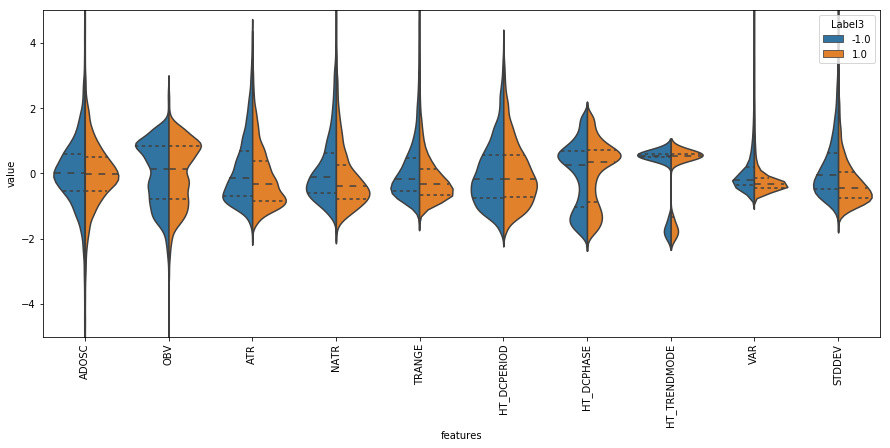

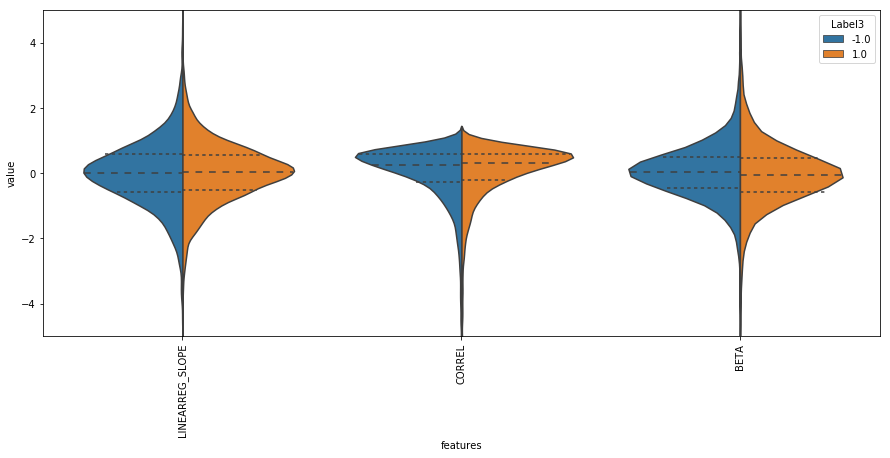

In [26]:
for i in range (3,86,10):
    data = pd.concat([Train_DJStocks_Label3,Train_DJStocks_Features.iloc[:,i:i+10]],axis=1)
    data = pd.melt(data,id_vars="Label3",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(15,6))
    sns.violinplot(x="features", y="value", hue="Label3", data=data,split=True, inner="quart")
    plt.ylim(-5,5)
    plt.xticks(rotation=90)

### Data Visualization for 3 output Labels:
Understanding the labels - This will let know if there is any imbalances in outplut labels.This help us select Performance metrics that we can use for evaluating the performance of Models.

### Label 1:

--------------LABEL - 1--------------------
Number of Positive Returns:  9988 
Percentage: 0.5279069767441861
Number of Negative Returns :  8932 
Percentage: 0.4720930232558139


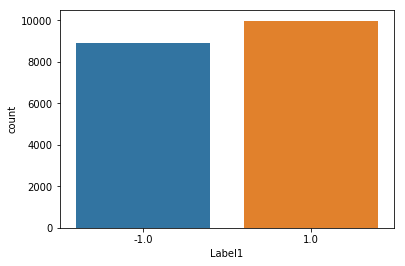

In [27]:
ax1 = sns.countplot(Train_DJStocks_Label1,label="Count")
Positive, Negative = Train_DJStocks_Label1.value_counts()
print('--------------LABEL - 1--------------------')
print('Number of Positive Returns: ',Positive,'\nPercentage:',Positive/Train_DJStocks_Label1.count())
print('Number of Negative Returns : ',Negative,'\nPercentage:',Negative/Train_DJStocks_Label1.count())

--------------LABEL - 1--------------------
Number of Positive Returns:  10867 
Percentage: 57.436575052854124
Number of Negative Returns :  8053 
Percentage: 42.563424947145876


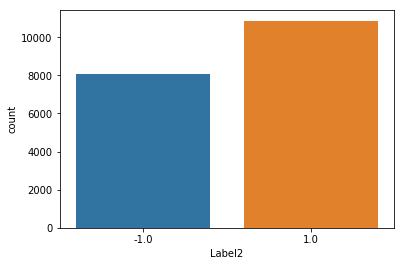

In [28]:
ax2 = sns.countplot(Train_DJStocks_Label2,label="Count")
Positive, Negative = Train_DJStocks_Label2.value_counts()
print('--------------LABEL - 1--------------------')
print('Number of Positive Returns: ',Positive,'\nPercentage:',Positive/Train_DJStocks_Label2.count()*100)
print('Number of Negative Returns : ',Negative,'\nPercentage:',Negative/Train_DJStocks_Label2.count()*100)

--------------LABEL - 1--------------------
Number of Positive Returns:  9523 
Percentage: 50.33298097251586
Number of Negative Returns :  9397 
Percentage: 49.667019027484145


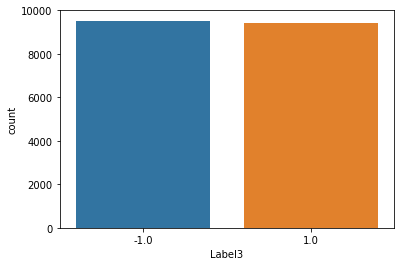

In [29]:
ax3 = sns.countplot(Train_DJStocks_Label3,label="Count")
Positive, Negative = Train_DJStocks_Label3.value_counts()
print('--------------LABEL - 1--------------------')
print('Number of Positive Returns: ',Positive,'\nPercentage:',Positive/Train_DJStocks_Label3.count()*100)
print('Number of Negative Returns : ',Negative,'\nPercentage:',Negative/Train_DJStocks_Label3.count()*100)

# Model Training and Parameter Tunning

In [30]:
from sklearn.svm import SVC,LinearSVC
#import xgboost as xgb
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score,f1_score,log_loss,precision_score,recall_score

# Label 1 - Model 1
Logistic Regression -  K Fold Cross Validation

In [31]:
tic =time.time()

best_score_acc=-1
best_c_acc=None
best_penalty_acc=None

best_f1_score = -1
best_c_f1 = None
best_penalty_f1=None

#best_auc_score = -1
#best_c_auc = None
#best_penalty_auc = None


for c in [0.001,0.01,0.1,1,10,100]:
    for pen in ['l1','l2']:
        for i in range(0,8000,2000):    
            #Preparing Data for custom K-Fold Corass Vlidation
            x_train = Train_DJStocks_Features[i:i+8000]
            y_train = Train_DJStocks_Label1[i:i+8000]
                                           
            
            # Validation Set
            x_test =  Train_DJStocks_Features[i+8000: i+10000]
            y_test =  Train_DJStocks_Label1[i+8000: i+10000]
            
            
            #Model Training
            lr = LogisticRegression(penalty=pen,C= c)
            lr.fit(x_train, y_train)
            lr.predict(x_train)
            y_test_predict =lr.predict(x_test)
            
            
            # Taking 2 Evaluation Metrics : Accuracy Score and F1 Score
            score = accuracy_score(y_true=y_test,y_pred=y_test_predict)
            f1score = f1_score(y_true=y_test,y_pred=y_test_predict,average='micro')
            #aucscore=roc_auc_score(y_true=y_test,y_score=y_test_predict)
            
            if score>best_score_acc:
                best_score_acc=score
                best_c_acc=c
                best_penalty_acc=pen
            if f1score>best_f1_score:
                best_f1_score = f1score
                best_c_f1=c
                best_penalty_f1=pen
            #if aucscore>best_auc_score:
            #    best_auc_score = aucscore
            #    best_c_auc = c
            #    best_penalty_auc = pen 
                

                
print('Best Logistic Regression Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc)
print('with value of C: ',best_c_acc)
print('and penalty: ',best_penalty_acc)

print('\nBest Logistic Regression Model according to F1 score:')
print('Best F1 Score:', best_f1_score)
print('with value of C: ',best_c_f1)
print('and penalty: ',best_penalty_f1)

#print('\nBest Logistic Regression Model according to AUC score:')
#print('Best AUC Score:', best_auc_score)
#print('with value of C: ',best_c_auc)
#print('and penalty: ',best_penalty_auc)

toc =time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')

Best Logistic Regression Model according to Accuracy score:
Best Accucarcy Score: 0.529
with value of C:  0.01
and penalty:  l1

Best Logistic Regression Model according to F1 score:
Best F1 Score: 0.529
with value of C:  0.01
and penalty:  l1


Time taken to Train the model:  0.8497438947359721  minutes


# Model 2 : Support Vector Machine

In [32]:
tic =time.time()
best_score_acc=-1
best_c_acc=None
best_gamma_acc=None

best_f1_score = -1
best_c_f1 = None
best_gamma_f1=None




for c in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        for i in range(0,8000,2000):    
            #Preparing Data for custom K-Fold Corass Vlidation
            x_train = Train_DJStocks_Features[i:i+8000]
            y_train = Train_DJStocks_Label1[i:i+8000]
            
            # Validation Set
            x_test =  Train_DJStocks_Features[i+8000: i+10000]
            y_test =  Train_DJStocks_Label1[i+8000: i+10000]
            
            svc=SVC(C=c,gamma=gamma,kernel='rbf')
            svc.fit(X=x_train,y=y_train)
            y_predict_train = svc.predict(x_train)
            y_predict_test= svc.predict(x_test)
            
            # Evaluation Metrics
            score = accuracy_score(y_true=y_test,y_pred=y_predict_test)
            f1score = f1_score(y_true=y_test,y_pred=y_predict_test,average='micro')
            
            if score>best_score_acc:
                best_score_acc=score
                best_c_acc = c
                best_gamma_acc = gamma
            if f1score>best_f1_score:
                best_f1_score=f1score
                best_c_f1 = c
                best_gamma_f1 = gamma
            
                
print('Best SVM Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc)
print('with value of C: ',best_c_acc)
print('and penalty: ',best_gamma_acc)

print('\nBest SVM Model according to F1 score:')
print('Best F1 Score:', best_f1_score)
print('with value of C: ',best_c_f1)
print('and penalty: ',best_gamma_f1)           
            
            
            
toc = time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')




Best SVM Model according to Accuracy score:
Best Accucarcy Score: 0.5445
with value of C:  1
and penalty:  0.001

Best SVM Model according to F1 score:
Best F1 Score: 0.5445
with value of C:  1
and penalty:  0.001


Time taken to Train the model:  38.48849689563115  minutes


# Model 3: Ramdon Forest

In [33]:
tic =time.time()
best_score_acc=-1
best_criterion_acc=None
best_maxdepth_acc=None
best_maxfeatures_acc=None
best_minsampleleaf_acc=None
best_nestimators_acc=None

best_score_f1=-1
best_criterion_f1=None
best_maxdepth_f1=None
best_maxfeatures_f1=None
best_minsampleleaf_f1=None
best_nestimators_f1=None

n_estimators = [40,100,200]
criterion = ["entropy","gini"]
max_features = ["sqrt","log2",30,50]
max_depth = [10,15,20,None]
min_samples_leaf = [1,5,10]
                        
                        
for est in n_estimators:
    for crit in criterion:
        for mf in max_features:
            for md in max_depth:
                for samples in min_samples_leaf:
                    for i in range(0,8000,2000):    
                        #Preparing Data for custom K-Fold Corass Vlidation
                        x_train = Train_DJStocks_Features[i:i+8000]
                        y_train = Train_DJStocks_Label1[i:i+8000]
            
                        # Validation Set
                        x_test =  Train_DJStocks_Features[i+8000: i+10000]
                        y_test =  Train_DJStocks_Label1[i+8000: i+10000]
                        
                        rf = RandomForestClassifier(criterion=crit, max_depth=md ,max_features=mf, min_samples_leaf=samples,n_estimators=est)
                        rf.fit(X=x_train,y=y_train)
                        y_predict_train = rf.predict(x_train)
                        y_predict_test= rf.predict(x_test)
                        
                        
                        # Evaluation Metrics
                        score = accuracy_score(y_true=y_test,y_pred=y_predict_test)
                        f1score = f1_score(y_true=y_test,y_pred=y_predict_test,average='micro')

                        if score>best_score_acc:
                            best_score_acc=score
                            best_nestimators_acc=est
                            best_criterion_acc = crit
                            best_maxdepth_acc = md
                            best_maxfeatures_acc = mf
                            best_minsampleleaf_acc = samples
                            
                        if f1score>best_f1_score:
                            best_score_f1=score
                            best_nestimators_f1=est
                            best_criterion_f1 = crit
                            best_maxdepth_f1 = md
                            best_maxfeatures_f1 = mf
                            best_minsampleleaf_f1 = samples
                            
                
print('Best Random Forest Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc)
print('Optimal No. of Estimators: ',best_nestimators_acc)
print('and Best Criterion: ',best_criterion_acc)
print('Optimal Max Depth: ',best_maxdepth_acc)
print('Optimal Max Features: ',best_maxfeatures_acc)
print('Optimal Min Sample leaf: ',best_minsampleleaf_acc)


print('\nBest Random Forest Model according to F1 score:')
print('Best Accucarcy Score:',best_score_f1)
print('Optimal No. of Estimators: ',best_nestimators_f1)
print('and Best Criterion: ',best_criterion_f1)
print('Optimal Max Depth: ',best_maxdepth_f1)
print('Optimal Max Features: ',best_maxfeatures_f1)
print('Optimal Min Sample leaf: ',best_minsampleleaf_f1)
            
toc = time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')
                        
                        

Best Random Forest Model according to Accuracy score:
Best Accucarcy Score: 0.538
Optimal No. of Estimators:  200
and Best Criterion:  entropy
Optimal Max Depth:  10
Optimal Max Features:  log2
Optimal Min Sample leaf:  1

Best Random Forest Model according to F1 score:
Best Accucarcy Score: -1
Optimal No. of Estimators:  None
and Best Criterion:  None
Optimal Max Depth:  None
Optimal Max Features:  None
Optimal Min Sample leaf:  None


Time taken to Train the model:  389.7487939159075  minutes


# Model 4: Gradient Boost - XGBoost

In [34]:
'''
tic =time.time()
best_score_acc=-1
best_maxdepth_acc=None
best_nestimators_acc=None

best_score_f1=-1
best_maxdepth_f1=None
best_nestimators_f1=None

n_estimators = [50,100,200]
max_depth = [3,5,7,10]

                        
                        
for est in n_estimators:
    for md in max_depth:
        for samples in min_samples_leaf:
            for i in range(0,4000,1000):    
                #Preparing Data for custom K-Fold Corass Vlidation
                x_train = Train_DJStocks_Features[i:i+4000]
                y_train = Train_DJStocks_Label1[i:i+4000]
            
                # Validation Set
                x_test =  Train_DJStocks_Features[i+4000: i+5000]
                y_test =  Train_DJStocks_Label1[i+4000: i+5000]
                        
                        
                        
                xgbmodel= xgb.XGBClassifier(max_depth=md,n_estimators=est)
                xgbmodel.fit(X=x_train,y=y_train)
                y_predict_train = xgbmodel.predict(x_train)
                y_predict_test= xgbmodel.predict(x_test)
                        
                        
                # Evaluation Metrics
                score = accuracy_score(y_true=y_test,y_pred=y_predict_test)
                f1score = f1_score(y_true=y_test,y_pred=y_predict_test,average='micro')

                if score>best_score_acc:
                    best_score_acc=score
                    best_maxdepth_acc = md
                    best_estimator_acc=est
                    
                            
                if f1score>best_f1_score:
                    best_score_f1=score
                    best_maxdepth_f1 = md
                    best_estimator_f1=est
                
print('Best XG Boost Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc)
print('Optimal No. of Estimators: ',best_estimator_acc)
print('Optimal Max Depth: ',best_maxdepth_acc)


print('\nBest XG Boost Model according to F1 score:')
print('Best Accucarcy Score:',best_score_f1)
print('Optimal No. of Estimators: ',best_estimator_f1)
print('Optimal Max Depth: ',best_maxdepth_f1)

            
toc = time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')
'''

"\ntic =time.time()\nbest_score_acc=-1\nbest_maxdepth_acc=None\nbest_nestimators_acc=None\n\nbest_score_f1=-1\nbest_maxdepth_f1=None\nbest_nestimators_f1=None\n\nn_estimators = [50,100,200]\nmax_depth = [3,5,7,10]\n\n                        \n                        \nfor est in n_estimators:\n    for md in max_depth:\n        for samples in min_samples_leaf:\n            for i in range(0,4000,1000):    \n                #Preparing Data for custom K-Fold Corass Vlidation\n                x_train = Train_DJStocks_Features[i:i+4000]\n                y_train = Train_DJStocks_Label1[i:i+4000]\n            \n                # Validation Set\n                x_test =  Train_DJStocks_Features[i+4000: i+5000]\n                y_test =  Train_DJStocks_Label1[i+4000: i+5000]\n                        \n                        \n                        \n                xgbmodel= xgb.XGBClassifier(max_depth=md,n_estimators=est)\n                xgbmodel.fit(X=x_train,y=y_train)\n                y_

# Using the best Hyper-Parameters for each model and Training them
This will also enable us to get Feature Importance

Logistic Regression Model Trained


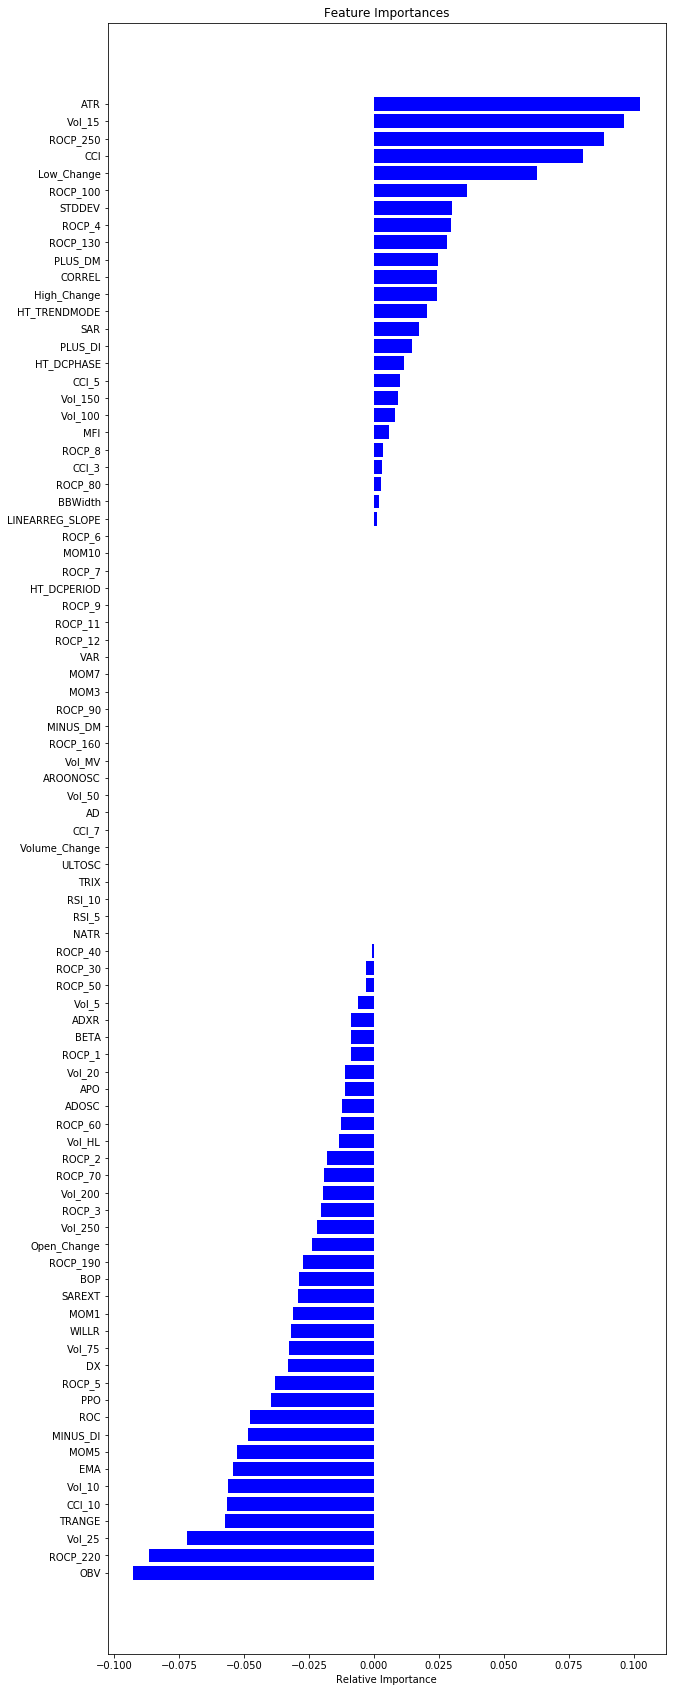

In [33]:
lr_1 = LogisticRegression(C=0.1,penalty='l1')
lr_1.fit(Train_DJStocks_Features,Train_DJStocks_Label1)
features = Train_DJStocks_Features.columns
importances = lr_1.coef_[0]
indices = np.argsort(importances)
print('Logistic Regression Model Trained')
plt.figure(figsize=(10,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()



In [34]:
# Model 2 Support Vector Machine

#The Feature importance Feature(svc.coef_) for Support Vector Machine is only available if the the kenrnel if linear. (We have used RBF)
svc_1 = SVC(C=1,gamma=0.001,kernel='rbf',probability=True)
svc_1.fit(Train_DJStocks_Features,Train_DJStocks_Label1)
print('Support Vector Machine Model Trained')

Support Vector Machine Model Trained


Random Forest Model Trained


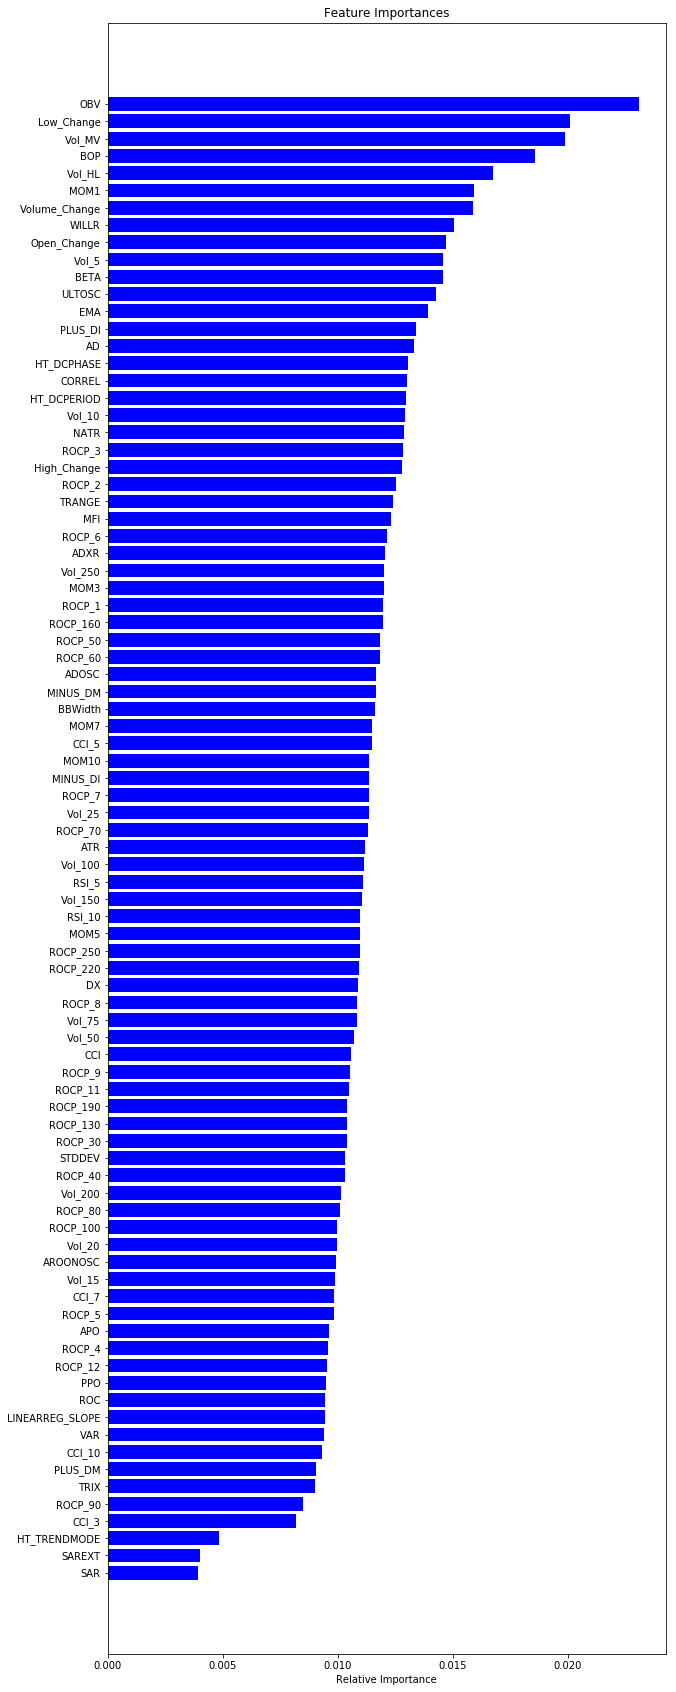

In [35]:
# Model 3 Random Forest 
rf_1 = RandomForestClassifier(criterion='entropy', max_depth=10 ,max_features=30, min_samples_leaf=1,n_estimators=200)
rf_1.fit(Train_DJStocks_Features,Train_DJStocks_Label1)
print('Random Forest Model Trained')
features = Train_DJStocks_Features.columns
importances = rf_1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# Out of Sample Predictions for Label 1

Time Period January 2017 to July 2018
371 predictions per company



# Logistic Regression Predictions for Label 1 

In [36]:
Accuracy = []
F1Score = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    
    model1 = x + '_Log'
    features = x + '_test_features'
    test_labels1 = x + '_test_labels1'    
    
    vars()[model1] = lr_1.predict(vars()[features])
    vars()[x+'_Acc'] = accuracy_score(y_true=vars()[test_labels1],y_pred=vars()[model1])
    vars()[x+'_F1'] = f1_score(y_true=vars()[test_labels1],y_pred=vars()[model1], pos_label=1,average='micro')
    print('Accuracy =',vars()[x+'_Acc'])
    print('F1 Score =',vars()[x+'_F1'])
    Accuracy.append(vars()[x+'_Acc'])
    F1Score.append(vars()[x+'_F1'])
print('\n\nAggregate Accuracy = ', np.mean(Accuracy), 'Aggregate F1 = ',np.mean(F1Score))   

-------------------------------------------------------------------
Stock = AAPL
Accuracy = 0.522911051212938
F1 Score = 0.522911051212938
-------------------------------------------------------------------
Stock = GOOG
Accuracy = 0.5336927223719676
F1 Score = 0.5336927223719676
-------------------------------------------------------------------
Stock = MCD
Accuracy = 0.5849056603773585
F1 Score = 0.5849056603773585
-------------------------------------------------------------------
Stock = NKE
Accuracy = 0.49865229110512127
F1 Score = 0.49865229110512127
-------------------------------------------------------------------
Stock = XOM
Accuracy = 0.5471698113207547
F1 Score = 0.5471698113207547
-------------------------------------------------------------------
Stock = V
Accuracy = 0.5660377358490566
F1 Score = 0.5660377358490566
-------------------------------------------------------------------
Stock = MMM
Accuracy = 0.5471698113207547
F1 Score = 0.5471698113207547
--------------------

# Support Vector Predictions for Label 1   (Out of Sample Predictions)

In [37]:
Accuracy = []
F1Score = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    
    model2 = x + '_SVM'
    features = x + '_test_features'
    test_labels1 = x + '_test_labels1'    
    
    vars()[model2] = svc_1.predict(vars()[features])
    vars()[x+'_Acc'] = accuracy_score(y_true=vars()[test_labels1],y_pred=vars()[model2])
    vars()[x+'_F1'] = f1_score(y_true=vars()[test_labels1],y_pred=vars()[model1], pos_label=1,average='micro')
    print('Accuracy =',vars()[x+'_Acc'])
    print('F1 Score =',vars()[x+'_F1'])
    Accuracy.append(vars()[x+'_Acc'])
    F1Score.append(vars()[x+'_F1'])
print('\n\nAggregate Accuracy = ', np.mean(Accuracy), 'Aggregate F1 = ',np.mean(F1Score))   

-------------------------------------------------------------------
Stock = AAPL
Accuracy = 0.5283018867924528
F1 Score = 0.5283018867924528
-------------------------------------------------------------------
Stock = GOOG
Accuracy = 0.5660377358490566
F1 Score = 0.5579514824797843
-------------------------------------------------------------------
Stock = MCD
Accuracy = 0.5768194070080862
F1 Score = 0.5768194070080862
-------------------------------------------------------------------
Stock = NKE
Accuracy = 0.5336927223719676
F1 Score = 0.5013477088948787
-------------------------------------------------------------------
Stock = XOM
Accuracy = 0.5040431266846361
F1 Score = 0.522911051212938
-------------------------------------------------------------------
Stock = V
Accuracy = 0.6064690026954178
F1 Score = 0.5876010781671159
-------------------------------------------------------------------
Stock = MMM
Accuracy = 0.555256064690027
F1 Score = 0.5633423180592992
----------------------

# Random Forest Predictions for Label 1  (Out of Sample Predictions)

In [38]:
Accuracy = []
F1Score = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    
    model3 = x + '_RF'
    features = x + '_test_features'
    test_labels1 = x + '_test_labels1'    
    
    vars()[model3] = rf_1.predict(vars()[features])
    vars()[x+'_Acc'] = accuracy_score(y_true=vars()[test_labels1],y_pred=vars()[model3])
    vars()[x+'_F1'] = f1_score(y_true=vars()[test_labels1],y_pred=vars()[model3], pos_label=1,average='micro')
    print('Accuracy =',vars()[x+'_Acc'])
    print('F1 Score =',vars()[x+'_F1'])
    Accuracy.append(vars()[x+'_Acc'])
    F1Score.append(vars()[x+'_F1'])
print('\n\nAggregate Accuracy = ', np.mean(Accuracy), 'Aggregate F1 = ',np.mean(F1Score))   

-------------------------------------------------------------------
Stock = AAPL
Accuracy = 0.5148247978436657
F1 Score = 0.5148247978436657
-------------------------------------------------------------------
Stock = GOOG
Accuracy = 0.5390835579514824
F1 Score = 0.5390835579514824
-------------------------------------------------------------------
Stock = MCD
Accuracy = 0.5579514824797843
F1 Score = 0.5579514824797843
-------------------------------------------------------------------
Stock = NKE
Accuracy = 0.5283018867924528
F1 Score = 0.5283018867924528
-------------------------------------------------------------------
Stock = XOM
Accuracy = 0.522911051212938
F1 Score = 0.522911051212938
-------------------------------------------------------------------
Stock = V
Accuracy = 0.5983827493261455
F1 Score = 0.5983827493261455
-------------------------------------------------------------------
Stock = MMM
Accuracy = 0.555256064690027
F1 Score = 0.555256064690027
------------------------

## Best Prediction for each Company:
#### Identify best classifier for each company and calculate aggregate of best accuracy for each company

In [62]:
Acc = []
F1 = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    c = x + '_test_features'
    d = x + '_test_labels1'
    vars()[x+'_pred_LR'] = lr_1.predict(vars()[c])
    vars()[x+'_pred_svc'] = svc_1.predict(vars()[c])
    vars()[x+'_pred_RF'] = rf_1.predict(vars()[c])
    vars()[x+'_F1_LR'] = f1_score(vars()[d], vars()[x+'_pred_LR'], pos_label=1)
    vars()[x+'_F1_svc'] = f1_score(vars()[d], vars()[x+'_pred_svc'], pos_label=1)
    vars()[x+'_F1_RF'] = f1_score(vars()[d], vars()[x+'_pred_RF'], pos_label=1)
    vars()[x+'_Acc_LR'] = accuracy_score(vars()[d], vars()[x+'_pred_LR']) 
    vars()[x+'_Acc_svc'] = accuracy_score(vars()[d], vars()[x+'_pred_svc']) 
    vars()[x+'_Acc_RF'] = accuracy_score(vars()[d], vars()[x+'_pred_RF']) 
    best_acc = max(vars()[x+'_Acc_LR'],vars()[x+'_Acc_svc'],vars()[x+'_Acc_RF'])
    if best_acc == vars()[x+'_Acc_LR']:
        clf = 'Logistic Regression'
        f1 = vars()[x+'_F1_LR']
        Acc.append(best_acc)
        F1.append(f1)
    elif best_acc == vars()[x+'_Acc_svc']:
        clf = 'SVC'
        f1 = vars()[x+'_F1_svc']
        Acc.append(best_acc)
        F1.append(f1)
    else:
        clf = 'Random Forest'
        f1 = vars()[x+'_F1_RF']
        Acc.append(best_acc)
        F1.append(f1)
    print('Best_Accuracy = ', best_acc,'\nF1 = ', f1,'\nBest Classifier = ', clf)
print('\n\nAggregate of best accuracy = ', np.mean(Acc), 'Aggregate F1 = ',np.mean(F1))

-------------------------------------------------------------------
Stock = AAPL
Best_Accuracy =  0.5283018867924528 
F1 =  0.6913580246913581 
Best Classifier =  SVC
-------------------------------------------------------------------
Stock = GOOG
Best_Accuracy =  0.5660377358490566 
F1 =  0.7228915662650602 
Best Classifier =  SVC
-------------------------------------------------------------------
Stock = MCD
Best_Accuracy =  0.5849056603773585 
F1 =  0.670940170940171 
Best Classifier =  Logistic Regression
-------------------------------------------------------------------
Stock = NKE
Best_Accuracy =  0.5336927223719676 
F1 =  0.6938053097345134 
Best Classifier =  SVC
-------------------------------------------------------------------
Stock = XOM
Best_Accuracy =  0.5471698113207547 
F1 =  0.6315789473684211 
Best Classifier =  Logistic Regression
-------------------------------------------------------------------
Stock = V
Best_Accuracy =  0.6064690026954178 
F1 =  0.75337837837837

# Label 2 - Sign of Simple Moving Avergare of the Stock

# Label - 2 Model - 1 Logistic Regression

In [39]:
tic =time.time()

best_score_acc2=-1
best_c_acc2=None
best_penalty_acc2=None

best_f1_score2 = -1
best_c_f12 = None
best_penalty_f12=None

#best_auc_score = -1
#best_c_auc = None
#best_penalty_auc = None


for c in [0.001,0.01,0.1,1,10,100]:
    for pen in ['l1','l2']:
        for i in range(0,8000,2000):    
            #Preparing Data for custom K-Fold Corass Vlidation
            x_train = Train_DJStocks_Features[i:i+8000]
            y_train = Train_DJStocks_Label2[i:i+8000]
                                           
            
            # Validation Set
            x_test =  Train_DJStocks_Features[i+8000: i+10000]
            y_test =  Train_DJStocks_Label2[i+8000: i+10000]
            
            
            #Model Training
            lr2 = LogisticRegression(penalty=pen,C= c)
            lr2.fit(x_train, y_train)
            lr2.predict(x_train)
            y_test_predict =lr2.predict(x_test)
            
            
            # Taking 2 Evaluation Metrics : Accuracy Score and F1 Score
            score = accuracy_score(y_true=y_test,y_pred=y_test_predict)
            f1score = f1_score(y_true=y_test,y_pred=y_test_predict,average='micro')
            #aucscore=roc_auc_score(y_true=y_test,y_score=y_test_predict)
            
            if score>best_score_acc2:
                best_score_acc2=score
                best_c_acc2=c
                best_penalty_acc2=pen
            if f1score>best_f1_score:
                best_f1_score2 = f1score
                best_c_f12=c
                best_penalty_f12=pen
            #if aucscore>best_auc_score:
            #    best_auc_score = aucscore
            #    best_c_auc = c
            #    best_penalty_auc = pen 
                

                
print('Best Logistic Regression Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc2)
print('with value of C: ',best_c_acc2)
print('and penalty: ',best_penalty_acc2)

print('\nBest Logistic Regression Model according to F1 score:')
print('Best F1 Score:', best_f1_score2)
print('with value of C: ',best_c_f12)
print('and penalty: ',best_penalty_f12)

#print('\nBest Logistic Regression Model according to AUC score:')
#print('Best AUC Score:', best_auc_score)
#print('with value of C: ',best_c_auc)
#print('and penalty: ',best_penalty_auc)

toc =time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')

Best Logistic Regression Model according to Accuracy score:
Best Accucarcy Score: 0.711
with value of C:  0.01
and penalty:  l1

Best Logistic Regression Model according to F1 score:
Best F1 Score: 0.679
with value of C:  100
and penalty:  l2


Time taken to Train the model:  0.5861986955006917  minutes


# Label 2 Model 2 Support Vector Machine

In [40]:
tic =time.time()
best_score_acc2=-1
best_c_acc2=None
best_gamma_acc2=None

best_f1_score2 = -1
best_c_f12 = None
best_gamma_f12=None




for c in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        for i in range(0,8000,2000):    
            #Preparing Data for custom K-Fold Corass Vlidation
            x_train = Train_DJStocks_Features[i:i+8000]
            y_train = Train_DJStocks_Label2[i:i+8000]
            
            # Validation Set
            x_test =  Train_DJStocks_Features[i+8000: i+10000]
            y_test =  Train_DJStocks_Label2[i+8000: i+10000]
            
            svc2=SVC(C=c,gamma=gamma,kernel='rbf')
            svc2.fit(X=x_train,y=y_train)
            y_predict_train = svc2.predict(x_train)
            y_predict_test= svc2.predict(x_test)
            
            # Evaluation Metrics
            score = accuracy_score(y_true=y_test,y_pred=y_predict_test)
            f1score = f1_score(y_true=y_test,y_pred=y_predict_test,average='micro')
            
            if score>best_score_acc2:
                best_score_acc2=score
                best_c_acc2 = c
                best_gamma_acc2 = gamma
            if f1score>best_f1_score2:
                best_f1_score2=f1score
                best_c_f12 = c
                best_gamma_f12 = gamma
            
                
print('Best SVM Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc2)
print('with value of C: ',best_c_acc2)
print('and penalty: ',best_gamma_acc2)

print('\nBest SVM Model according to F1 score:')
print('Best F1 Score:', best_f1_score2)
print('with value of C: ',best_c_f12)
print('and penalty: ',best_gamma_f12)           
            
            
            
toc = time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')

Best SVM Model according to Accuracy score:
Best Accucarcy Score: 0.718
with value of C:  1
and penalty:  0.01

Best SVM Model according to F1 score:
Best F1 Score: 0.718
with value of C:  1
and penalty:  0.01


Time taken to Train the model:  53.80128630399704  minutes


# Label 2 Model 3 Random Forest

In [43]:
tic =time.time()
best_score_acc2=-1
best_criterion_acc2=None
best_maxdepth_acc2=None
best_maxfeatures_acc2=None
best_minsampleleaf_acc2=None
best_nestimators_acc2=None

best_score_f12=-1
best_criterion_f12=None
best_maxdepth_f12=None
best_maxfeatures_f12=None
best_minsampleleaf_f12=None
best_nestimators_f12=None

n_estimators = [40,100,200]
criterion = ["entropy","gini"]
max_features = ["sqrt","log2",30,50]
max_depth = [10,15,20,None]
min_samples_leaf = [1,5,10]
                        
                        
for est in n_estimators:
    for crit in criterion:
        for mf in max_features:
            for md in max_depth:
                for samples in min_samples_leaf:
                    for i in range(0,8000,2000):    
                        #Preparing Data for custom K-Fold Corass Vlidation
                        x_train = Train_DJStocks_Features[i:i+8000]
                        y_train = Train_DJStocks_Label2[i:i+8000]
            
                        # Validation Set
                        x_test =  Train_DJStocks_Features[i+8000: i+10000]
                        y_test =  Train_DJStocks_Label2[i+8000: i+10000]
                        
                        rf2 = RandomForestClassifier(criterion=crit, max_depth=md ,max_features=mf, min_samples_leaf=samples,n_estimators=est)
                        rf2.fit(X=x_train,y=y_train)
                        y_predict_train = rf2.predict(x_train)
                        y_predict_test= rf2.predict(x_test)
                        
                        
                        # Evaluation Metrics
                        score = accuracy_score(y_true=y_test,y_pred=y_predict_test)
                        f1score = f1_score(y_true=y_test,y_pred=y_predict_test,average='micro')

                        if score>best_score_acc2:
                            best_score_acc2=score
                            best_estimator_acc2=est
                            best_criterion_acc2 = crit
                            best_maxdepth_acc2 = md
                            best_maxfeatures_acc2 = mf
                            best_minsampleleaf_acc2 = samples
                            
                        if f1score>best_f1_score:
                            best_score_f12=score
                            best_estimator_f12=est
                            best_criterion_f12 = crit
                            best_maxdepth_f12 = md
                            best_maxfeatures_f12 = mf
                            best_minsampleleaf_f12 = samples
                            
                
print('Best Random Forest Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc2)
print('Optimal No. of Estimators: ',best_estimator_acc2)
print('and Best Criterion: ',best_criterion_acc2)
print('Optimal Max Depth: ',best_maxdepth_acc2)
print('Optimal Max Features: ',best_maxfeatures_acc2)
print('Optimal Min Sample leaf: ',best_minsampleleaf_acc2)


print('\nBest Random Forest Model according to F1 score:')
print('Best Accucarcy Score:',best_score_f12)
print('Optimal No. of Estimators: ',best_estimator_f12)
print('and Best Criterion: ',best_criterion_f12)
print('Optimal Max Depth: ',best_maxdepth_f12)
print('Optimal Max Features: ',best_maxfeatures_f12)
print('Optimal Min Sample leaf: ',best_minsampleleaf_f12)
            
toc = time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')
                        
                        

Best Random Forest Model according to Accuracy score:
Best Accucarcy Score: 0.7195
Optimal No. of Estimators:  200
and Best Criterion:  gini
Optimal Max Depth:  10
Optimal Max Features:  sqrt
Optimal Min Sample leaf:  1

Best Random Forest Model according to F1 score:
Best Accucarcy Score: 0.668
Optimal No. of Estimators:  200
and Best Criterion:  gini
Optimal Max Depth:  None
Optimal Max Features:  50
Optimal Min Sample leaf:  10


Time taken to Train the model:  303.23469083309175  minutes


# Using the best Hyper Parameters for each model and training them
This will also enable us to et feature Importance

Logistic Regression Model Trained


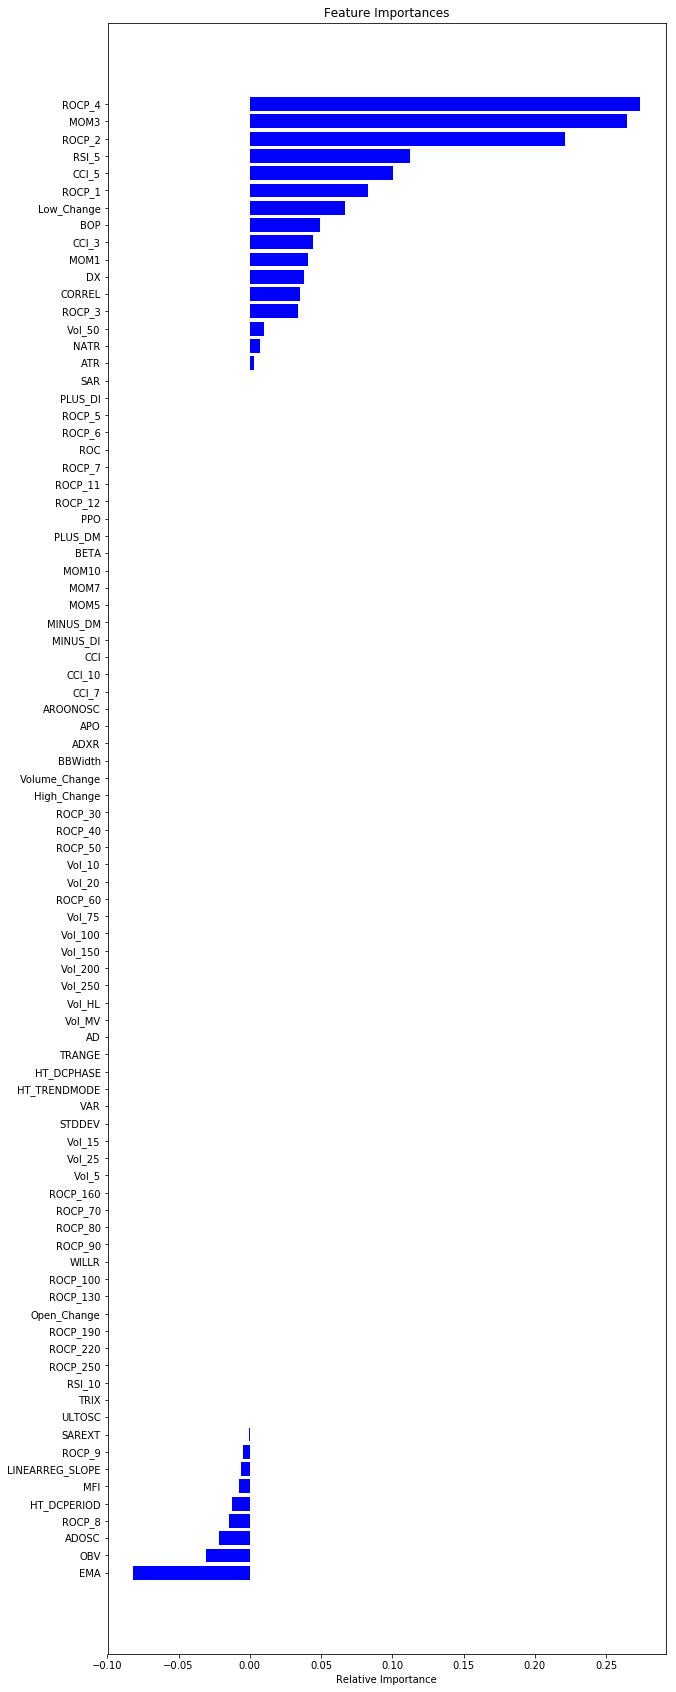

In [41]:
# Model 1 Logistic Regression
lr_2 = LogisticRegression(C=0.01,penalty='l1')
lr_2.fit(Train_DJStocks_Features,Train_DJStocks_Label2)
features = Train_DJStocks_Features.columns
importances = lr_2.coef_[0]
indices = np.argsort(importances)
print('Logistic Regression Model Trained')
plt.figure(figsize=(10,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


In [42]:
# Model 2 Support Vector Machine

#The Feature importance Feature(svc.coef_) for Support Vector Machine is only available if the the kenrnel if linear. (We have used RBF)
svc_2 = SVC(C=1,gamma=0.01,kernel='rbf',probability= True)
svc_2.fit(Train_DJStocks_Features,Train_DJStocks_Label2)
print('Support Vector Machine Model Trained')

Support Vector Machine Model Trained


Random Forest Model Trained


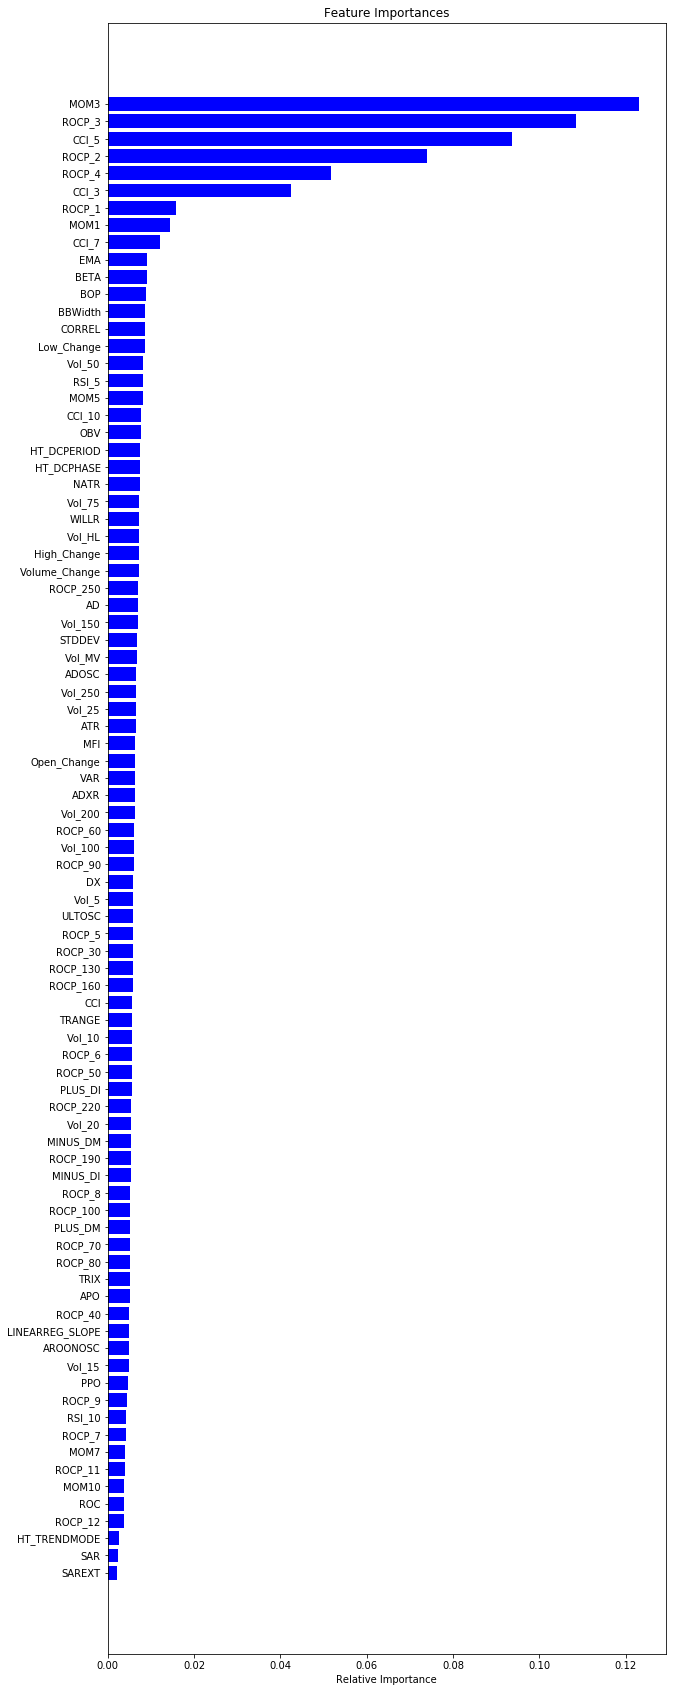

In [43]:

# Model 3 Random Forest 
rf_2 = RandomForestClassifier(criterion='gini', max_depth=10 ,max_features=30, min_samples_leaf=10,n_estimators=200)
rf_2.fit(Train_DJStocks_Features,Train_DJStocks_Label2)
print('Random Forest Model Trained')
features = Train_DJStocks_Features.columns
importances = rf_2.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# Out of Sample Predictions for Label 2

Time Period January 2017 to July 2018
371 Predictions per company

# Logistic Regression for Label 2

In [44]:
Accuracy = []
F1Score = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    
    model1 = x + '_Log'
    features = x + '_test_features'
    test_labels2 = x + '_test_labels2'    
    
    vars()[model1] = lr_2.predict(vars()[features])
    vars()[x+'_Acc'] = accuracy_score(y_true=vars()[test_labels2],y_pred=vars()[model1])
    vars()[x+'_F1'] = f1_score(y_true=vars()[test_labels2],y_pred=vars()[model1], pos_label=1,average='micro')
    print('Accuracy =',vars()[x+'_Acc'])
    print('F1 Score =',vars()[x+'_F1'])
    Accuracy.append(vars()[x+'_Acc'])
    F1Score.append(vars()[x+'_F1'])
print('\n\nAggregate Accuracy = ', np.mean(Accuracy), 'Aggregate F1 = ',np.mean(F1Score))  

-------------------------------------------------------------------
Stock = AAPL
Accuracy = 0.7493261455525606
F1 Score = 0.7493261455525606
-------------------------------------------------------------------
Stock = GOOG
Accuracy = 0.738544474393531
F1 Score = 0.7385444743935309
-------------------------------------------------------------------
Stock = MCD
Accuracy = 0.7412398921832885
F1 Score = 0.7412398921832885
-------------------------------------------------------------------
Stock = NKE
Accuracy = 0.7169811320754716
F1 Score = 0.7169811320754716
-------------------------------------------------------------------
Stock = XOM
Accuracy = 0.6981132075471698
F1 Score = 0.6981132075471698
-------------------------------------------------------------------
Stock = V
Accuracy = 0.7088948787061995
F1 Score = 0.7088948787061995
-------------------------------------------------------------------
Stock = MMM
Accuracy = 0.738544474393531
F1 Score = 0.7385444743935309
----------------------

# Support Vector Machine Predictions for Label 2

In [45]:
Accuracy = []
F1Score = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    
    model2 = x + '_SVM'
    features = x + '_test_features'
    test_labels2 = x + '_test_labels2'    
    
    vars()[model1] = svc_2.predict(vars()[features])
    vars()[x+'_Acc'] = accuracy_score(y_true=vars()[test_labels2],y_pred=vars()[model2])
    vars()[x+'_F1'] = f1_score(y_true=vars()[test_labels2],y_pred=vars()[model1], pos_label=1,average='micro')
    print('Accuracy =',vars()[x+'_Acc'])
    print('F1 Score =',vars()[x+'_F1'])
    Accuracy.append(vars()[x+'_Acc'])
    F1Score.append(vars()[x+'_F1'])
print('\n\nAggregate Accuracy = ', np.mean(Accuracy), 'Aggregate F1 = ',np.mean(F1Score))  

-------------------------------------------------------------------
Stock = AAPL
Accuracy = 0.6415094339622641
F1 Score = 0.7412398921832885
-------------------------------------------------------------------
Stock = GOOG
Accuracy = 0.6361185983827493
F1 Score = 0.7304582210242587
-------------------------------------------------------------------
Stock = MCD
Accuracy = 0.6495956873315364
F1 Score = 0.7574123989218329
-------------------------------------------------------------------
Stock = NKE
Accuracy = 0.5822102425876011
F1 Score = 0.7088948787061995
-------------------------------------------------------------------
Stock = XOM
Accuracy = 0.5040431266846361
F1 Score = 0.6900269541778976
-------------------------------------------------------------------
Stock = V
Accuracy = 0.7331536388140162
F1 Score = 0.7169811320754716
-------------------------------------------------------------------
Stock = MMM
Accuracy = 0.555256064690027
F1 Score = 0.7412398921832885
---------------------

# Random Forest Predictions for Label 2

In [46]:
Accuracy = []
F1Score = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    
    model3 = x + '_SVM'
    features = x + '_test_features'
    test_labels2 = x + '_test_labels2'    
    
    vars()[model3] = rf_2.predict(vars()[features])
    vars()[x+'_Acc'] = accuracy_score(y_true=vars()[test_labels2],y_pred=vars()[model3])
    vars()[x+'_F1'] = f1_score(y_true=vars()[test_labels2],y_pred=vars()[model3], pos_label=1,average='micro')
    print('Accuracy =',vars()[x+'_Acc'])
    print('F1 Score =',vars()[x+'_F1'])
    Accuracy.append(vars()[x+'_Acc'])
    F1Score.append(vars()[x+'_F1'])
print('\n\nAggregate Accuracy = ', np.mean(Accuracy), 'Aggregate F1 = ',np.mean(F1Score))   

-------------------------------------------------------------------
Stock = AAPL
Accuracy = 0.7466307277628033
F1 Score = 0.7466307277628033
-------------------------------------------------------------------
Stock = GOOG
Accuracy = 0.7304582210242587
F1 Score = 0.7304582210242587
-------------------------------------------------------------------
Stock = MCD
Accuracy = 0.7493261455525606
F1 Score = 0.7493261455525606
-------------------------------------------------------------------
Stock = NKE
Accuracy = 0.7115902964959568
F1 Score = 0.7115902964959567
-------------------------------------------------------------------
Stock = XOM
Accuracy = 0.6765498652291105
F1 Score = 0.6765498652291105
-------------------------------------------------------------------
Stock = V
Accuracy = 0.6846361185983828
F1 Score = 0.6846361185983828
-------------------------------------------------------------------
Stock = MMM
Accuracy = 0.7331536388140162
F1 Score = 0.7331536388140162
--------------------

## Best Prediction for each Company:
#### Identify best classifier for each company and calculate aggregate of best accuracy for each company

In [61]:
Acc = []
F1 = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    c = x + '_test_features'
    d = x + '_test_labels2'
    vars()[x+'_pred_LR'] = lr_2.predict(vars()[c])
    vars()[x+'_pred_svc'] = svc_2.predict(vars()[c])
    vars()[x+'_pred_RF'] = rf_2.predict(vars()[c])
    vars()[x+'_F1_LR'] = f1_score(vars()[d], vars()[x+'_pred_LR'], pos_label=1)
    vars()[x+'_F1_svc'] = f1_score(vars()[d], vars()[x+'_pred_svc'], pos_label=1)
    vars()[x+'_F1_RF'] = f1_score(vars()[d], vars()[x+'_pred_RF'], pos_label=1)
    vars()[x+'_Acc_LR'] = accuracy_score(vars()[d], vars()[x+'_pred_LR']) 
    vars()[x+'_Acc_svc'] = accuracy_score(vars()[d], vars()[x+'_pred_svc']) 
    vars()[x+'_Acc_RF'] = accuracy_score(vars()[d], vars()[x+'_pred_RF']) 
    best_acc = max(vars()[x+'_Acc_LR'],vars()[x+'_Acc_svc'],vars()[x+'_Acc_RF'])
    if best_acc == vars()[x+'_Acc_LR']:
        clf = 'Logistic Regression'
        f1 = vars()[x+'_F1_LR']
        Acc.append(best_acc)
        F1.append(f1)
    elif best_acc == vars()[x+'_Acc_svc']:
        clf = 'SVC'
        f1 = vars()[x+'_F1_svc']
        Acc.append(best_acc)
        F1.append(f1)
    else:
        clf = 'Random Forest'
        f1 = vars()[x+'_F1_RF']
        Acc.append(best_acc)
        F1.append(f1)
    print('Best_Accuracy = ', best_acc,'\nF1 = ', f1,'\nBest Classifier = ', clf)
print('\n\nAggregate of best accuracy = ', np.mean(Acc), 'Aggregate F1 = ',np.mean(F1))

-------------------------------------------------------------------
Stock = AAPL
Best_Accuracy =  0.7493261455525606 
F1 =  0.8058455114822547 
Best Classifier =  Logistic Regression
-------------------------------------------------------------------
Stock = GOOG
Best_Accuracy =  0.738544474393531 
F1 =  0.7974947807933194 
Best Classifier =  Logistic Regression
-------------------------------------------------------------------
Stock = MCD
Best_Accuracy =  0.7574123989218329 
F1 =  0.8185483870967741 
Best Classifier =  SVC
-------------------------------------------------------------------
Stock = NKE
Best_Accuracy =  0.7169811320754716 
F1 =  0.7661469933184856 
Best Classifier =  Logistic Regression
-------------------------------------------------------------------
Stock = XOM
Best_Accuracy =  0.6981132075471698 
F1 =  0.7358490566037736 
Best Classifier =  Logistic Regression
-------------------------------------------------------------------
Stock = V
Best_Accuracy =  0.71698113

# Label 3 - 5 Day Moving Average

# Label 3 Model 1 Logistic Regression

In [47]:
# Logistic Regression

tic =time.time()

best_score_acc3=-1
best_c_acc3=None
best_penalty_acc3=None

best_f1_score3 = -1
best_c_f13 = None
best_penalty_f13=None

#best_auc_score = -1
#best_c_auc = None
#best_penalty_auc = None


for c in [0.001,0.01,0.1,1,10,100]:
    for pen in ['l1','l2']:
        for i in range(0,8000,2000):    
            #Preparing Data for custom K-Fold Corass Vlidation
            x_train = Train_DJStocks_Features[i:i+8000]
            y_train = Train_DJStocks_Label3[i:i+8000]
                                           
            
            # Validation Set
            x_test =  Train_DJStocks_Features[i+8000: i+10000]
            y_test =  Train_DJStocks_Label3[i+8000: i+10000]
            
            
            #Model Training
            lr3 = LogisticRegression(penalty=pen,C= c)
            lr3.fit(x_train, y_train)
            lr3.predict(x_train)
            y_test_predict =lr3.predict(x_test)
            
            
            # Taking 2 Evaluation Metrics : Accuracy Score and F1 Score
            score = accuracy_score(y_true=y_test,y_pred=y_test_predict)
            f1score = f1_score(y_true=y_test,y_pred=y_test_predict,average='micro')
            #aucscore=roc_auc_score(y_true=y_test,y_score=y_test_predict)
            
            if score>best_score_acc3:
                best_score_acc3=score
                best_c_acc3=c
                best_penalty_acc3=pen
            if f1score>best_f1_score:
                best_f1_score3 = f1score
                best_c_f13=c
                best_penalty_f13=pen
            #if aucscore>best_auc_score:
            #    best_auc_score = aucscore
            #    best_c_auc = c
            #    best_penalty_auc = pen 
                

                
print('Best Logistic Regression Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc3)
print('with value of C: ',best_c_acc3)
print('and penalty: ',best_penalty_acc3)

print('\nBest Logistic Regression Model according to F1 score:')
print('Best F1 Score:', best_f1_score3)
print('with value of C: ',best_c_f13)
print('and penalty: ',best_penalty_f13)

#print('\nBest Logistic Regression Model according to AUC score:')
#print('Best AUC Score:', best_auc_score)
#print('with value of C: ',best_c_auc)
#print('and penalty: ',best_penalty_auc)

toc =time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')

Best Logistic Regression Model according to Accuracy score:
Best Accucarcy Score: 0.7295
with value of C:  0.01
and penalty:  l2

Best Logistic Regression Model according to F1 score:
Best F1 Score: 0.728
with value of C:  100
and penalty:  l2


Time taken to Train the model:  0.8388481656710307  minutes


# Label 3 Model 2 - Support Vector Machine

In [48]:
# Support vector Machine

tic =time.time()
best_score_acc3=-1
best_c_acc3=None
best_gamma_acc3=None

best_f1_score3 = -1
best_c_f13 = None
best_gamma_f13=None




for c in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        for i in range(0,8000,2000):    
            #Preparing Data for custom K-Fold Corass Vlidation
            x_train = Train_DJStocks_Features[i:i+4000]
            y_train = Train_DJStocks_Label3[i:i+4000]
            
            # Validation Set
            x_test =  Train_DJStocks_Features[i+8000: i+10000]
            y_test =  Train_DJStocks_Label3[i+8000: i+10000]
            
            svc3=SVC(C=c,gamma=gamma,kernel='rbf')
            svc3.fit(X=x_train,y=y_train)
            y_predict_train = svc3.predict(x_train)
            y_predict_test= svc3.predict(x_test)
            
            # Evaluation Metrics
            score = accuracy_score(y_true=y_test,y_pred=y_predict_test)
            f1score = f1_score(y_true=y_test,y_pred=y_predict_test,average='micro')
            
            if score>best_score_acc3:
                best_score_acc3=score
                best_c_acc3 = c
                best_gamma_acc3 = gamma
            if f1score>best_f1_score3:
                best_f1_score3=f1score
                best_c_f13 = c
                best_gamma_f13 = gamma
            
                
print('Best SVM Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc3)
print('with value of C: ',best_c_acc3)
print('and penalty: ',best_gamma_acc3)

print('\nBest SVM Model according to F1 score:')
print('Best F1 Score:', best_f1_score3)
print('with value of C: ',best_c_f13)
print('and penalty: ',best_gamma_f13)           
            
            
            
toc = time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')

Best SVM Model according to Accuracy score:
Best Accucarcy Score: 0.717
with value of C:  10
and penalty:  0.001

Best SVM Model according to F1 score:
Best F1 Score: 0.7169999999999999
with value of C:  10
and penalty:  0.001


Time taken to Train the model:  13.386968040466309  minutes


## Label 3 Model 3 - Random Forest


In [52]:
#RandomForest

tic =time.time()
best_score_acc3=-1
best_criterion_acc3=None
best_maxdepth_acc3=None
best_maxfeatures_acc3=None
best_minsampleleaf_acc3=None
best_nestimators_acc3=None

best_score_f13=-1
best_criterion_f13=None
best_maxdepth_f13=None
best_maxfeatures_f13=None
best_minsampleleaf_f13=None
best_nestimators_f13=None

n_estimators = [40,100,200]
criterion = ["entropy","gini"]
max_features = ["sqrt","log2",30,50]
max_depth = [10,15,20,None]
min_samples_leaf = [1,5,10]
                        
                        
for est in n_estimators:
    for crit in criterion:
        for mf in max_features:
            for md in max_depth:
                for samples in min_samples_leaf:
                    for i in range(0,8000,2000):    
                        #Preparing Data for custom K-Fold Corass Vlidation
                        x_train = Train_DJStocks_Features[i:i+8000]
                        y_train = Train_DJStocks_Label3[i:i+8000]
            
                        # Validation Set
                        x_test =  Train_DJStocks_Features[i+8000: i+10000]
                        y_test =  Train_DJStocks_Label3[i+8000: i+10000]
                        
                        rf3 = RandomForestClassifier(criterion=crit, max_depth=md ,max_features=mf, min_samples_leaf=samples,n_estimators=est)
                        rf3.fit(X=x_train,y=y_train)
                        y_predict_train = rf3.predict(x_train)
                        y_predict_test= rf3.predict(x_test)
                        
                        
                        # Evaluation Metrics
                        score = accuracy_score(y_true=y_test,y_pred=y_predict_test)
                        f1score = f1_score(y_true=y_test,y_pred=y_predict_test,average='micro')

                        if score>best_score_acc3:
                            best_score_acc3=score
                            best_estimator_acc3=est
                            best_criterion_acc3 = crit
                            best_maxdepth_acc3 = md
                            best_maxfeatures_acc3 = mf
                            best_minsampleleaf_acc3 = samples
                            
                        if f1score>best_f1_score3:
                            best_score_f13=score
                            best_estimator_f13=est
                            best_criterion_f13 = crit
                            best_maxdepth_f13 = md
                            best_maxfeatures_f13 = mf
                            best_minsampleleaf_f13 = samples
                            
                
print('Best Random Forest Model according to Accuracy score:')
print('Best Accucarcy Score:',best_score_acc3)
print('Optimal No. of Estimators: ',best_estimator_acc3)
print('and Best Criterion: ',best_criterion_acc3)
print('Optimal Max Depth: ',best_maxdepth_acc3)
print('Optimal Max Features: ',best_maxfeatures_acc3)
print('Optimal Min Sample leaf: ',best_minsampleleaf_acc3)


print('\nBest Random Forest Model according to F1 score:')
print('Best Accucarcy Score:',best_score_f13)
print('Optimal No. of Estimators: ',best_estimator_f13)
print('and Best Criterion: ',best_criterion_f13)
print('Optimal Max Depth: ',best_maxdepth_f13)
print('Optimal Max Features: ',best_maxfeatures_f13)
print('Optimal Min Sample leaf: ',best_minsampleleaf_f13)
            
toc = time.time()
print('\n\nTime taken to Train the model: ' , (toc-tic)/60, ' minutes')
                        
                        

Best Random Forest Model according to Accuracy score:
Best Accucarcy Score: 0.7355
Optimal No. of Estimators:  40
and Best Criterion:  gini
Optimal Max Depth:  20
Optimal Max Features:  50
Optimal Min Sample leaf:  5

Best Random Forest Model according to F1 score:
Best Accucarcy Score: 0.7255
Optimal No. of Estimators:  200
and Best Criterion:  gini
Optimal Max Depth:  None
Optimal Max Features:  50
Optimal Min Sample leaf:  10


Time taken to Train the model:  291.5651753783226  minutes


# Using the best Hyper-Parameters for each model and Training them
This will also enable us to get Feature Importance 

Logistic Regression Model Trained


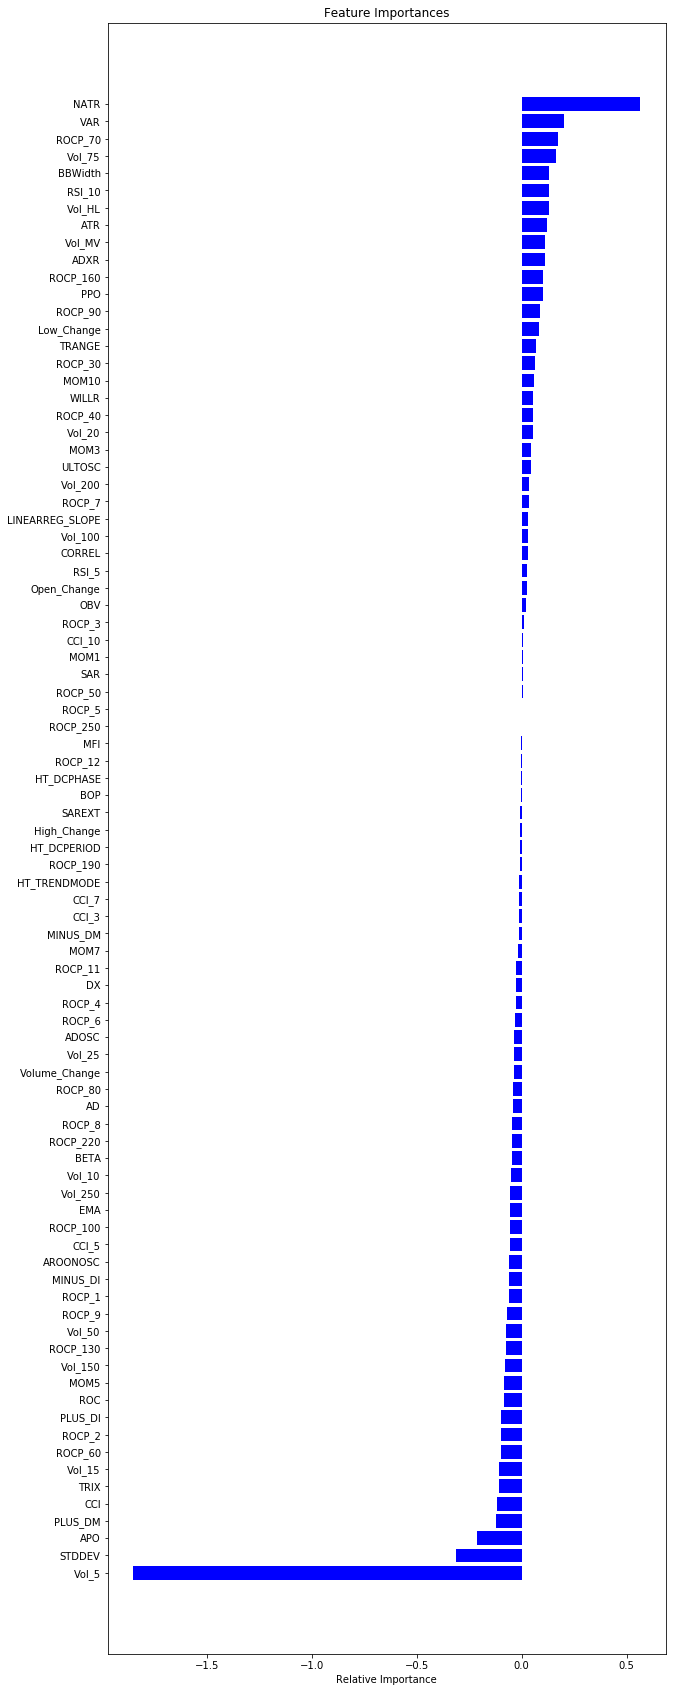

In [49]:
# Model 1 Logistic Regression
lr_3 = LogisticRegression(C=0.01,penalty='l2')
lr_3.fit(Train_DJStocks_Features,Train_DJStocks_Label3)
features = Train_DJStocks_Features.columns
importances = lr_3.coef_[0]
indices = np.argsort(importances)
print('Logistic Regression Model Trained')
plt.figure(figsize=(10,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [51]:
# Model 2 Support Vector Machine

#The Feature importance Feature(svc.coef_) for Support Vector Machine is only available if the the kenrnel if linear. (We have used RBF)
svc_3 = SVC(C=10,gamma=0.001,kernel='rbf',probability=True)
svc_3.fit(Train_DJStocks_Features,Train_DJStocks_Label3)
print('Support Vector Machine Model Trained')

Support Vector Machine Model Trained


Random Forest Model Trained


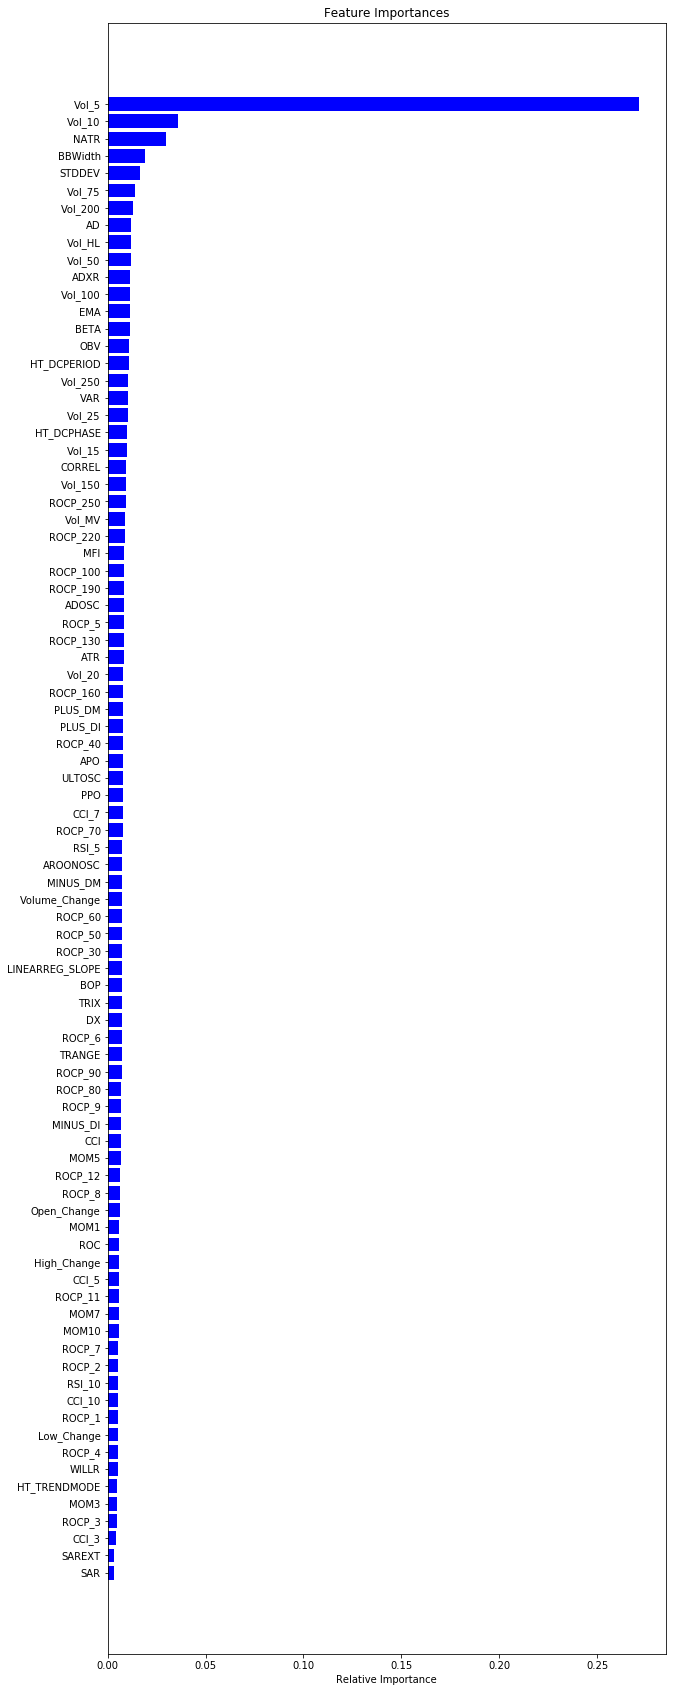

In [52]:
# Model 3 Random Forest 
rf_3 = RandomForestClassifier(criterion='gini', max_depth=20 ,max_features=50, min_samples_leaf=5,n_estimators=40)
rf_3.fit(Train_DJStocks_Features,Train_DJStocks_Label3)
print('Random Forest Model Trained')
features = Train_DJStocks_Features.columns
importances = rf_3.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# Out of Sample Predictions for Label 3

Time Period January 2017 to July 2018
371 predictions per company



# Logistic Regression Predictions for Label 3 

In [53]:
Accuracy = []
F1Score = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    
    model1 = x + '_Log'
    features = x + '_test_features'
    test_labels3 = x + '_test_labels3'    
    
    vars()[model1] = lr_3.predict(vars()[features])
    vars()[x+'_Acc'] = accuracy_score(y_true=vars()[test_labels3],y_pred=vars()[model1])
    vars()[x+'_F1'] = f1_score(y_true=vars()[test_labels3],y_pred=vars()[model1], pos_label=1,average='micro')
    print('Accuracy =',vars()[x+'_Acc'])
    print('F1 Score =',vars()[x+'_F1'])
    Accuracy.append(vars()[x+'_Acc'])
    F1Score.append(vars()[x+'_F1'])
print('\n\nAggregate Accuracy = ', np.mean(Accuracy), 'Aggregate F1 = ',np.mean(F1Score))    

-------------------------------------------------------------------
Stock = AAPL
Accuracy = 0.738544474393531
F1 Score = 0.7385444743935309
-------------------------------------------------------------------
Stock = GOOG
Accuracy = 0.7115902964959568
F1 Score = 0.7115902964959567
-------------------------------------------------------------------
Stock = MCD
Accuracy = 0.7115902964959568
F1 Score = 0.7115902964959567
-------------------------------------------------------------------
Stock = NKE
Accuracy = 0.692722371967655
F1 Score = 0.692722371967655
-------------------------------------------------------------------
Stock = XOM
Accuracy = 0.7412398921832885
F1 Score = 0.7412398921832885
-------------------------------------------------------------------
Stock = V
Accuracy = 0.6873315363881402
F1 Score = 0.6873315363881402
-------------------------------------------------------------------
Stock = MMM
Accuracy = 0.7196765498652291
F1 Score = 0.7196765498652291
-----------------------

# Support Vector Predictions for Label 3

In [54]:
Accuracy = []
F1Score = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    
    model2 = x + '_SVM'
    features = x + '_test_features'
    test_labels3 = x + '_test_labels3'    
    
    vars()[model2] = svc_3.predict(vars()[features])
    vars()[x+'_Acc'] = accuracy_score(y_true=vars()[test_labels3],y_pred=vars()[model2])
    vars()[x+'_F1'] = f1_score(y_true=vars()[test_labels3],y_pred=vars()[model2], pos_label=1,average='micro')
    print('Accuracy =',vars()[x+'_Acc'])
    print('F1 Score =',vars()[x+'_F1'])
    Accuracy.append(vars()[x+'_Acc'])
    F1Score.append(vars()[x+'_F1'])
print('\n\nAggregate Accuracy = ', np.mean(Accuracy), 'Aggregate F1 = ',np.mean(F1Score))   

-------------------------------------------------------------------
Stock = AAPL
Accuracy = 0.7250673854447439
F1 Score = 0.725067385444744
-------------------------------------------------------------------
Stock = GOOG
Accuracy = 0.7035040431266847
F1 Score = 0.7035040431266847
-------------------------------------------------------------------
Stock = MCD
Accuracy = 0.7035040431266847
F1 Score = 0.7035040431266847
-------------------------------------------------------------------
Stock = NKE
Accuracy = 0.6873315363881402
F1 Score = 0.6873315363881402
-------------------------------------------------------------------
Stock = XOM
Accuracy = 0.7169811320754716
F1 Score = 0.7169811320754716
-------------------------------------------------------------------
Stock = V
Accuracy = 0.706199460916442
F1 Score = 0.706199460916442
-------------------------------------------------------------------
Stock = MMM
Accuracy = 0.7088948787061995
F1 Score = 0.7088948787061995
-----------------------

# Random Forest Predictions for Label 3

In [55]:
Accuracy = []
F1Score = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    
    model3 = x + '_RF'
    features = x + '_test_features'
    test_labels3 = x + '_test_labels3'    
    
    vars()[model3] = lr_3.predict(vars()[features])
    vars()[x+'_Acc'] = accuracy_score(y_true=vars()[test_labels3],y_pred=vars()[model3])
    vars()[x+'_F1'] = f1_score(y_true=vars()[test_labels3],y_pred=vars()[model3], pos_label=1,average='micro')
    print('Accuracy =',vars()[x+'_Acc'])
    print('F1 Score =',vars()[x+'_F1'])
    Accuracy.append(vars()[x+'_Acc'])
    F1Score.append(vars()[x+'_F1'])
print('\n\nAggregate Accuracy = ', np.mean(Accuracy), 'Aggregate F1 = ',np.mean(F1Score))   

-------------------------------------------------------------------
Stock = AAPL
Accuracy = 0.738544474393531
F1 Score = 0.7385444743935309
-------------------------------------------------------------------
Stock = GOOG
Accuracy = 0.7115902964959568
F1 Score = 0.7115902964959567
-------------------------------------------------------------------
Stock = MCD
Accuracy = 0.7115902964959568
F1 Score = 0.7115902964959567
-------------------------------------------------------------------
Stock = NKE
Accuracy = 0.692722371967655
F1 Score = 0.692722371967655
-------------------------------------------------------------------
Stock = XOM
Accuracy = 0.7412398921832885
F1 Score = 0.7412398921832885
-------------------------------------------------------------------
Stock = V
Accuracy = 0.6873315363881402
F1 Score = 0.6873315363881402
-------------------------------------------------------------------
Stock = MMM
Accuracy = 0.7196765498652291
F1 Score = 0.7196765498652291
-----------------------

In [56]:
Acc = []
F1 = []
for x in tickers:
    print('-------------------------------------------------------------------')
    print('Stock =',x)
    c = x + '_test_features'
    d = x + '_test_labels3'
    vars()[x+'_pred_LR'] = lr_3.predict(vars()[c])
    vars()[x+'_pred_svc'] = svc_3.predict(vars()[c])
    vars()[x+'_pred_RF'] = rf_3.predict(vars()[c])
    vars()[x+'_F1_LR'] = f1_score(vars()[d], vars()[x+'_pred_LR'], pos_label=1)
    vars()[x+'_F1_svc'] = f1_score(vars()[d], vars()[x+'_pred_svc'], pos_label=1)
    vars()[x+'_F1_RF'] = f1_score(vars()[d], vars()[x+'_pred_RF'], pos_label=1)
    vars()[x+'_Acc_LR'] = accuracy_score(vars()[d], vars()[x+'_pred_LR']) 
    vars()[x+'_Acc_svc'] = accuracy_score(vars()[d], vars()[x+'_pred_svc']) 
    vars()[x+'_Acc_RF'] = accuracy_score(vars()[d], vars()[x+'_pred_RF']) 
    best_acc = max(vars()[x+'_Acc_LR'],vars()[x+'_Acc_svc'],vars()[x+'_Acc_RF'])
    if best_acc == vars()[x+'_Acc_LR']:
        clf = 'Logistic Regression'
        f1 = vars()[x+'_F1_LR']
        Acc.append(best_acc)
        F1.append(f1)
    elif best_acc == vars()[x+'_Acc_svc']:
        clf = 'SVC'
        f1 = vars()[x+'_F1_svc']
        Acc.append(best_acc)
        F1.append(f1)
    else:
        clf = 'Random Forest'
        f1 = vars()[x+'_F1_RF']
        Acc.append(best_acc)
        F1.append(f1)
    print('Best_Accuracy = ', best_acc,'\nF1 = ', f1,'\nBest Classifier = ', clf)
print('\n\nAggregate of best accuracy = ', np.mean(Acc), 'Aggregate F1 = ',np.mean(F1))

-------------------------------------------------------------------
Stock = AAPL
Best_Accuracy =  0.7547169811320755 
F1 =  0.7586206896551724 
Best Classifier =  Random Forest
-------------------------------------------------------------------
Stock = GOOG
Best_Accuracy =  0.7115902964959568 
F1 =  0.7191601049868767 
Best Classifier =  Logistic Regression
-------------------------------------------------------------------
Stock = MCD
Best_Accuracy =  0.7412398921832885 
F1 =  0.7551020408163265 
Best Classifier =  Random Forest
-------------------------------------------------------------------
Stock = NKE
Best_Accuracy =  0.7250673854447439 
F1 =  0.7301587301587302 
Best Classifier =  Random Forest
-------------------------------------------------------------------
Stock = XOM
Best_Accuracy =  0.7412398921832885 
F1 =  0.75 
Best Classifier =  Logistic Regression
-------------------------------------------------------------------
Stock = V
Best_Accuracy =  0.706199460916442 
F1 =  

# Trading Strategy

### 1-day Long only (Using all 3 Labels)  Using Logistic Regression

- Start with initial amount = 1000000
- Predict next day returns using Logistic Regression, SVM and Random Forest.
- Buy the stocks for which the classifier predicts positive returns, with initial amount invested equally in all stocks bought
- Next day, close the initial position, and then invest the new portfolio value in new stocks predicted by the classifier
- Repeat this to generate cumulative returns for period of our testing set

### Buy when Label 1 = 1, Label 2 = 1, Label 3 = 1

In [57]:
# function to calculate updated value of investment (holding period=1day)
def Return(stock,day,investment):
    return investment*(1+stock['ROCP_1'][day+1])

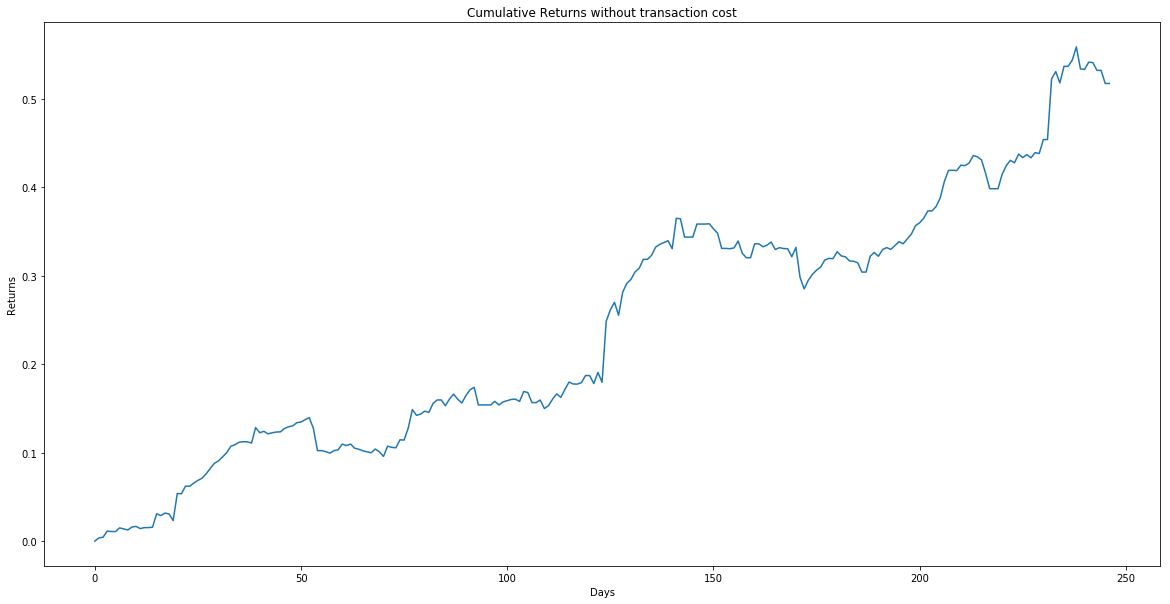

One Year cumulative return without transaction cost = 0.5171084452403332
Standard deviation of returns = 0.1262495376523799
Sharpe ratio without transaction cost = 3.957309108061634


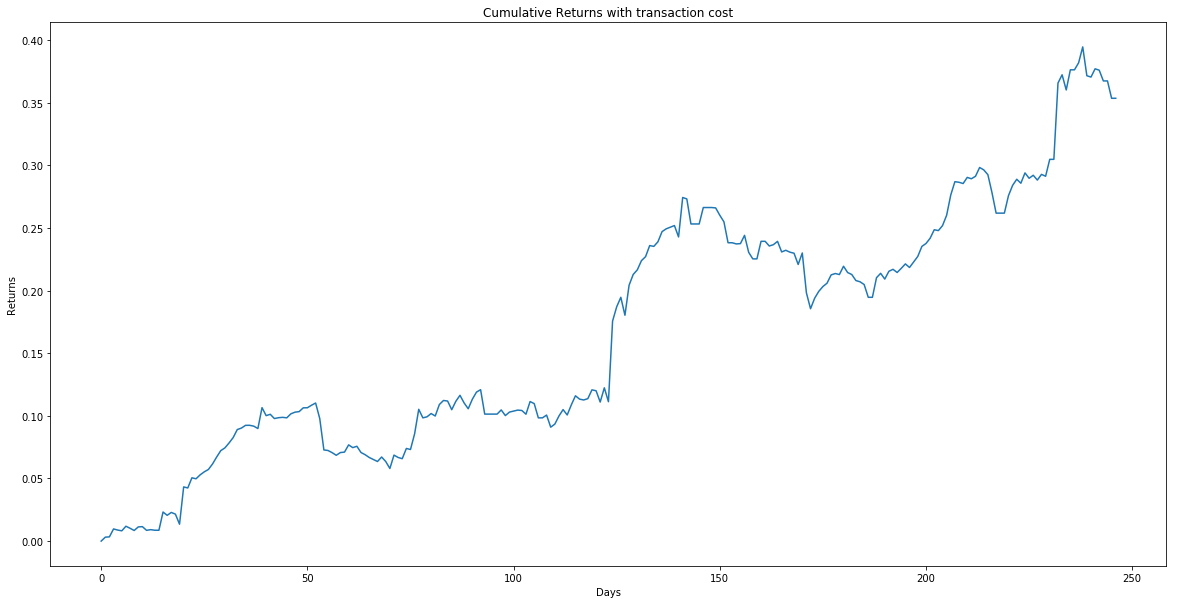

One Year cumulative return with transaction cost = 0.3536134888034097
Standard deviation of returns = 0.12607203025659822
Sharpe ratio with transaction cost = 2.666043277952356
time:  8.43372654914856


In [58]:
tic = time.time()
Initial_Capital = 1000000
Daily_Portfolio_Value = []
Daily_Portfolio_Value_trc = []
Daily_Portfolio_Value.append(Initial_Capital)
Daily_Portfolio_Value_trc.append(Initial_Capital)
Daily_Returns = []
Daily_Returns_trc = []
Daily_Returns.append(0)
Daily_Returns_trc.append(0)
Cumulative_Returns = []
Cumulative_Returns_trc = []

transaction_cost = 0.0005  #Assume 2.5bp one way
Rf = 0.0175                # Current Federal Funds Rate = 1.75%

for day in range(0,246,1):
    Pred_Label1 = []
    Pred_Label2 = []
    Pred_Label3 = []
    Predproba_Label1 = []
    Predproba_Label2 = []
    Predproba_Label3 = []
    for x in tickers:
        c = x + '_test_features'
        Pred_Label1.append(lr_1.predict(vars()[c][day:day+1])[0])
        Pred_Label2.append(lr_2.predict(vars()[c][day:day+1])[0])
        Pred_Label3.append(lr_3.predict(vars()[c][day:day+1])[0])
        Predproba_Label1.append(lr_1.predict_proba(vars()[c][day:day+1])[0][1])
        Predproba_Label2.append(lr_2.predict_proba(vars()[c][day:day+1])[0][1])
        Predproba_Label3.append(lr_3.predict_proba(vars()[c][day:day+1])[0][1])
    d = {'Company': tickers, 'Label1 Prediction': Pred_Label1, 'Label1 Probability of +1': Predproba_Label1,
        'Label2 Prediction': Pred_Label2, 'Label2 Probability of +1': Predproba_Label2,
        'Label3 Prediction': Pred_Label3, 'Label3 Probability of +1': Predproba_Label3,}
    df = pd.DataFrame(data=d)
    Buy = df[(df['Label1 Prediction']==1) & (df['Label2 Prediction']==1) & 
               (df['Label3 Prediction']==1)]['Company'].reset_index(drop=True)
    if len(Buy) > 0:
        inv_amount = Daily_Portfolio_Value[day]/len(Buy)
        inv_amount_trc = Daily_Portfolio_Value_trc[day]/len(Buy)
        Portfolio_updated = 0
        Portfolio_updated_trc = 0
        
        for i in range(0,len(Buy),1):
            Portfolio_updated += Return(vars()[Buy[i]]['2017-01-02':],day,inv_amount)
            Portfolio_updated_trc += (1-transaction_cost)*Return(vars()[Buy[i]]['2017-01-02':],day,inv_amount_trc)
        Daily_Returns.append((Portfolio_updated/Daily_Portfolio_Value[day])-1)
        Daily_Returns_trc.append((Portfolio_updated_trc/Daily_Portfolio_Value_trc[day])-1)
        Daily_Portfolio_Value.append(Portfolio_updated)
        Daily_Portfolio_Value_trc.append(Portfolio_updated_trc)
    else:
        Daily_Portfolio_Value.append(Daily_Portfolio_Value[day])
        Daily_Portfolio_Value_trc.append(Daily_Portfolio_Value_trc[day])
        Daily_Returns.append(0)
        Daily_Returns_trc.append(0)

Cumulative_Returns = [(x / 1000000)-1 for x in Daily_Portfolio_Value]
Cumulative_Returns_trc = [(x / 1000000)-1 for x in Daily_Portfolio_Value_trc]    

plt.figure(figsize=(20,10))
plt.title('Cumulative Returns without transaction cost')
plt.plot(Cumulative_Returns)
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

print('One Year cumulative return without transaction cost =',Cumulative_Returns[-1])
print('Standard deviation of returns =',np.std(Daily_Returns)*np.sqrt(252))
print('Sharpe ratio without transaction cost =',(Cumulative_Returns[-1]-Rf)/(np.std(Daily_Returns)*np.sqrt(252)))

plt.figure(figsize=(20,10))
plt.title('Cumulative Returns with transaction cost')
plt.plot(Cumulative_Returns_trc)
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

print('One Year cumulative return with transaction cost =',Cumulative_Returns_trc[-1])
print('Standard deviation of returns =',np.std(Daily_Returns_trc)*np.sqrt(252))
print('Sharpe ratio with transaction cost =',(Cumulative_Returns_trc[-1]-Rf)/(np.std(Daily_Returns_trc)*np.sqrt(252)))
toc = time.time()
print('time: ', toc-tic)

#### 1-day Long only (Using all 3 Labels)  Using Support Vector Machine

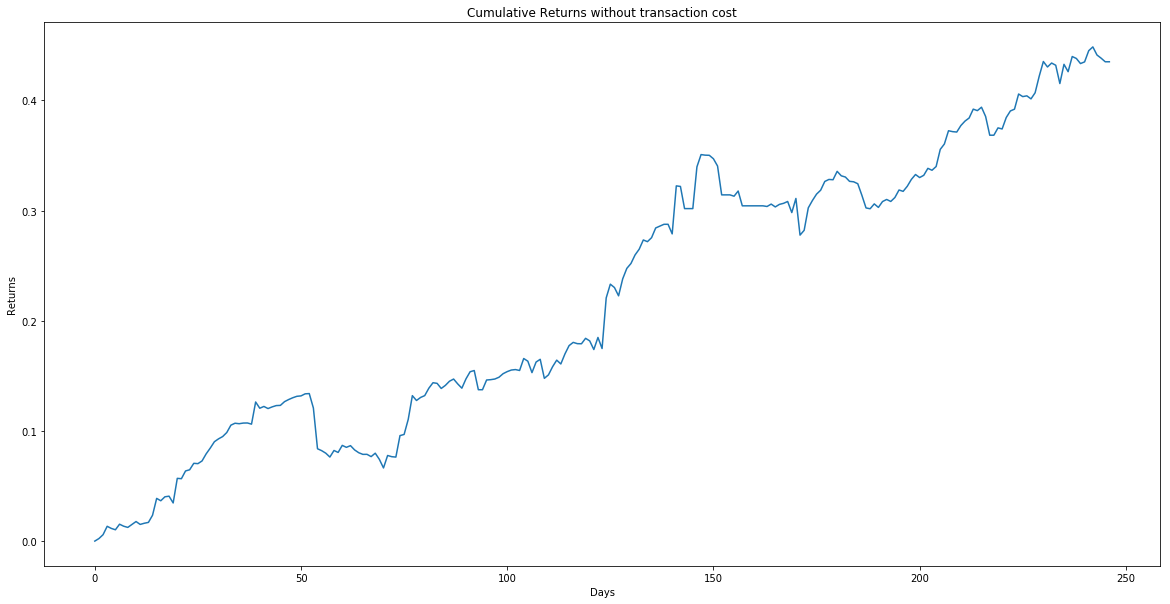

One Year cumulative return without transaction cost = 0.43501605448439773
Standard deviation of returns = 0.11380144923860272
Sharpe ratio without transaction cost = 3.668811401593044


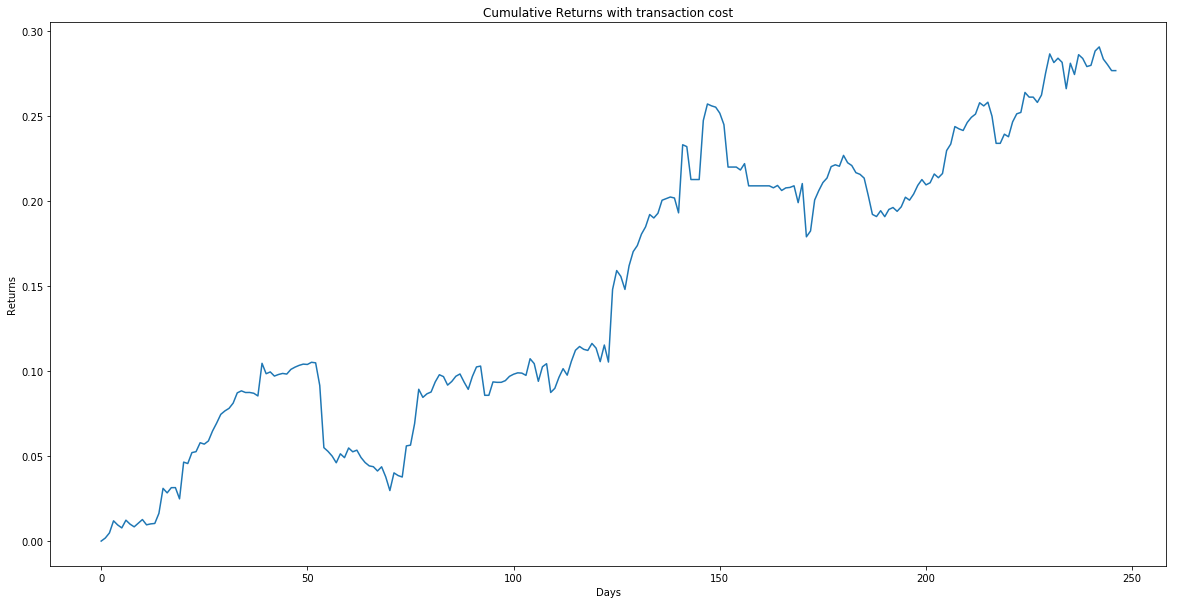

One Year cumulative return with transaction cost = 0.276531682472106
Standard deviation of returns = 0.11367156941754844
Sharpe ratio with transaction cost = 2.278772817155431
time:  63.10238575935364


In [59]:
tic = time.time()
Initial_Capital = 1000000
Daily_Portfolio_Value = []
Daily_Portfolio_Value_trc = []
Daily_Portfolio_Value.append(Initial_Capital)
Daily_Portfolio_Value_trc.append(Initial_Capital)
Daily_Returns = []
Daily_Returns_trc = []
Daily_Returns.append(0)
Daily_Returns_trc.append(0)
Cumulative_Returns = []
Cumulative_Returns_trc = []

transaction_cost = 0.0005  #Assume 2.5bp one way
Rf = 0.0175                # Current Federal Funds Rate = 1.75%

for day in range(0,246,1):
    Pred_Label1 = []
    Pred_Label2 = []
    Pred_Label3 = []
    Predproba_Label1 = []
    Predproba_Label2 = []
    Predproba_Label3 = []
    for x in tickers:
        c = x + '_test_features'
        Pred_Label1.append(svc_1.predict(vars()[c][day:day+1])[0])
        Pred_Label2.append(svc_2.predict(vars()[c][day:day+1])[0])
        Pred_Label3.append(svc_3.predict(vars()[c][day:day+1])[0])
        Predproba_Label1.append(svc_1.predict_proba(vars()[c][day:day+1])[0][1])
        Predproba_Label2.append(svc_2.predict_proba(vars()[c][day:day+1])[0][1])
        Predproba_Label3.append(svc_3.predict_proba(vars()[c][day:day+1])[0][1])
    d = {'Company': tickers, 'Label1 Prediction': Pred_Label1, 'Label1 Probability of +1': Predproba_Label1,
        'Label2 Prediction': Pred_Label2, 'Label2 Probability of +1': Predproba_Label2,
        'Label3 Prediction': Pred_Label3, 'Label3 Probability of +1': Predproba_Label3,}
    df = pd.DataFrame(data=d)
    Buy = df[(df['Label1 Prediction']==1) & (df['Label2 Prediction']==1) & 
               (df['Label3 Prediction']==1)]['Company'].reset_index(drop=True)
    if len(Buy) > 0:
        inv_amount = Daily_Portfolio_Value[day]/len(Buy)
        inv_amount_trc = Daily_Portfolio_Value_trc[day]/len(Buy)
        Portfolio_updated = 0
        Portfolio_updated_trc = 0
        
        for i in range(0,len(Buy),1):
            Portfolio_updated += Return(vars()[Buy[i]]['2017-01-02':],day,inv_amount)
            Portfolio_updated_trc += (1-transaction_cost)*Return(vars()[Buy[i]]['2017-01-02':],day,inv_amount_trc)
        Daily_Returns.append((Portfolio_updated/Daily_Portfolio_Value[day])-1)
        Daily_Returns_trc.append((Portfolio_updated_trc/Daily_Portfolio_Value_trc[day])-1)
        Daily_Portfolio_Value.append(Portfolio_updated)
        Daily_Portfolio_Value_trc.append(Portfolio_updated_trc)
    else:
        Daily_Portfolio_Value.append(Daily_Portfolio_Value[day])
        Daily_Portfolio_Value_trc.append(Daily_Portfolio_Value_trc[day])
        Daily_Returns.append(0)
        Daily_Returns_trc.append(0)

Cumulative_Returns = [(x / 1000000)-1 for x in Daily_Portfolio_Value]
Cumulative_Returns_trc = [(x / 1000000)-1 for x in Daily_Portfolio_Value_trc]    

plt.figure(figsize=(20,10))
plt.title('Cumulative Returns without transaction cost')
plt.plot(Cumulative_Returns)
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

print('One Year cumulative return without transaction cost =',Cumulative_Returns[-1])
print('Standard deviation of returns =',np.std(Daily_Returns)*np.sqrt(252))
print('Sharpe ratio without transaction cost =',(Cumulative_Returns[-1]-Rf)/(np.std(Daily_Returns)*np.sqrt(252)))

plt.figure(figsize=(20,10))
plt.title('Cumulative Returns with transaction cost')
plt.plot(Cumulative_Returns_trc)
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

print('One Year cumulative return with transaction cost =',Cumulative_Returns_trc[-1])
print('Standard deviation of returns =',np.std(Daily_Returns_trc)*np.sqrt(252))
print('Sharpe ratio with transaction cost =',(Cumulative_Returns_trc[-1]-Rf)/(np.std(Daily_Returns_trc)*np.sqrt(252)))
toc = time.time()
print('time: ', toc-tic)

#### 1-day Long only (Using all 3 Labels)  Using Random Forest


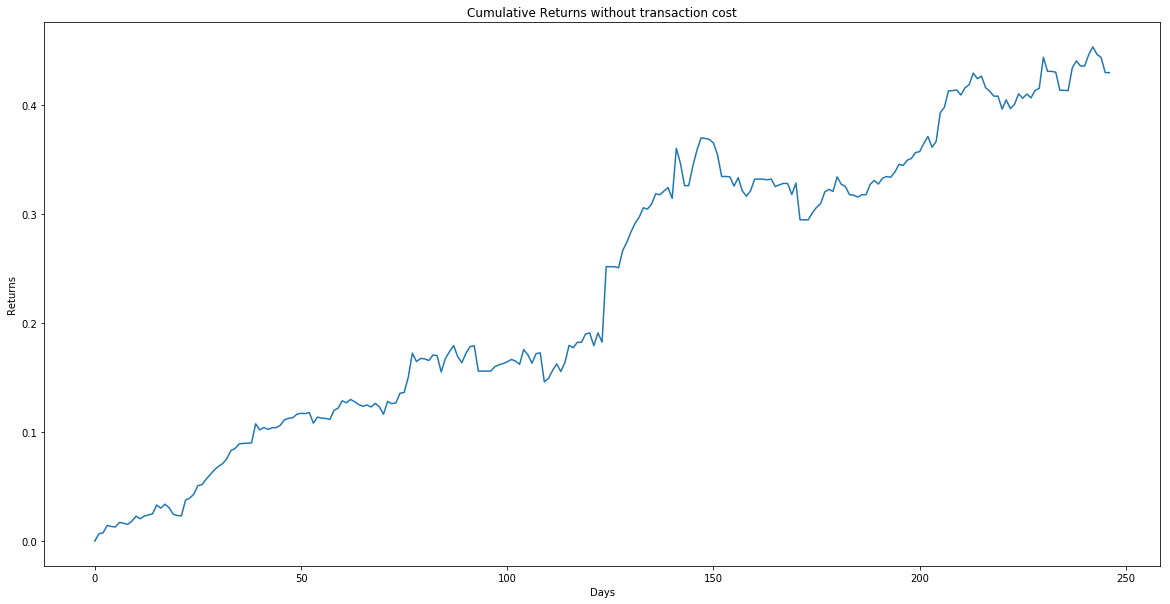

One Year cumulative return without transaction cost = 0.4292596521376164
Standard deviation of returns = 0.11767722177704787
Sharpe ratio without transaction cost = 3.49905993632089


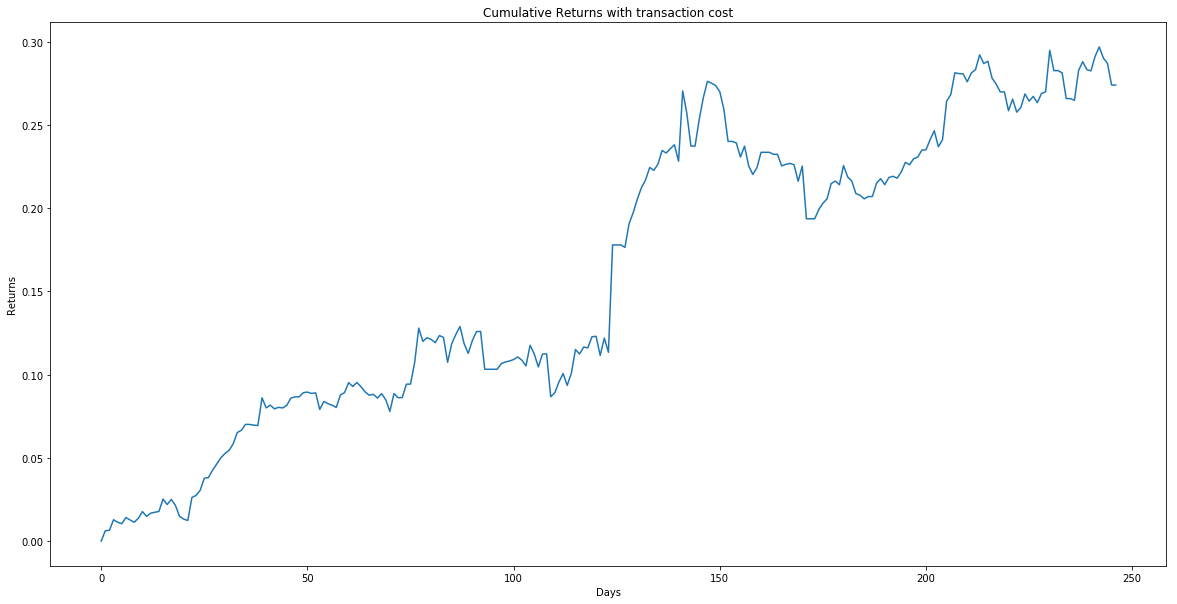

One Year cumulative return with transaction cost = 0.27395702576285785
Standard deviation of returns = 0.11752687087507316
Sharpe ratio with transaction cost = 2.1821139612868827
time:  252.55995678901672


In [60]:
tic = time.time()
Initial_Capital = 1000000
Daily_Portfolio_Value = []
Daily_Portfolio_Value_trc = []
Daily_Portfolio_Value.append(Initial_Capital)
Daily_Portfolio_Value_trc.append(Initial_Capital)
Daily_Returns = []
Daily_Returns_trc = []
Daily_Returns.append(0)
Daily_Returns_trc.append(0)
Cumulative_Returns = []
Cumulative_Returns_trc = []

transaction_cost = 0.0005  #Assume 2.5bp one way
Rf = 0.0175                # Current Federal Funds Rate = 1.75%

for day in range(0,246,1):
    Pred_Label1 = []
    Pred_Label2 = []
    Pred_Label3 = []
    Predproba_Label1 = []
    Predproba_Label2 = []
    Predproba_Label3 = []
    for x in tickers:
        c = x + '_test_features'
        Pred_Label1.append(rf_1.predict(vars()[c][day:day+1])[0])
        Pred_Label2.append(rf_2.predict(vars()[c][day:day+1])[0])
        Pred_Label3.append(rf_3.predict(vars()[c][day:day+1])[0])
        Predproba_Label1.append(rf_1.predict_proba(vars()[c][day:day+1])[0][1])
        Predproba_Label2.append(rf_2.predict_proba(vars()[c][day:day+1])[0][1])
        Predproba_Label3.append(rf_3.predict_proba(vars()[c][day:day+1])[0][1])
    d = {'Company': tickers, 'Label1 Prediction': Pred_Label1, 'Label1 Probability of +1': Predproba_Label1,
        'Label2 Prediction': Pred_Label2, 'Label2 Probability of +1': Predproba_Label2,
        'Label3 Prediction': Pred_Label3, 'Label3 Probability of +1': Predproba_Label3,}
    df = pd.DataFrame(data=d)
    Buy = df[(df['Label1 Prediction']==1) & (df['Label2 Prediction']==1) & 
               (df['Label3 Prediction']==1)]['Company'].reset_index(drop=True)
    if len(Buy) > 0:
        inv_amount = Daily_Portfolio_Value[day]/len(Buy)
        inv_amount_trc = Daily_Portfolio_Value_trc[day]/len(Buy)
        Portfolio_updated = 0
        Portfolio_updated_trc = 0
        
        for i in range(0,len(Buy),1):
            Portfolio_updated += Return(vars()[Buy[i]]['2017-01-02':],day,inv_amount)
            Portfolio_updated_trc += (1-transaction_cost)*Return(vars()[Buy[i]]['2017-01-02':],day,inv_amount_trc)
        Daily_Returns.append((Portfolio_updated/Daily_Portfolio_Value[day])-1)
        Daily_Returns_trc.append((Portfolio_updated_trc/Daily_Portfolio_Value_trc[day])-1)
        Daily_Portfolio_Value.append(Portfolio_updated)
        Daily_Portfolio_Value_trc.append(Portfolio_updated_trc)
    else:
        Daily_Portfolio_Value.append(Daily_Portfolio_Value[day])
        Daily_Portfolio_Value_trc.append(Daily_Portfolio_Value_trc[day])
        Daily_Returns.append(0)
        Daily_Returns_trc.append(0)

Cumulative_Returns = [(x / 1000000)-1 for x in Daily_Portfolio_Value]
Cumulative_Returns_trc = [(x / 1000000)-1 for x in Daily_Portfolio_Value_trc]    

plt.figure(figsize=(20,10))
plt.title('Cumulative Returns without transaction cost')
plt.plot(Cumulative_Returns)
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

print('One Year cumulative return without transaction cost =',Cumulative_Returns[-1])
print('Standard deviation of returns =',np.std(Daily_Returns)*np.sqrt(252))
print('Sharpe ratio without transaction cost =',(Cumulative_Returns[-1]-Rf)/(np.std(Daily_Returns)*np.sqrt(252)))

plt.figure(figsize=(20,10))
plt.title('Cumulative Returns with transaction cost')
plt.plot(Cumulative_Returns_trc)
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

print('One Year cumulative return with transaction cost =',Cumulative_Returns_trc[-1])
print('Standard deviation of returns =',np.std(Daily_Returns_trc)*np.sqrt(252))
print('Sharpe ratio with transaction cost =',(Cumulative_Returns_trc[-1]-Rf)/(np.std(Daily_Returns_trc)*np.sqrt(252)))
toc = time.time()
print('time: ', toc-tic)

# Conclusion:

### Label 1 Results: Out of sample data for all 10 stocks:

|Classifier|Aggregate Accuracy|Aggregate F1|Best Accuracy stock|
|----------|------------------|------------|--------------------|
|**Logistic Regression**|54.5%|54.013%|MCD 58.49%|
|**SVM**|54.52%|53.8%|V 60.64%|
|**Random Forest**|54.61%|54.63%|V 59.8%|

Aggregate of best accuracy for each stock = 55.7% with F1 = 53.63%

### Label 2 Results: Out of sample data for all 10 stocks:

|Classifier|Aggregate Accuracy|Aggregate F1|Best Accuracy stock|
|----------|------------------|------------|--------------------|
|**Logistic Regression**|72.23%|72.03%|AAPL 74.93%|
|**SVM**|61.4%|71.85%|V 73.3%|
|**Random Forest**|72.04%|73.3%|MCD 74.9%|

Aggregate of best accuracy for each stock = 72.9% with F1 = 78.7%

### Label 3 Results: Out of sample data for all 10 stocks:

|Classifier|Aggregate Accuracy|Aggregate F1|Best Accuracy stock|
|----------|------------------|------------|--------------------|
|**Logistic Regression**|72.74%|72.4%|AXP 81.6%|
|**SVM**|71.85%|71.5%|AXP 80.8%|
|**Random Forest**|72.74|72.7%|AXP 81.7%|

Aggregate of best accuracy for each stock = 73.85.22% with F1 = 74.70%

### Trading Strategy Results:

### Strategy :

#### Without Transaction Cost:
|Strategy|Cumulative return |Std dev|Sharpe Ratio|
|----------|------------------|------------|--------------------|
|**Logistic Regression**|51.71%|12.62%|3.95|
|**SVM**|43.50%|11.38%|3.66|
|**Random Forest**|42.92%|11.76%|3.49|

#### With Transaction Cost:
|Strategy|Cumulative return |Std dev|Sharpe Ratio|
|----------|------------------|------------|--------------------|
|**Logistic Regression1**|35.36%|12.67%|2.66|
|**SVM**|27.65%|11.36%|2.27|
|**Random Forest**|27.39%|11.75%|2.18|